In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(precision=4)
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Loading thge data

In [3]:
#importing csv to bo used for the analysis
import glob
csv_files = glob.glob('/Users/sandra/Desktop/air/*.csv')
csv_files

['/Users/sandra/Desktop/air/PRSA_Data_Dingling.csv',
 '/Users/sandra/Desktop/air/PRSA_Data_Wanshouxigong.csv',
 '/Users/sandra/Desktop/air/PRSA_Data_Huairou.csv',
 '/Users/sandra/Desktop/air/PRSA_Data_Dongsi.csv',
 '/Users/sandra/Desktop/air/PRSA_Data_Wanliu.csv',
 '/Users/sandra/Desktop/air/PRSA_Data_Shunyi.csv',
 '/Users/sandra/Desktop/air/PRSA_Data_Guanyuan.csv',
 '/Users/sandra/Desktop/air/PRSA_Data_Aotizhongxin.csv',
 '/Users/sandra/Desktop/air/PRSA_Data_Changping.csv',
 '/Users/sandra/Desktop/air/PRSA_Data_Gucheng.csv',
 '/Users/sandra/Desktop/air/PRSA_Data_Nongzhanguan.csv',
 '/Users/sandra/Desktop/air/PRSA_Data_Tiantan.csv']

In [4]:
# reading and concating forest condition data
# for files in glob.glob()
df = pd.concat([pd.read_csv(f) for f in glob.glob('/Users/sandra/Desktop/air/*.csv')], ignore_index = True)

In [5]:
df.shape

(420768, 18)

In [6]:
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


## Data cleaning

In [8]:
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [9]:
import datetime

In [10]:
df.describe()

No           year          month            day  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000    2014.662560       6.522930      15.729637   
std     10122.116943       1.177198       3.448707       8.800102   
min         1.000000    2013.000000       1.000000       1.000000   
25%      8766.750000    2014.000000       4.000000       8.000000   
50%     17532.500000    2015.000000       7.000000      16.000000   
75%     26298.250000    2016.000000      10.000000      23.000000   
max     35064.000000    2017.000000      12.000000      31.000000   

                hour          PM2.5           PM10            SO2  \
count  420768.000000  412029.000000  414319.000000  411747.000000   
mean       11.500000      79.793428     104.602618      15.830835   
std         6.922195      80.822391      91.772426      21.650603   
min         0.000000       2.000000       2.000000       0.285600   
25%         5.750000      20.000000      36.000000       3.000000   
50%        11.500000      55.000000      82.000000       7.000000   
75%        17.250000     111.000000     145.000000      20.000000   
max        23.000000     999.000000     999.000000     500.000000   

                 NO2             CO             O3           TEMP  \
count  408652.000000  400067.000000  407491.000000  420370.000000   
mean       50.638586    1230.766454      57.372271      13.538976   
std        35.127912    1160.182716      56.661607      11.436139   
min         1.026500     100.000000       0.214200     -19.900000   
25%        23.000000     500.000000      11.000000       3.100000   
50%        43.000000     900.000000      45.000000      14.500000   
75%        71.000000    1500.000000      82.000000      23.300000   
max       290.000000   10000.000000    1071.000000      41.600000   

                PRES           DEWP           RAIN           WSPM  
count  420375.000000  420365.000000  420378.000000  420450.000000  
mean     1010.746982       2.490822       0.064476       1.729711  
std        10.474055      13.793847       0.821004       1.246386  
min       982.400000     -43.400000       0.000000       0.000000  
25%      1002.300000      -8.900000       0.000000       0.900000  
50%      1010.400000       3.100000       0.000000       1.400000  
75%      1019.000000      15.100000       0.000000       2.200000  
max      1042.800000      29.100000      72.500000      13.200000

In [11]:
#droping / imputing missing values
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].mean(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)
df['TEMP'].fillna(df['TEMP'].median(), inplace=True)
df['PRES'].fillna(df['PRES'].median(), inplace=True)
df['DEWP'].fillna(df['DEWP'].median(), inplace=True)
df['RAIN'].fillna(df['RAIN'].median(), inplace=True)
df['WSPM'].fillna(df['WSPM'].median(), inplace=True)
df.dropna(subset = ['wd'], inplace=True)
df.drop(['No'], axis = 1, inplace = True)
df.shape

(418946, 17)

In [12]:
df.station.value_counts()

Dongsi           34986
Tiantan          34986
Nongzhanguan     34986
Wanshouxigong    34985
Aotizhongxin     34983
Guanyuan         34983
Wanliu           34941
Changping        34924
Dingling         34924
Gucheng          34905
Huairou          34762
Shunyi           34581
Name: station, dtype: int64

In [13]:
df.columns

Index(['year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [14]:
df.isnull().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [15]:
#converting year,month, day, hour columns into datetime format 
#and changing index into Date required for time series analysis
df['dateInt']=df['year'].astype(str) + df['month'].astype(str).str.zfill(2)+ df['day'].astype(str).str.zfill(2)+df['hour'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d%H')
df['dateInt']=df['year'].astype(str) + df['month'].astype(str).str.zfill(2)+ df['day'].astype(str).str.zfill(2)
df['date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d')

In [16]:
df.set_index('Date', inplace=True)
df.head()

year  month  day  hour  PM2.5  PM10  SO2        NO2  \
Date                                                                       
2013-03-01 00:00:00  2013      3    1     0    4.0   4.0  3.0  50.638586   
2013-03-01 01:00:00  2013      3    1     1    7.0   7.0  3.0  50.638586   
2013-03-01 02:00:00  2013      3    1     2    5.0   5.0  3.0   2.000000   
2013-03-01 03:00:00  2013      3    1     3    6.0   6.0  3.0  50.638586   
2013-03-01 04:00:00  2013      3    1     4    5.0   5.0  3.0  50.638586   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
Date                                                                    
2013-03-01 00:00:00  200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00  200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00  200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00  200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00  200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   

                      station   dateInt       date  
Date                                                
2013-03-01 00:00:00  Dingling  20130301 2013-03-01  
2013-03-01 01:00:00  Dingling  20130301 2013-03-01  
2013-03-01 02:00:00  Dingling  20130301 2013-03-01  
2013-03-01 03:00:00  Dingling  20130301 2013-03-01  
2013-03-01 04:00:00  Dingling  20130301 2013-03-01

In [17]:
df.dtypes

year                int64
month               int64
day                 int64
hour                int64
PM2.5             float64
PM10              float64
SO2               float64
NO2               float64
CO                float64
O3                float64
TEMP              float64
PRES              float64
DEWP              float64
RAIN              float64
wd                 object
WSPM              float64
station            object
dateInt            object
date       datetime64[ns]
dtype: object

#saving clean data to csv
df.to_csv('air_clean_data.csv', index=False)

#  Explanatory Data Analysis

## Looking at the outliers of the variables per station, month, day and hour

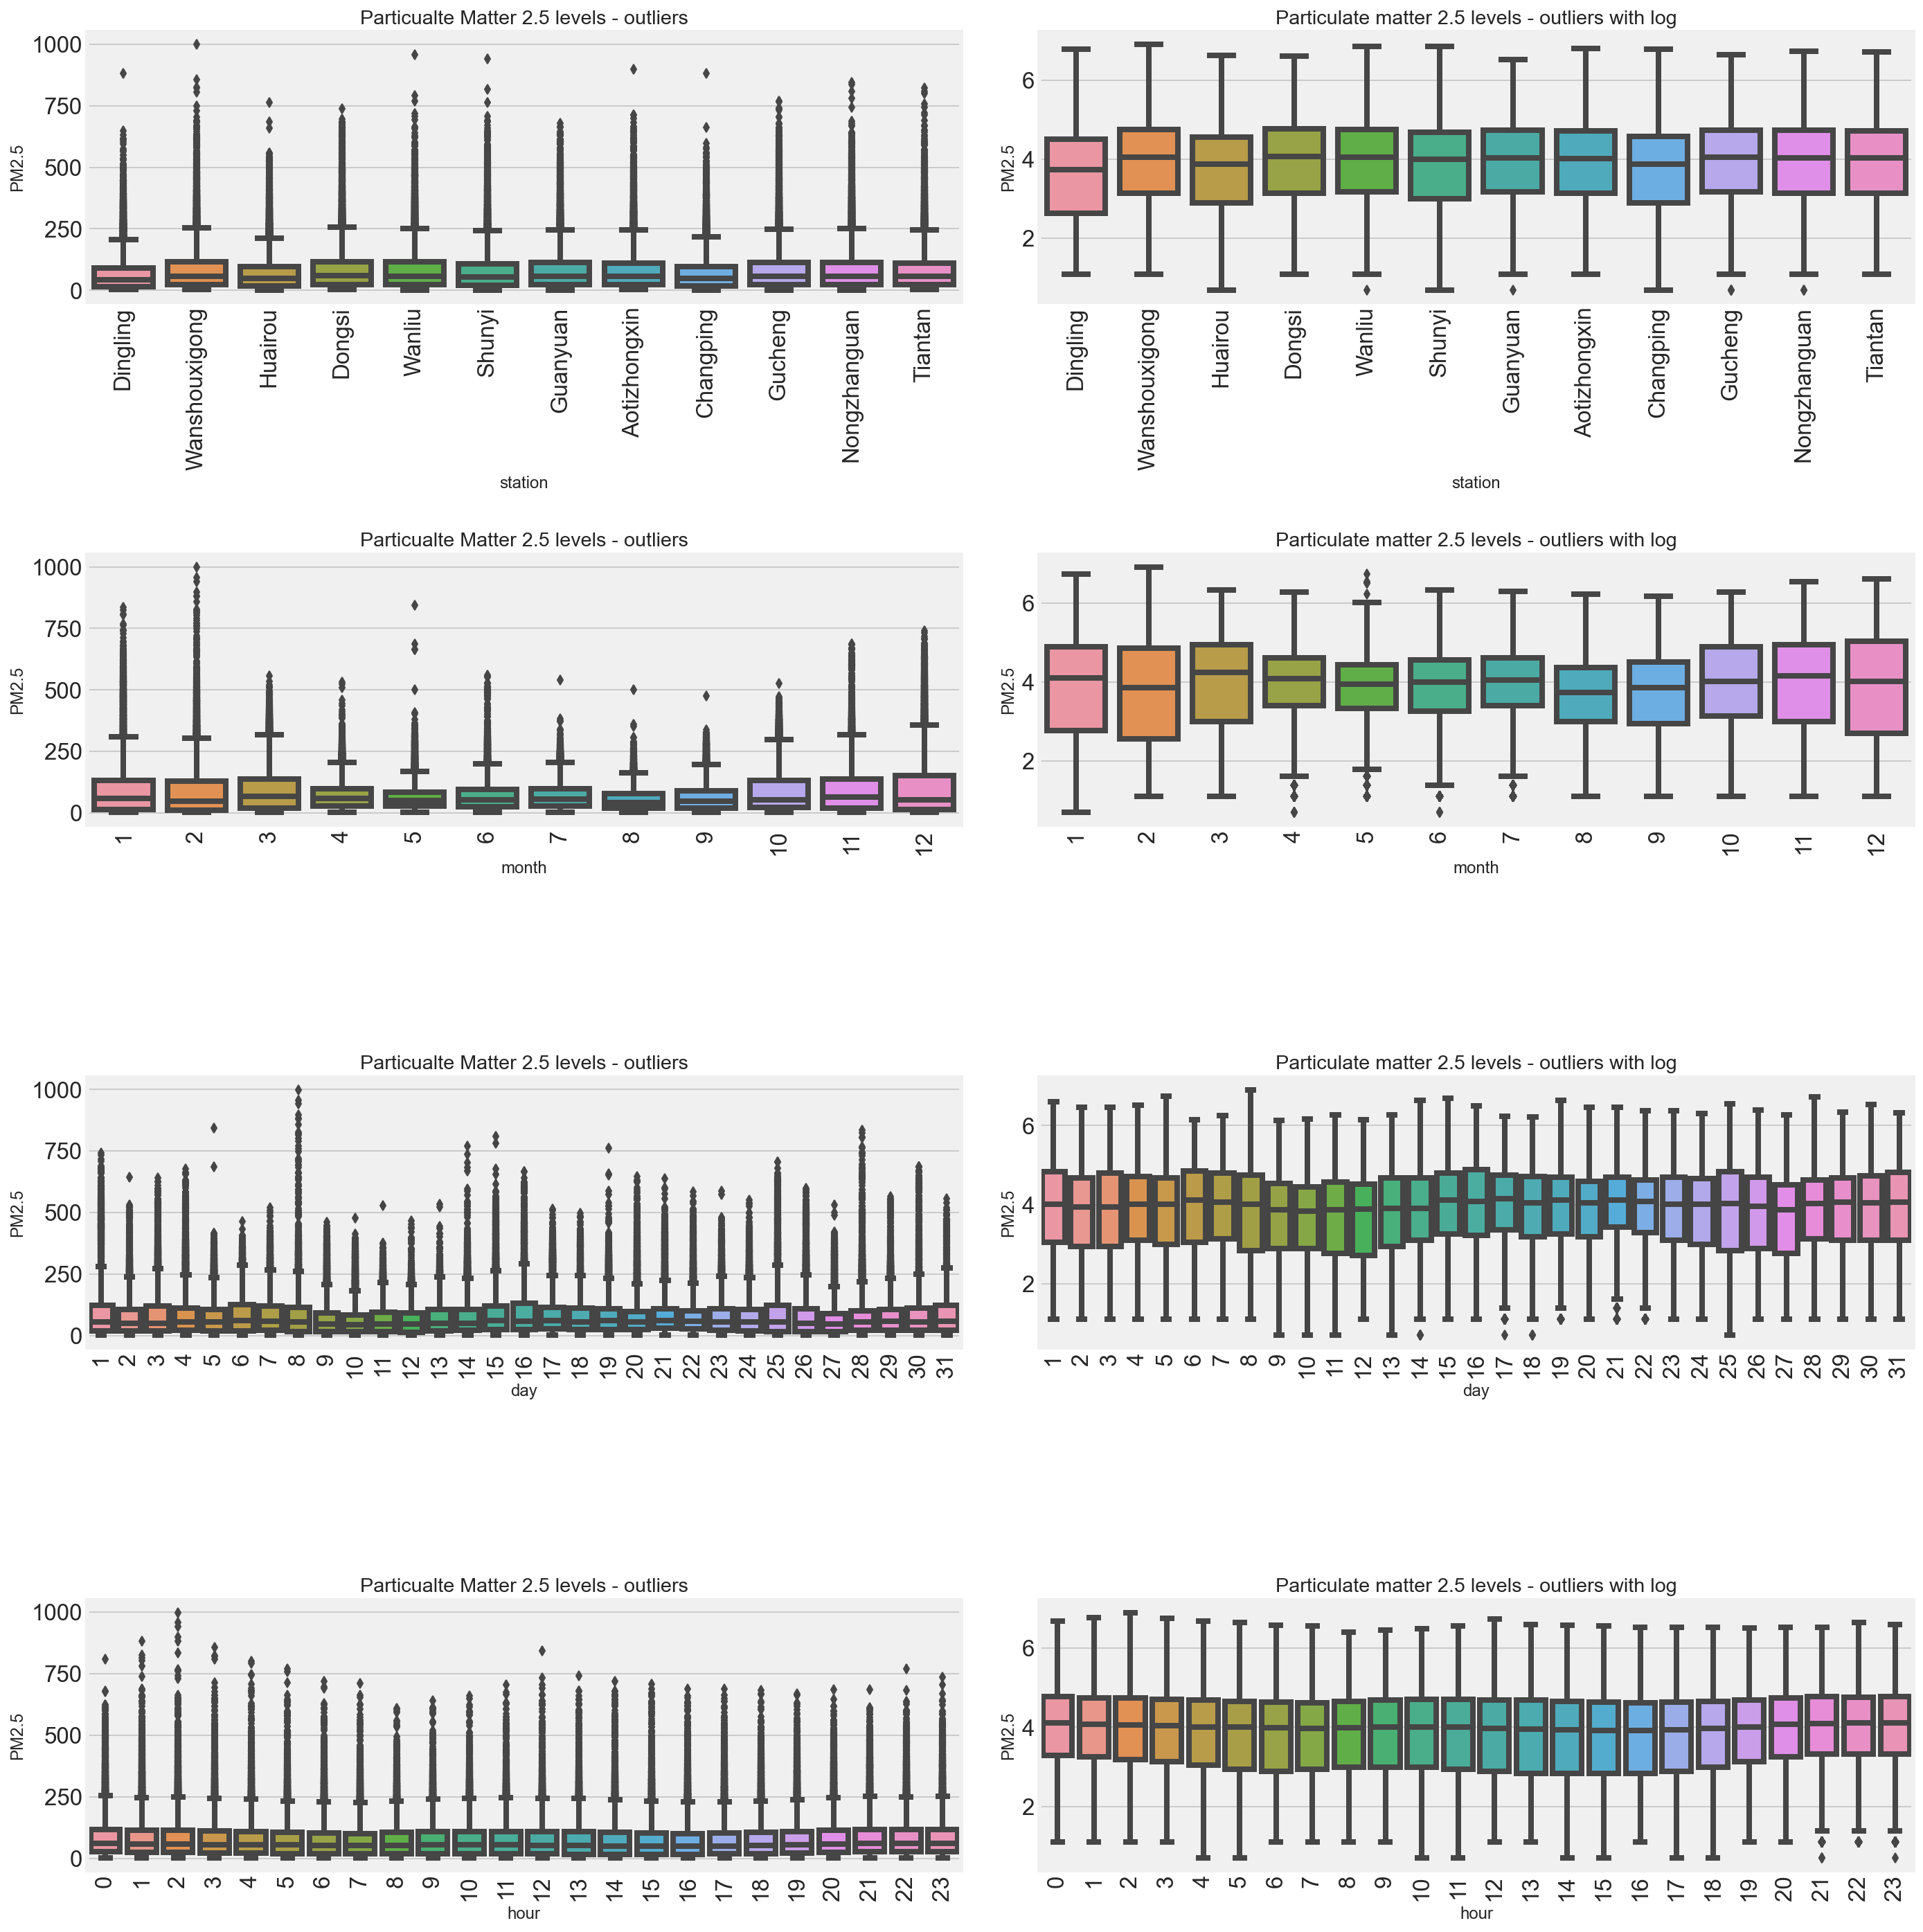

In [18]:
plt.figure(figsize=(20,20))
for number,col in enumerate(['station','month','day','hour']):
    plt.subplot(4,2,number*2+1)
    plt.title('Particualte Matter 2.5 levels - outliers')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],df['PM2.5'])
    plt.subplot(4,2,number*2+2)
    plt.title('Particulate matter 2.5 levels - outliers with log')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],np.log(df['PM2.5']))

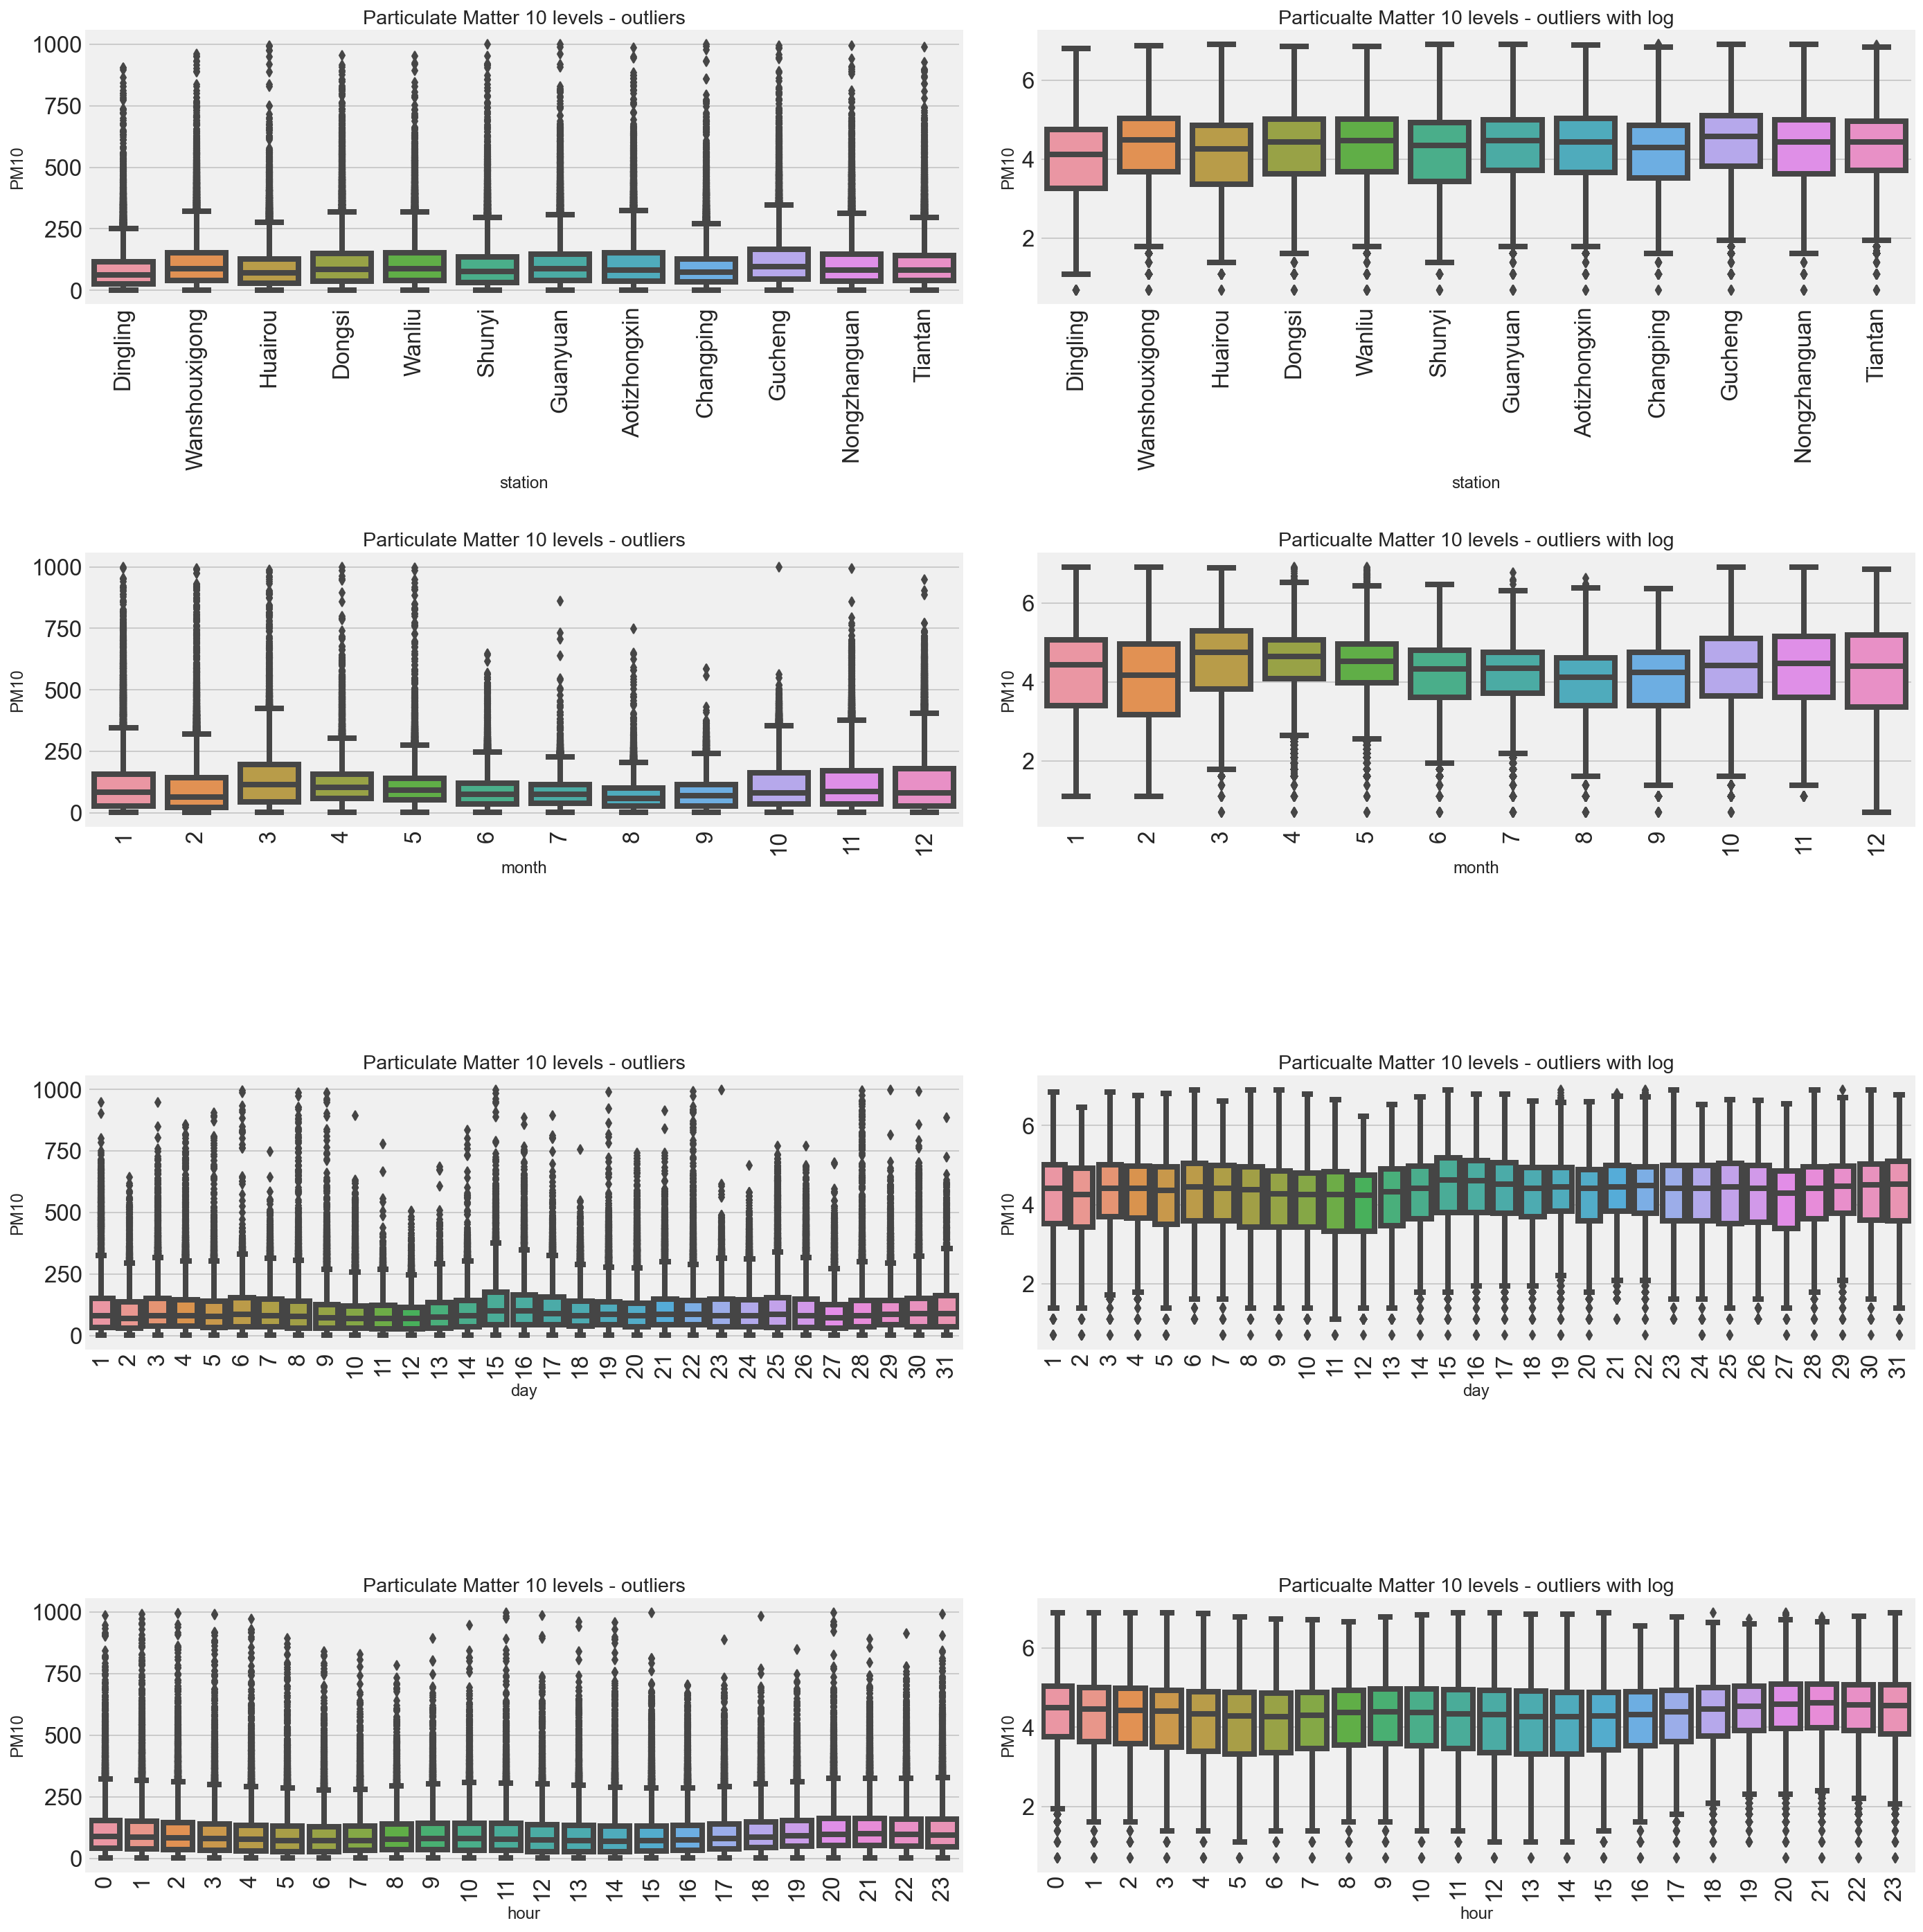

In [19]:
plt.figure(figsize=(20,20))
for number,col in enumerate(['station','month','day','hour']):
    plt.subplot(4,2,number*2+1)
    plt.title('Particulate Matter 10 levels - outliers')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],df['PM10'])
    plt.subplot(4,2,number*2+2)
    plt.title('Particualte Matter 10 levels - outliers with log')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],np.log(df['PM10']))

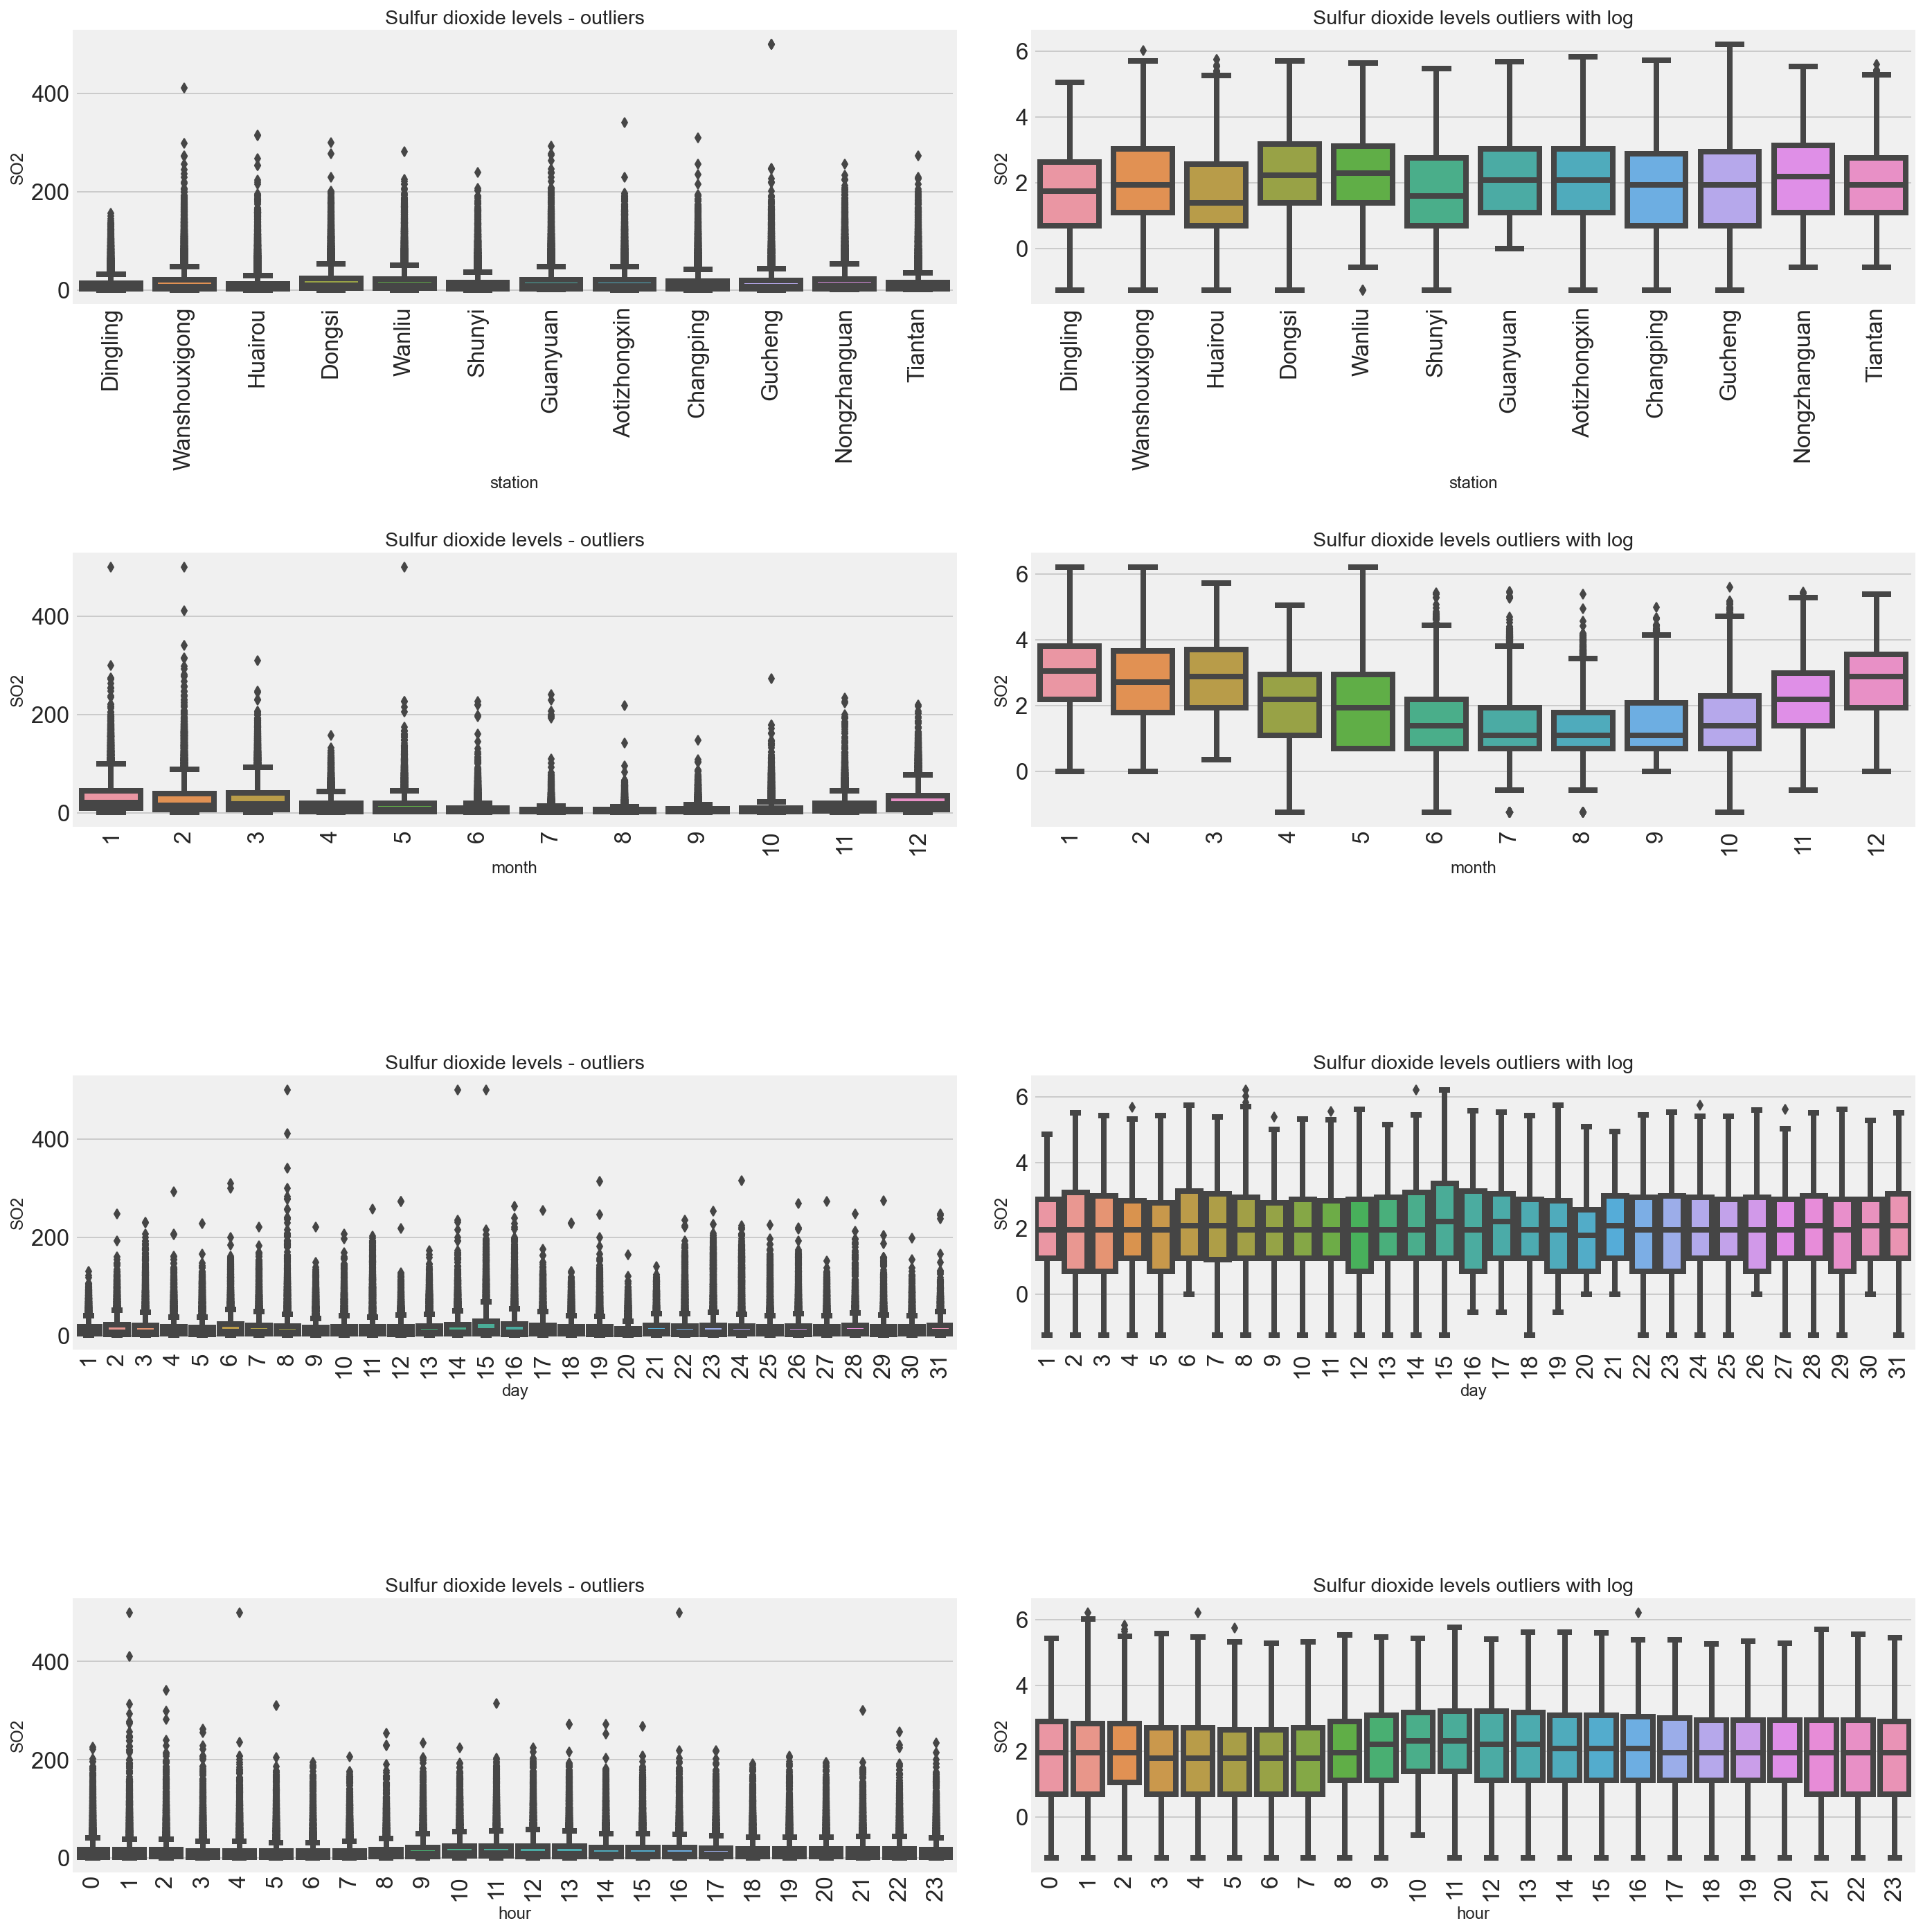

In [20]:
plt.figure(figsize=(20,20))
for number,col in enumerate(['station','month','day','hour']):
    plt.subplot(4,2,number*2+1)
    plt.title('Sulfur dioxide levels - outliers')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],df['SO2'])
    plt.subplot(4,2,number*2+2)
    plt.title('Sulfur dioxide levels outliers with log')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],np.log(df['SO2']))

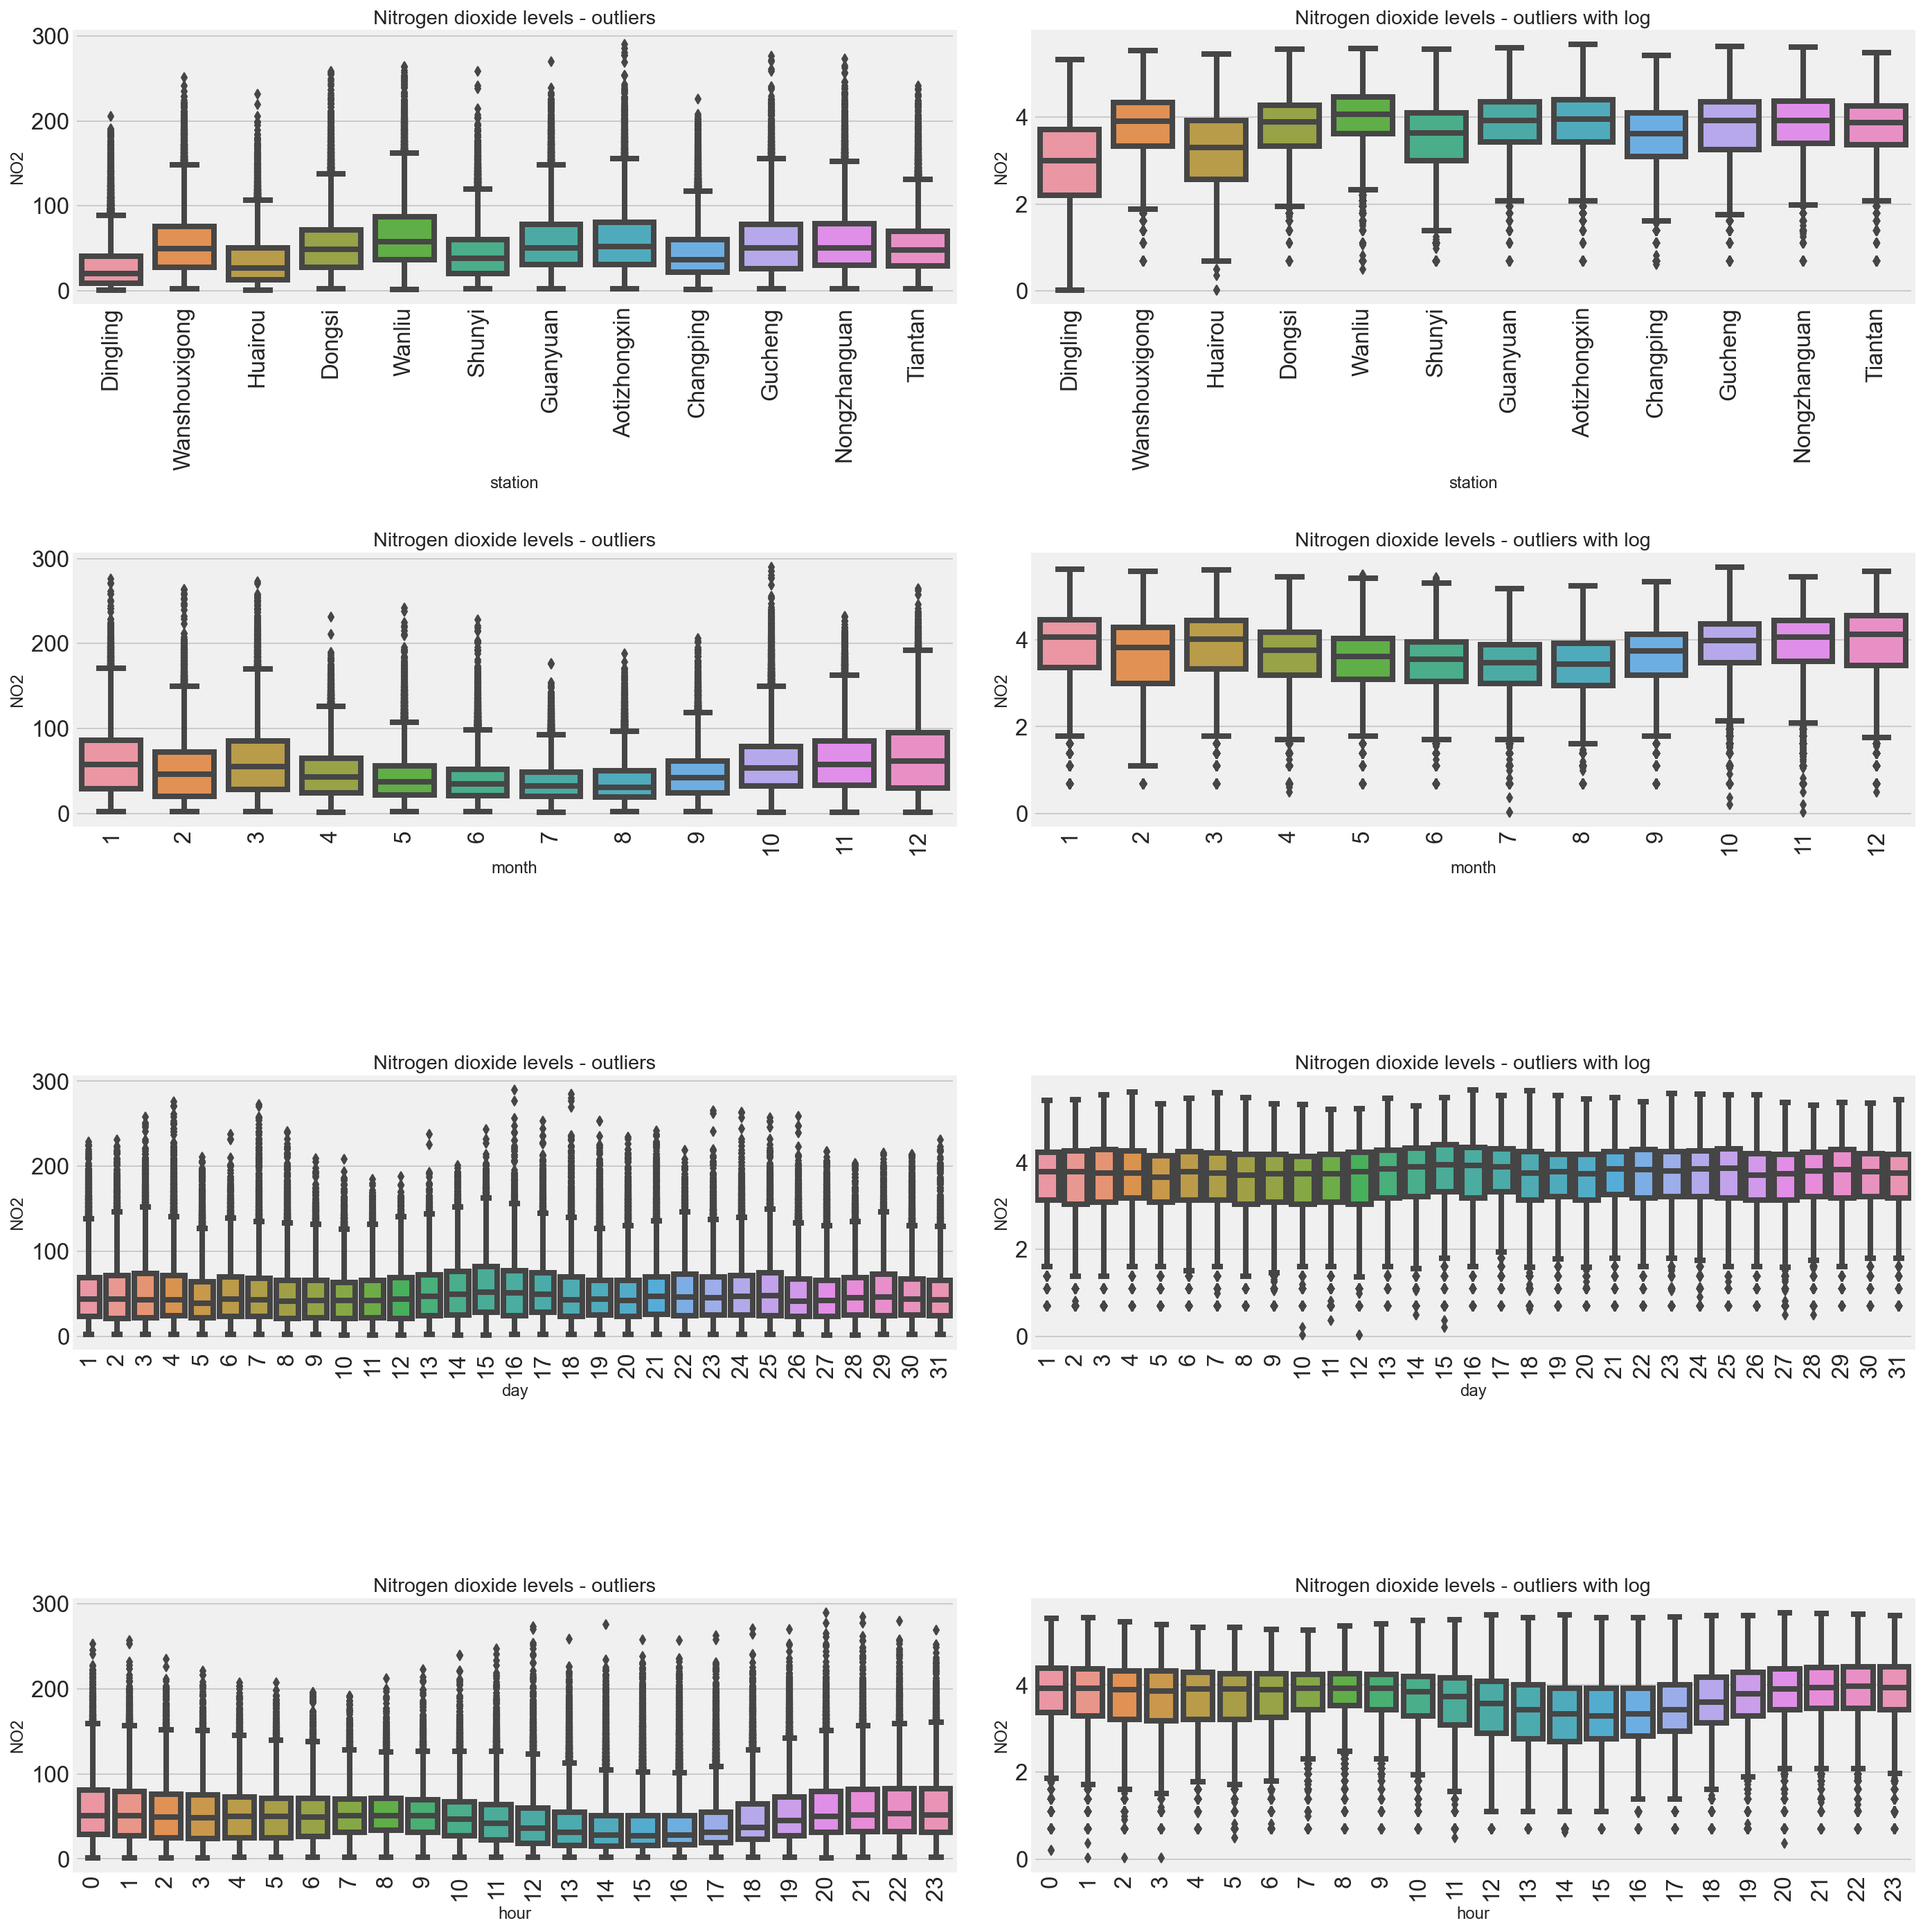

In [21]:
plt.figure(figsize=(20,20))
for number,col in enumerate(['station','month','day','hour']):
    plt.subplot(4,2,number*2+1)
    plt.title('Nitrogen dioxide levels - outliers')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],df['NO2'])
    plt.subplot(4,2,number*2+2)
    plt.title('Nitrogen dioxide levels - outliers with log')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],np.log(df['NO2']))

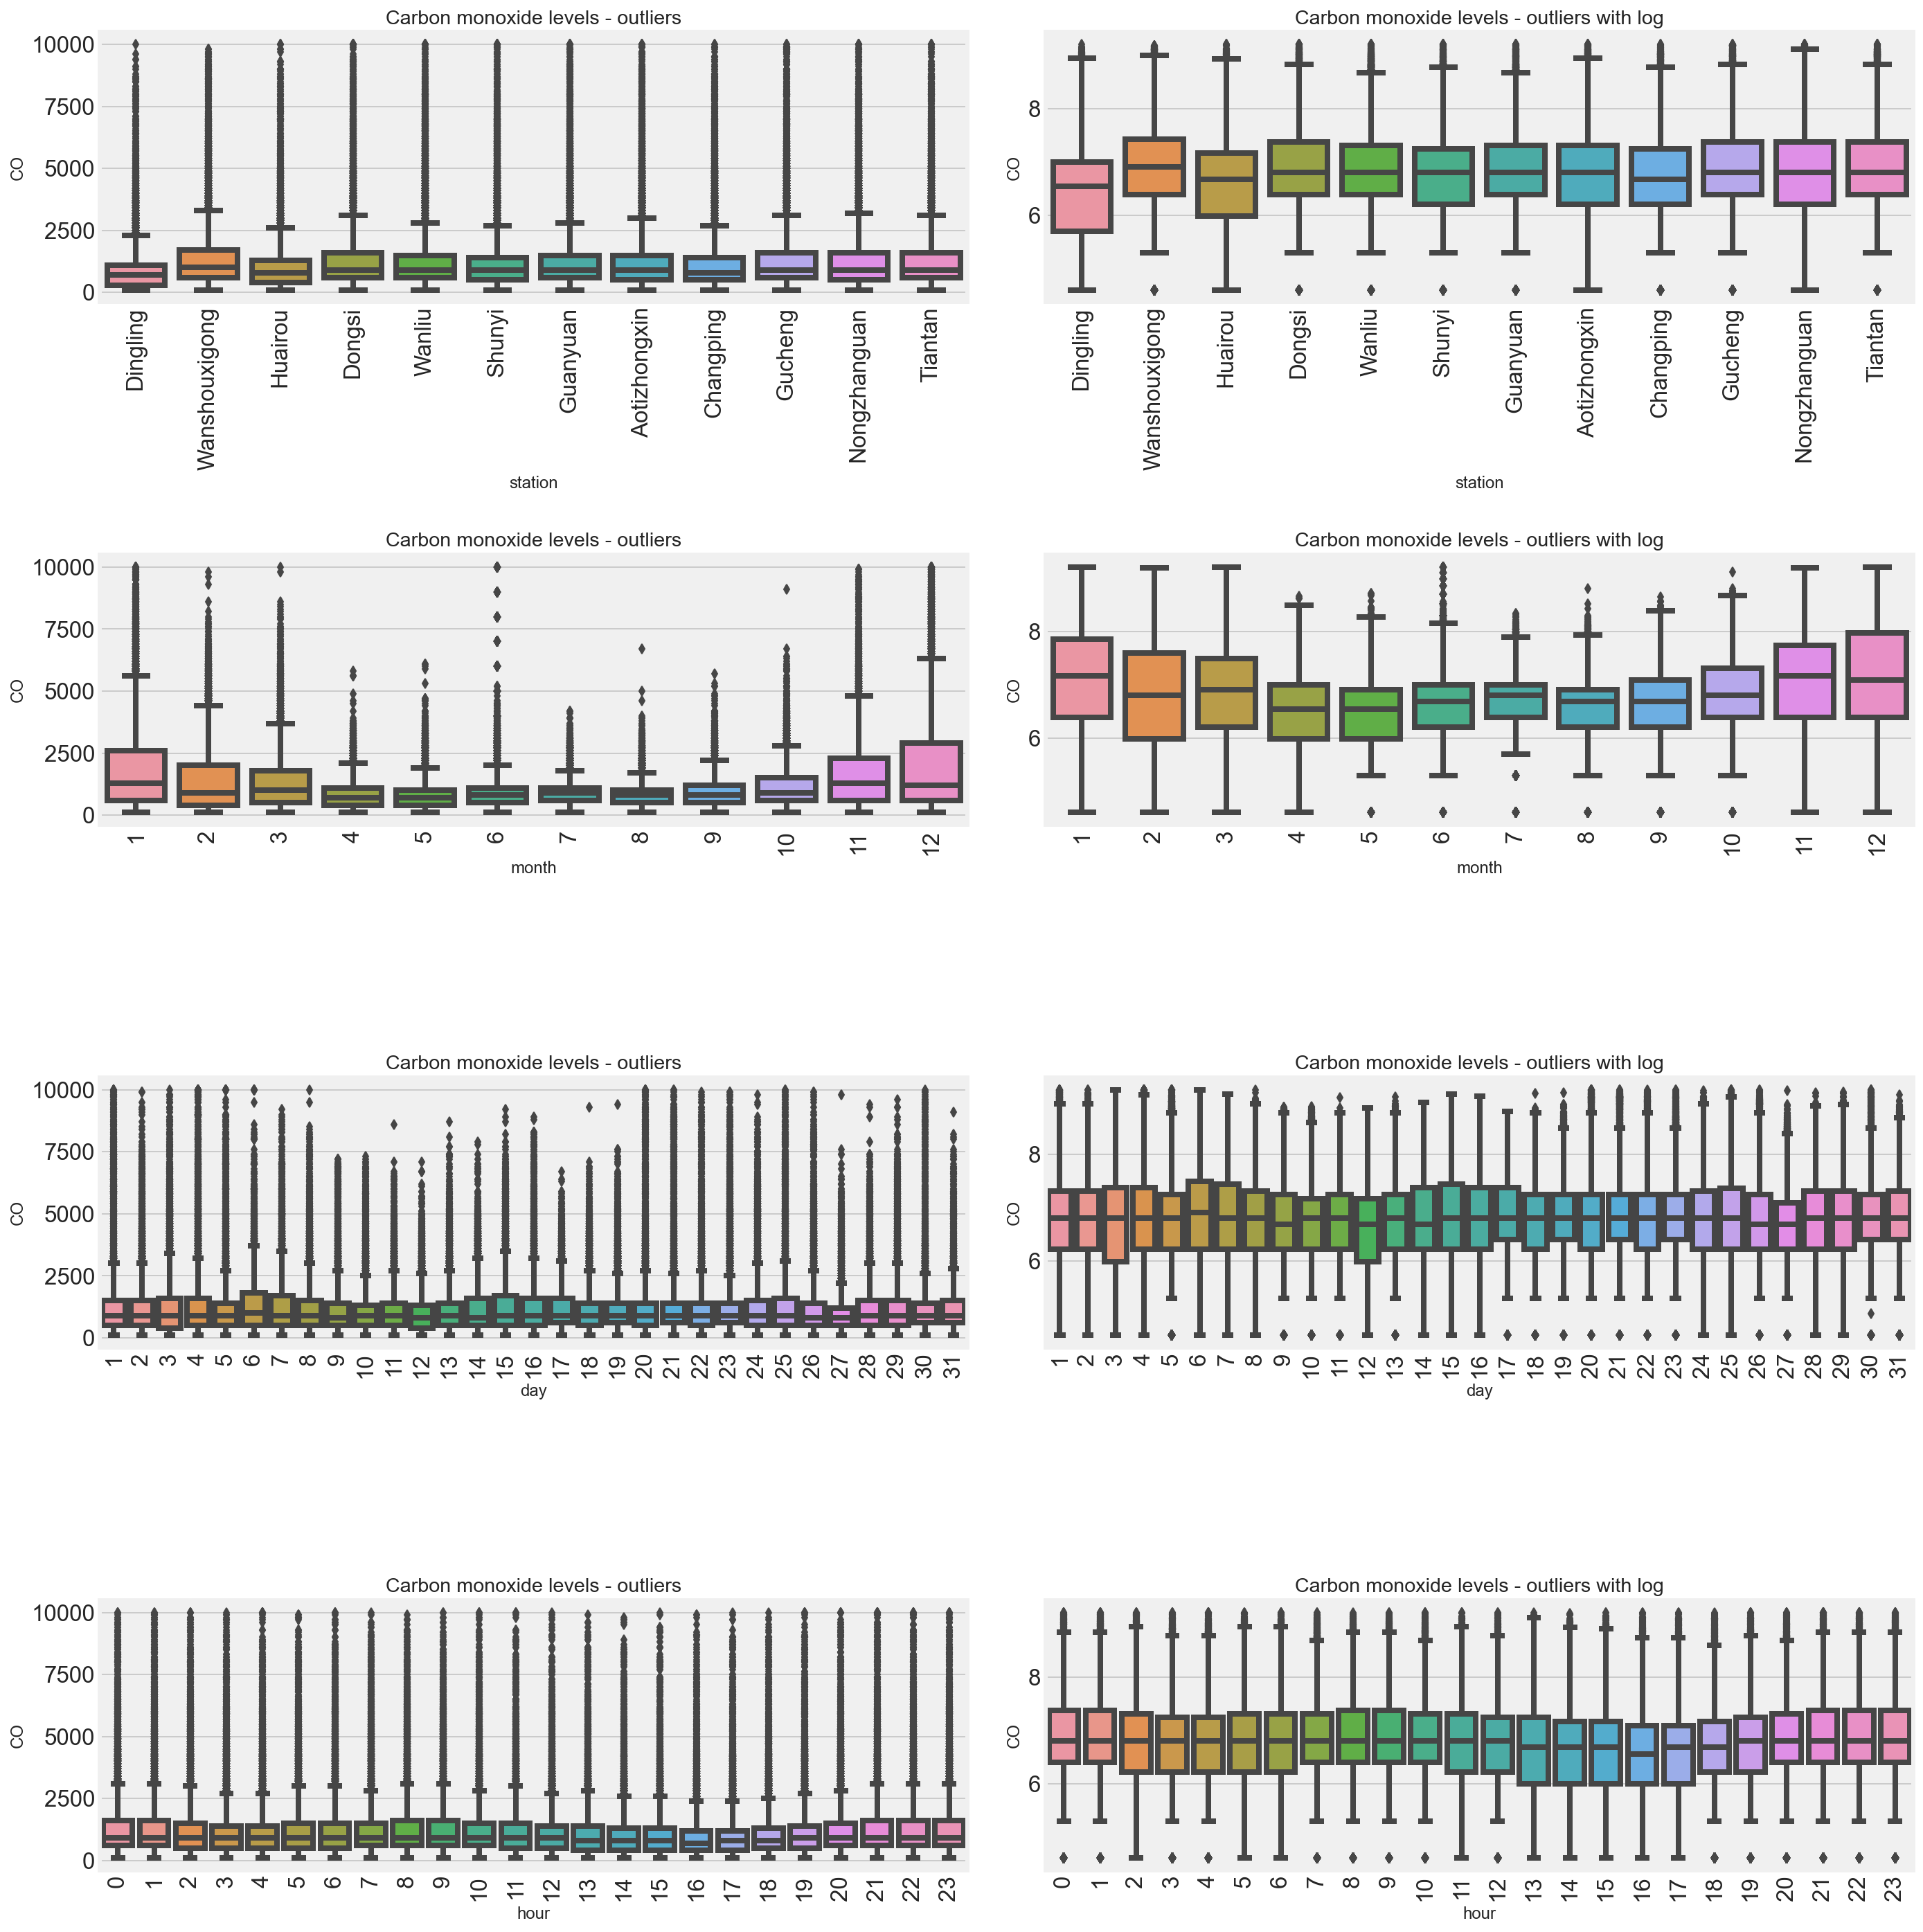

In [22]:
plt.figure(figsize=(20,20))
for number,col in enumerate(['station','month','day','hour']):
    plt.subplot(4,2,number*2+1)
    plt.title('Carbon monoxide levels - outliers')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],df['CO'])
    plt.subplot(4,2,number*2+2)
    plt.title('Carbon monoxide levels - outliers with log')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],np.log(df['CO']))

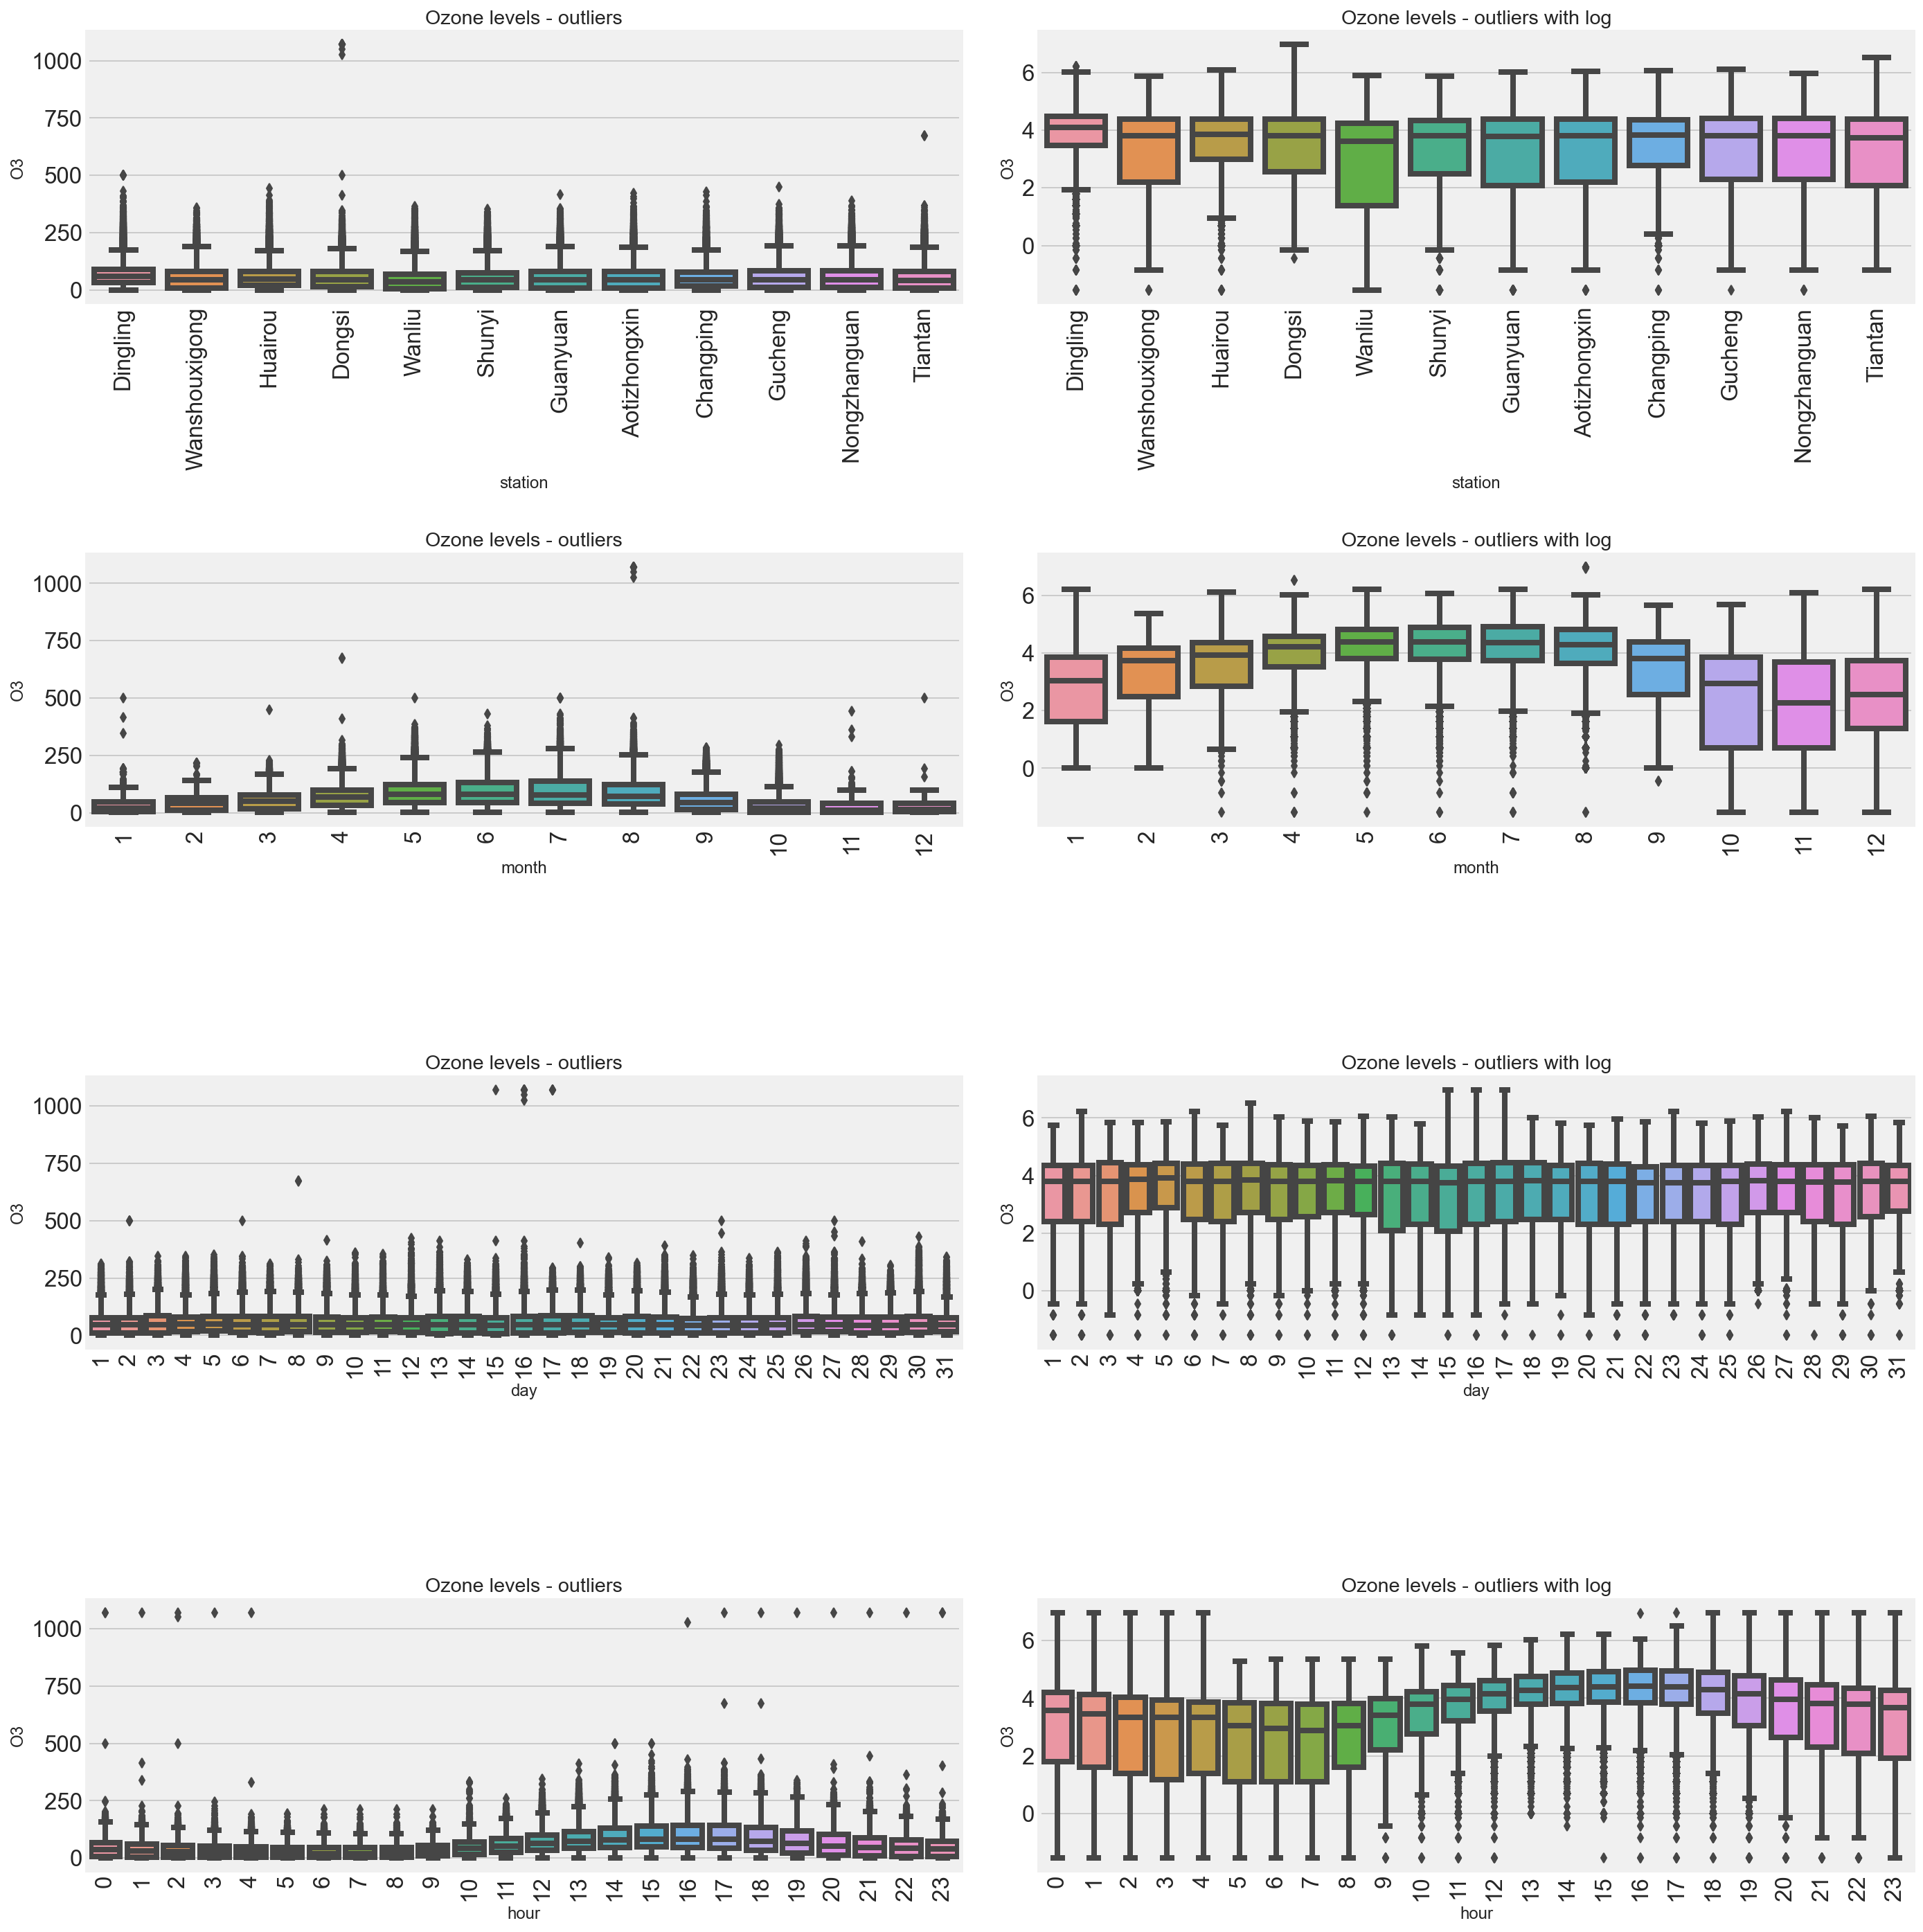

In [23]:
plt.figure(figsize=(20,20))
for number,col in enumerate(['station','month','day','hour']):
    plt.subplot(4,2,number*2+1)
    plt.title('Ozone levels - outliers')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],df['O3'])
    plt.subplot(4,2,number*2+2)
    plt.title('Ozone levels - outliers with log')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],np.log(df['O3']))

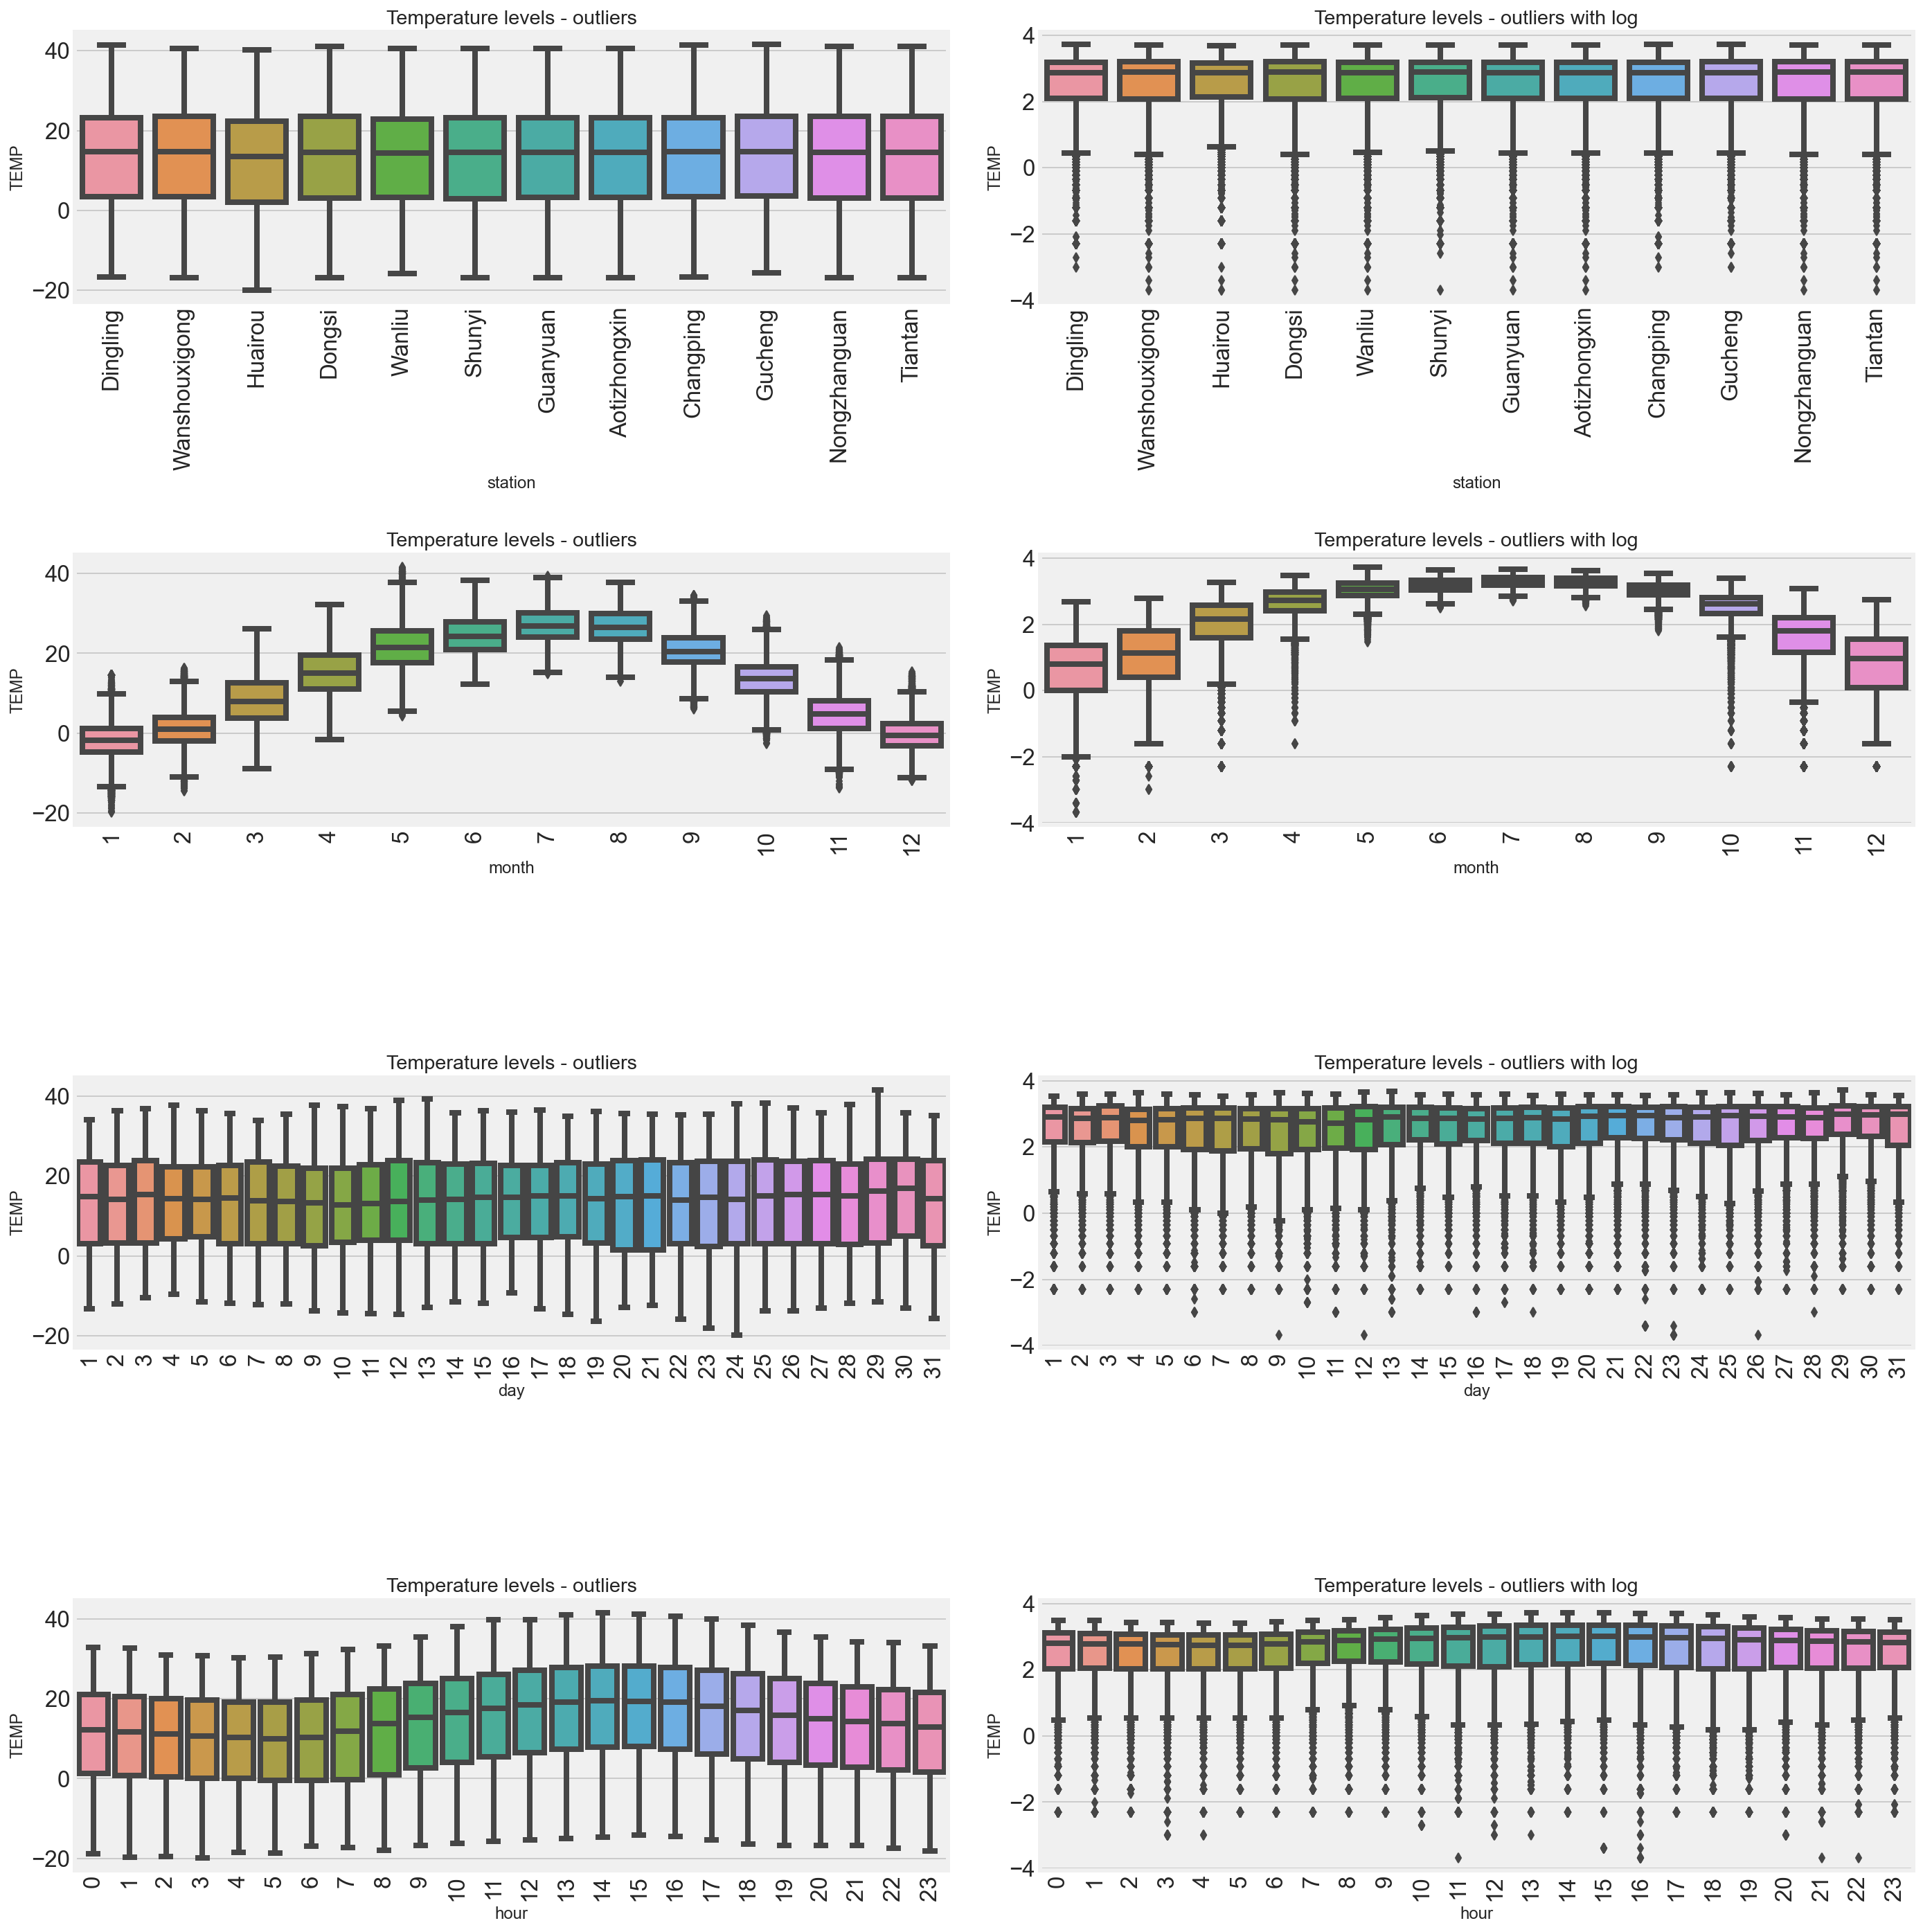

In [24]:
plt.figure(figsize=(20,20))
for number,col in enumerate(['station','month','day','hour']):
    plt.subplot(4,2,number*2+1)
    plt.title('Temperature levels - outliers')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],df['TEMP'])
    plt.subplot(4,2,number*2+2)
    plt.title('Temperature levels - outliers with log')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],np.log(df['TEMP']))

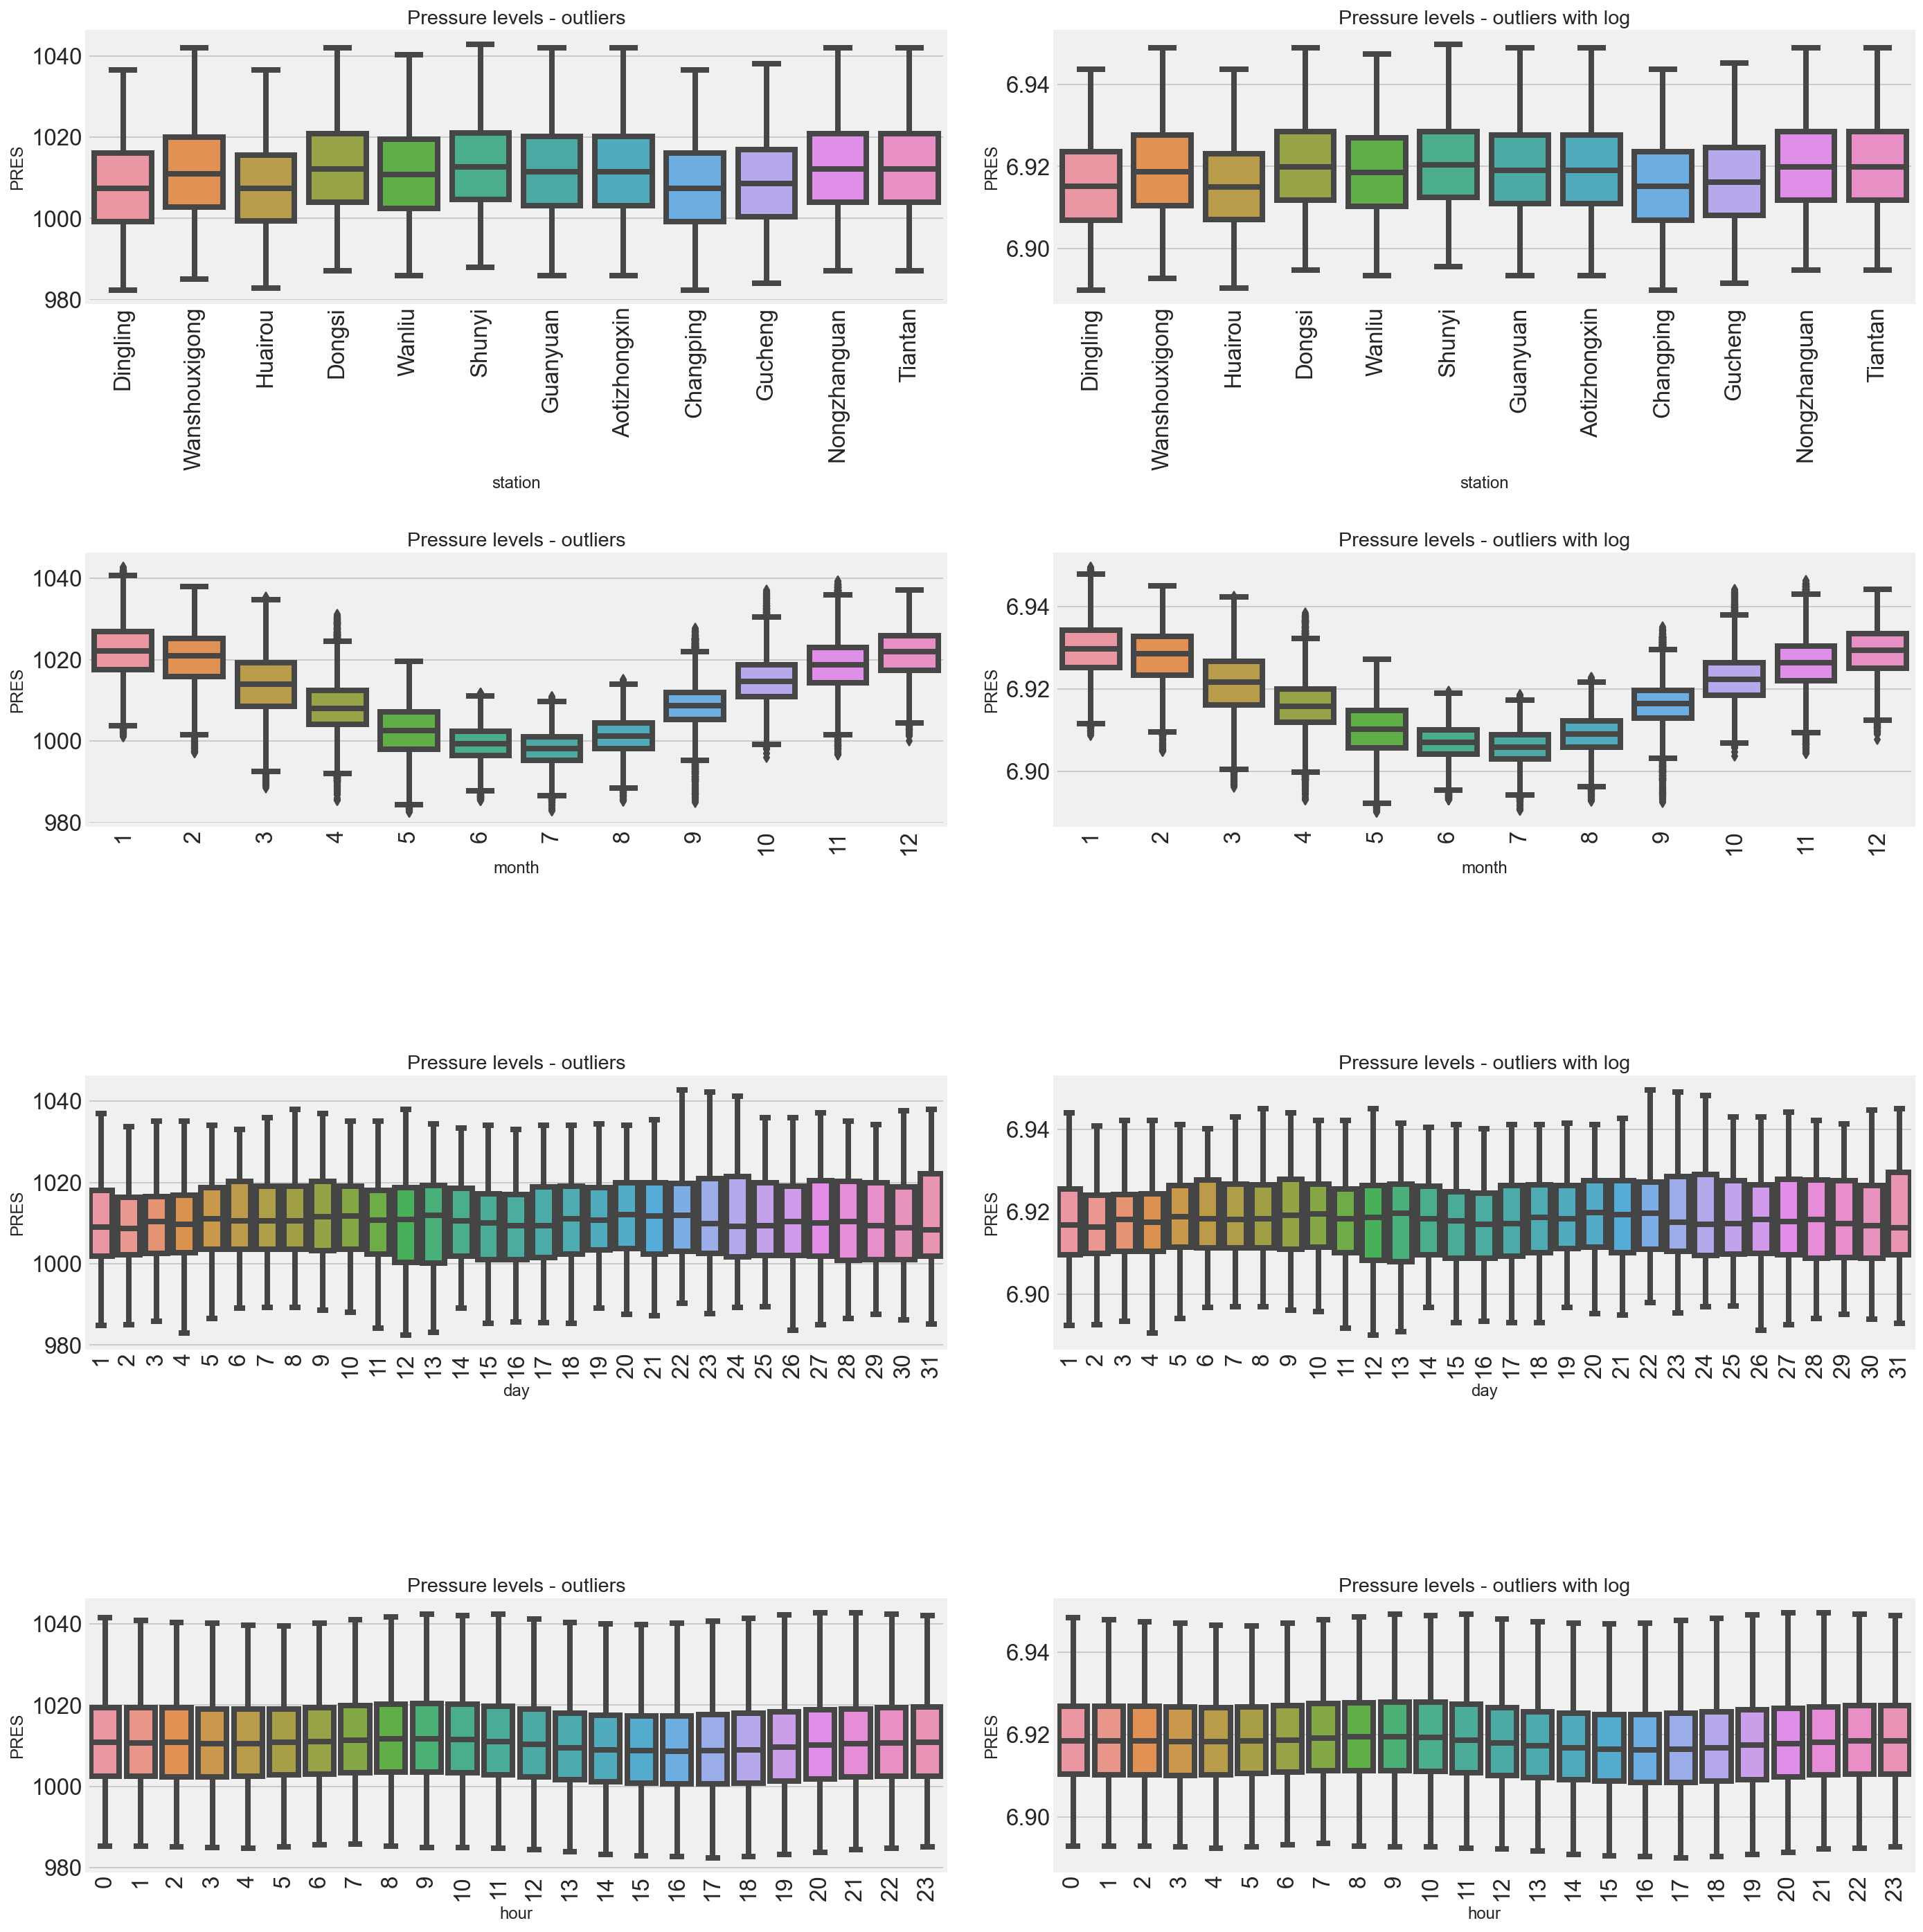

In [25]:
plt.figure(figsize=(20,20))
for number,col in enumerate(['station','month','day','hour']):
    plt.subplot(4,2,number*2+1)
    plt.title('Pressure levels - outliers')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],df['PRES'])
    plt.subplot(4,2,number*2+2)
    plt.title('Pressure levels - outliers with log')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],np.log(df['PRES']))

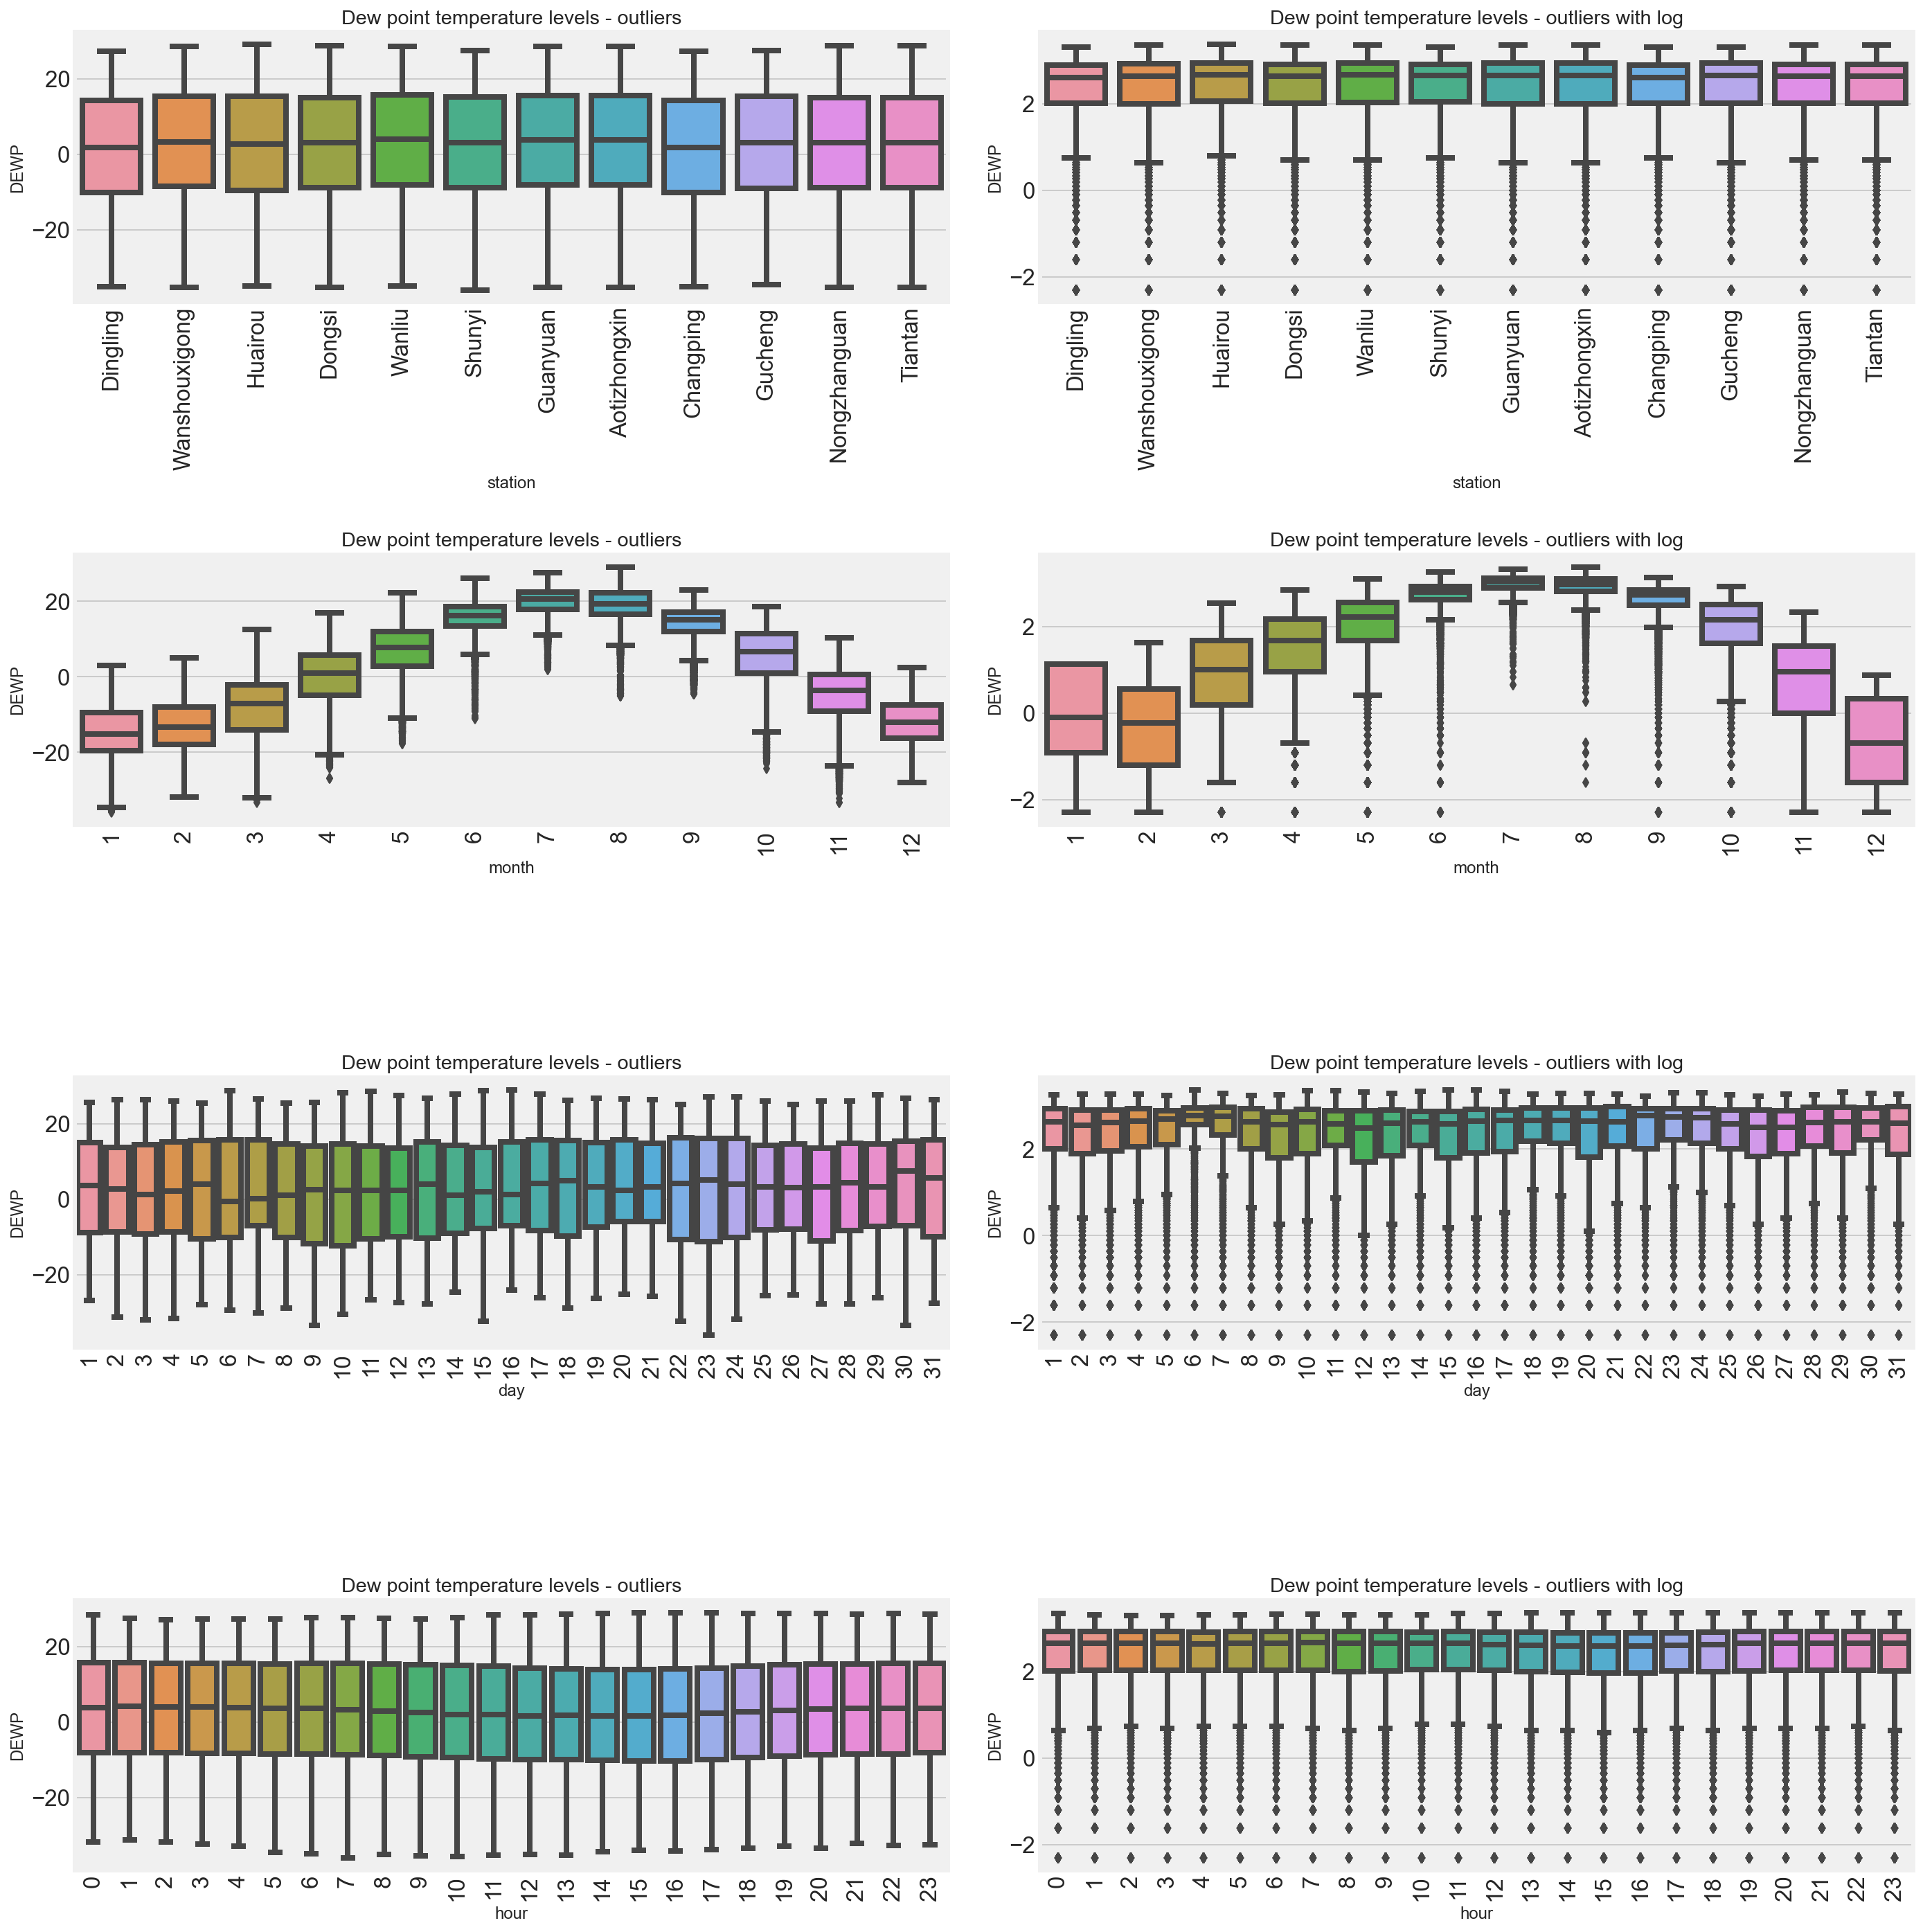

In [26]:
plt.figure(figsize=(20,20))
for number,col in enumerate(['station','month','day','hour']):
    plt.subplot(4,2,number*2+1)
    plt.title('Dew point temperature levels - outliers')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],df['DEWP'])
    plt.subplot(4,2,number*2+2)
    plt.title('Dew point temperature levels - outliers with log')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],np.log(df['DEWP']))

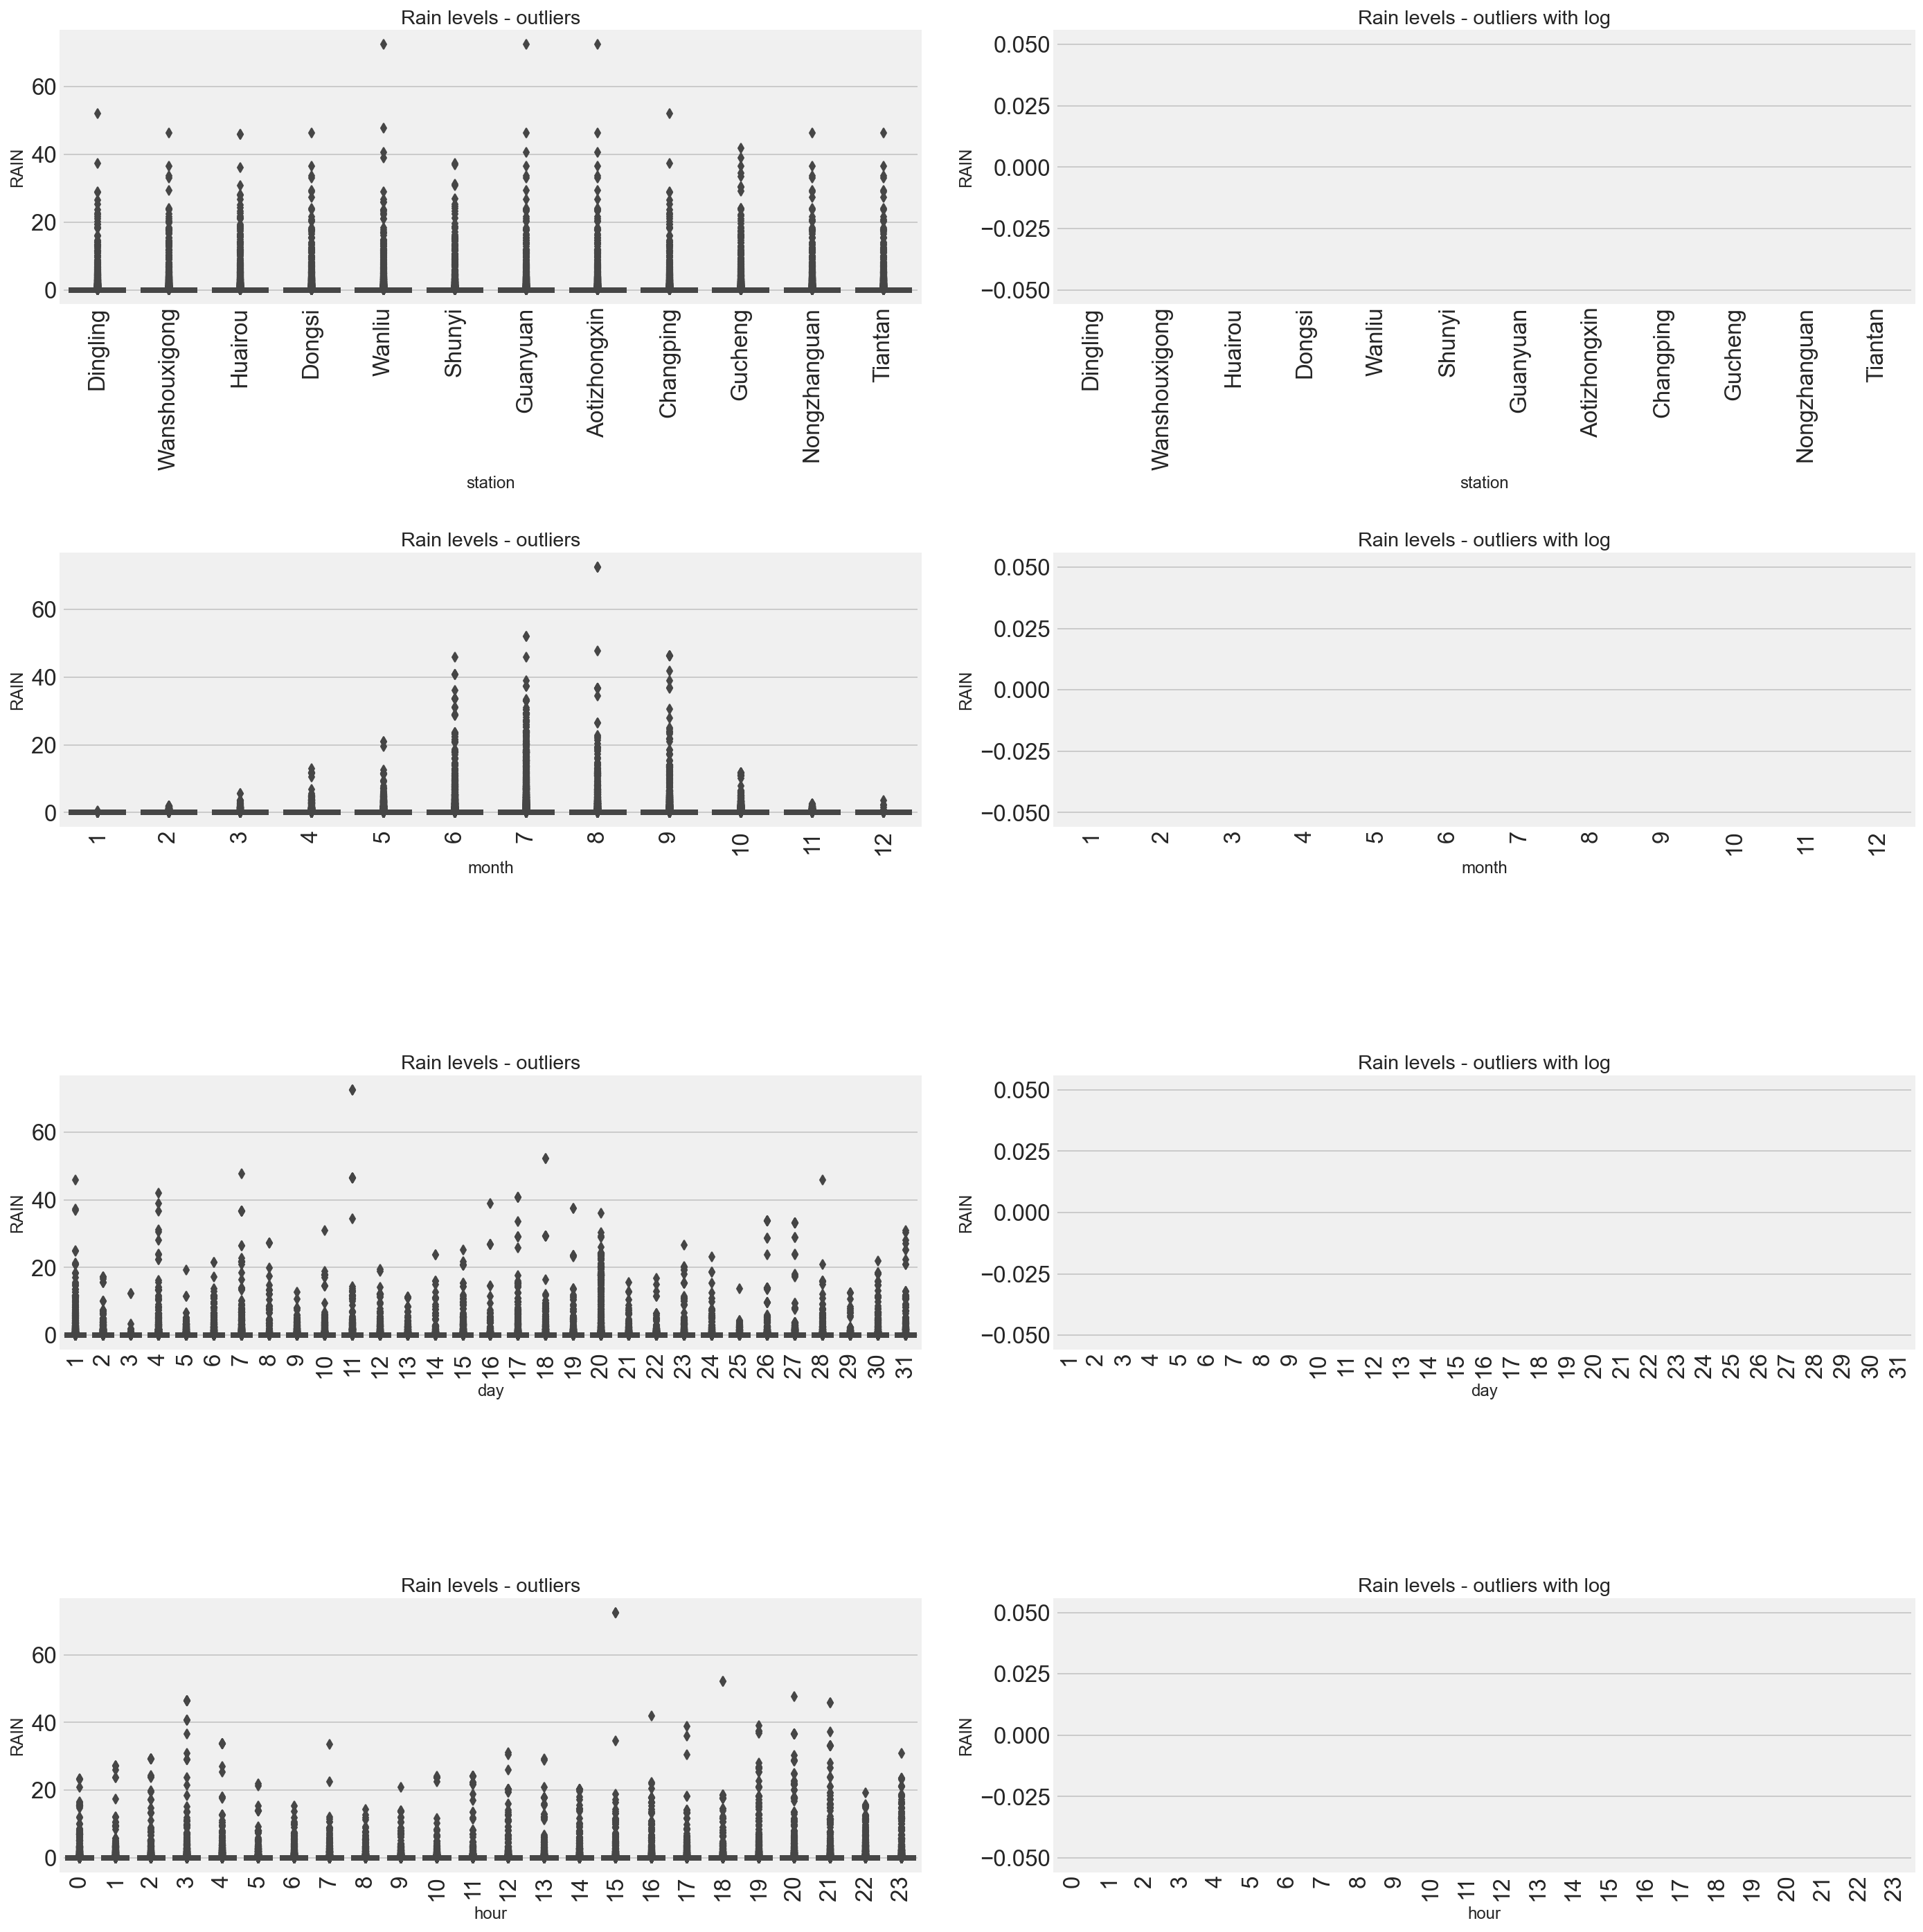

In [27]:
plt.figure(figsize=(20,20))
for number,col in enumerate(['station','month','day','hour']):
    plt.subplot(4,2,number*2+1)
    plt.title('Rain levels - outliers')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],df['RAIN'])
    plt.subplot(4,2,number*2+2)
    plt.title('Rain levels - outliers with log')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],np.log(df['RAIN']))

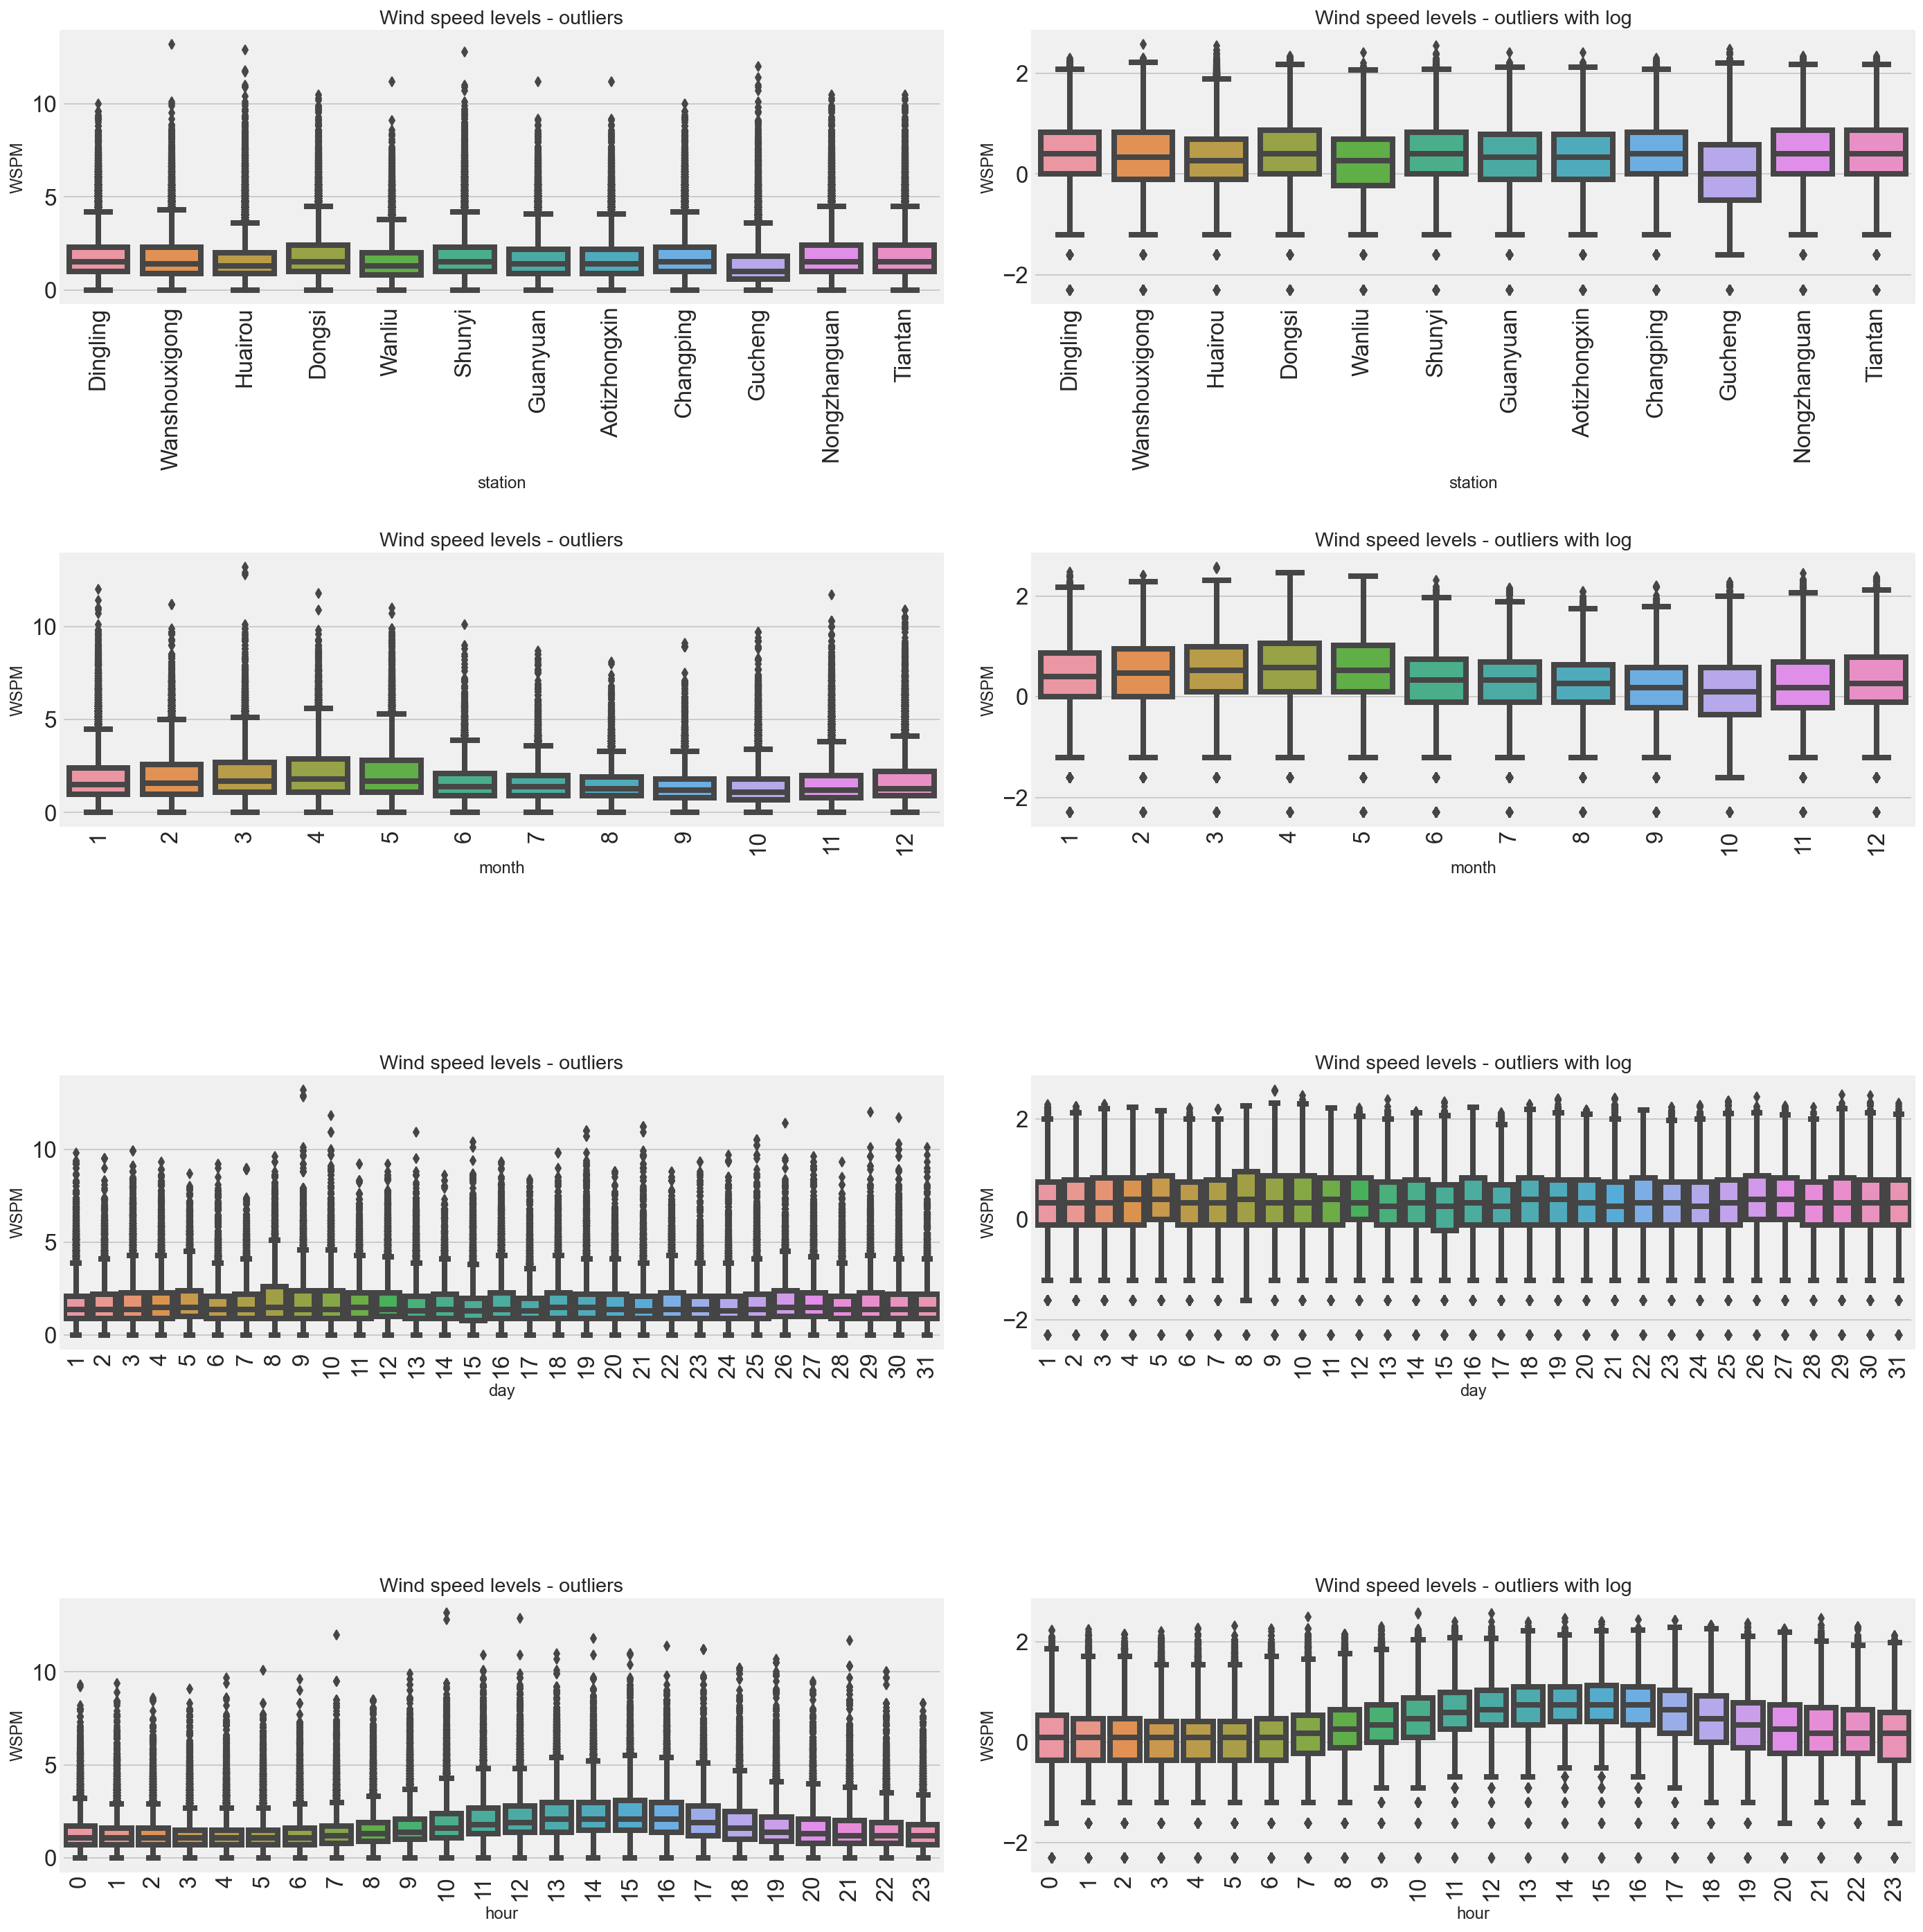

In [28]:
plt.figure(figsize=(20,20))
for number,col in enumerate(['station','month','day','hour']):
    plt.subplot(4,2,number*2+1)
    plt.title('Wind speed levels - outliers')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],df['WSPM'])
    plt.subplot(4,2,number*2+2)
    plt.title('Wind speed levels - outliers with log')
    plt.xticks(rotation='vertical')
    plt.tight_layout(pad=3.0)
    sns.boxplot(df[col],np.log(df['WSPM']))

In [29]:
cols_to_drop = ['year', 'month', 'day', 'hour']
df = df.drop(cols_to_drop, axis = 1)

## EDA of the whole data set 

In [30]:
df_daily = df.resample('D').mean()
df_daily.head()

PM2.5        PM10        SO2         NO2           CO  \
Date                                                                     
2013-03-01    7.326389   12.739583   9.232639   25.871867   417.013889   
2013-03-02   31.475694   40.760417  31.660656   56.599572   947.527778   
2013-03-03   79.291667  111.104167  49.239583   76.288572  1770.274306   
2013-03-04   22.309028   40.888889  18.764872   43.629349   729.118056   
2013-03-05  127.868056  159.236111  69.993056  100.719212  2015.364583   

                   O3      TEMP         PRES       DEWP  RAIN      WSPM  
Date                                                                     
2013-03-01  67.996528  1.173958  1026.569792 -20.148611   0.0  2.917708  
2013-03-02  32.621946  0.260417  1026.552778 -16.271875   0.0  1.145139  
2013-03-03  22.788194  5.257292  1014.215278 -12.325347   0.0  1.463194  
2013-03-04  56.833333  9.610764  1017.263194 -12.773264   0.0  2.227083  
2013-03-05  79.527778  6.630556  1010.551389  -7.916319   0.0  0.992014

In [31]:
df_weekly = df_daily.resample('W').mean()
df_weekly.head()

PM2.5        PM10        SO2        NO2           CO  \
Date                                                                    
2013-03-03   39.364583   54.868056  30.044293  52.920004  1044.938657   
2013-03-10  127.499504  173.327381  54.273529  87.369242  1995.890873   
2013-03-17  155.800595  165.871528  54.148313  83.345155  1748.444940   
2013-03-24   61.516369   77.979167  16.282738  46.390180   881.646825   
2013-03-31  101.655258  129.342510  31.971502  59.117498  1215.246032   

                   O3      TEMP         PRES       DEWP      RAIN      WSPM  
Date                                                                         
2013-03-03  41.135556  2.230556  1022.445949 -16.248611  0.000000  1.842014  
2013-03-10  71.200893  7.921974  1008.608036  -7.972123  0.000000  1.878720  
2013-03-17  72.194444  6.276538  1013.946478  -3.122867  0.021280  1.480060  
2013-03-24  48.581252  4.453819  1009.503224  -6.526091  0.083978  2.288740  
2013-03-31  40.110355  6.928819  1012.459077  -5.007341  0.000000  1.917163

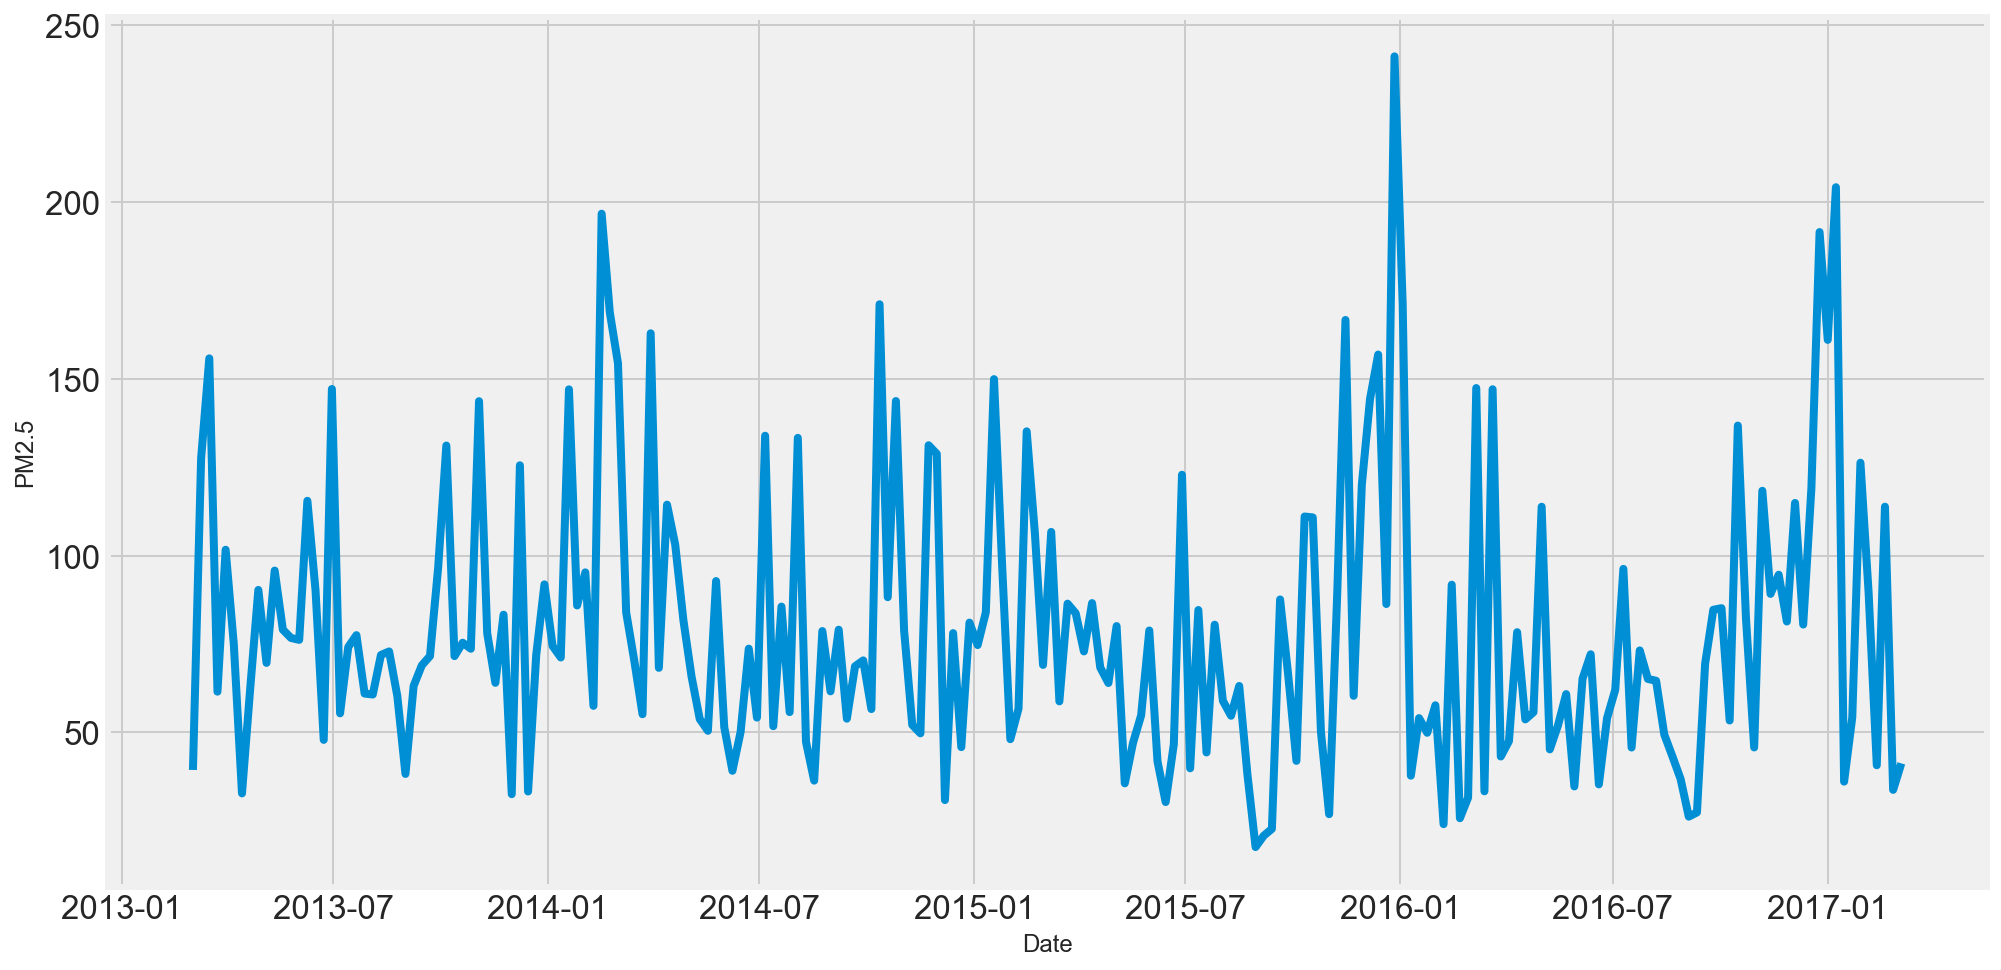

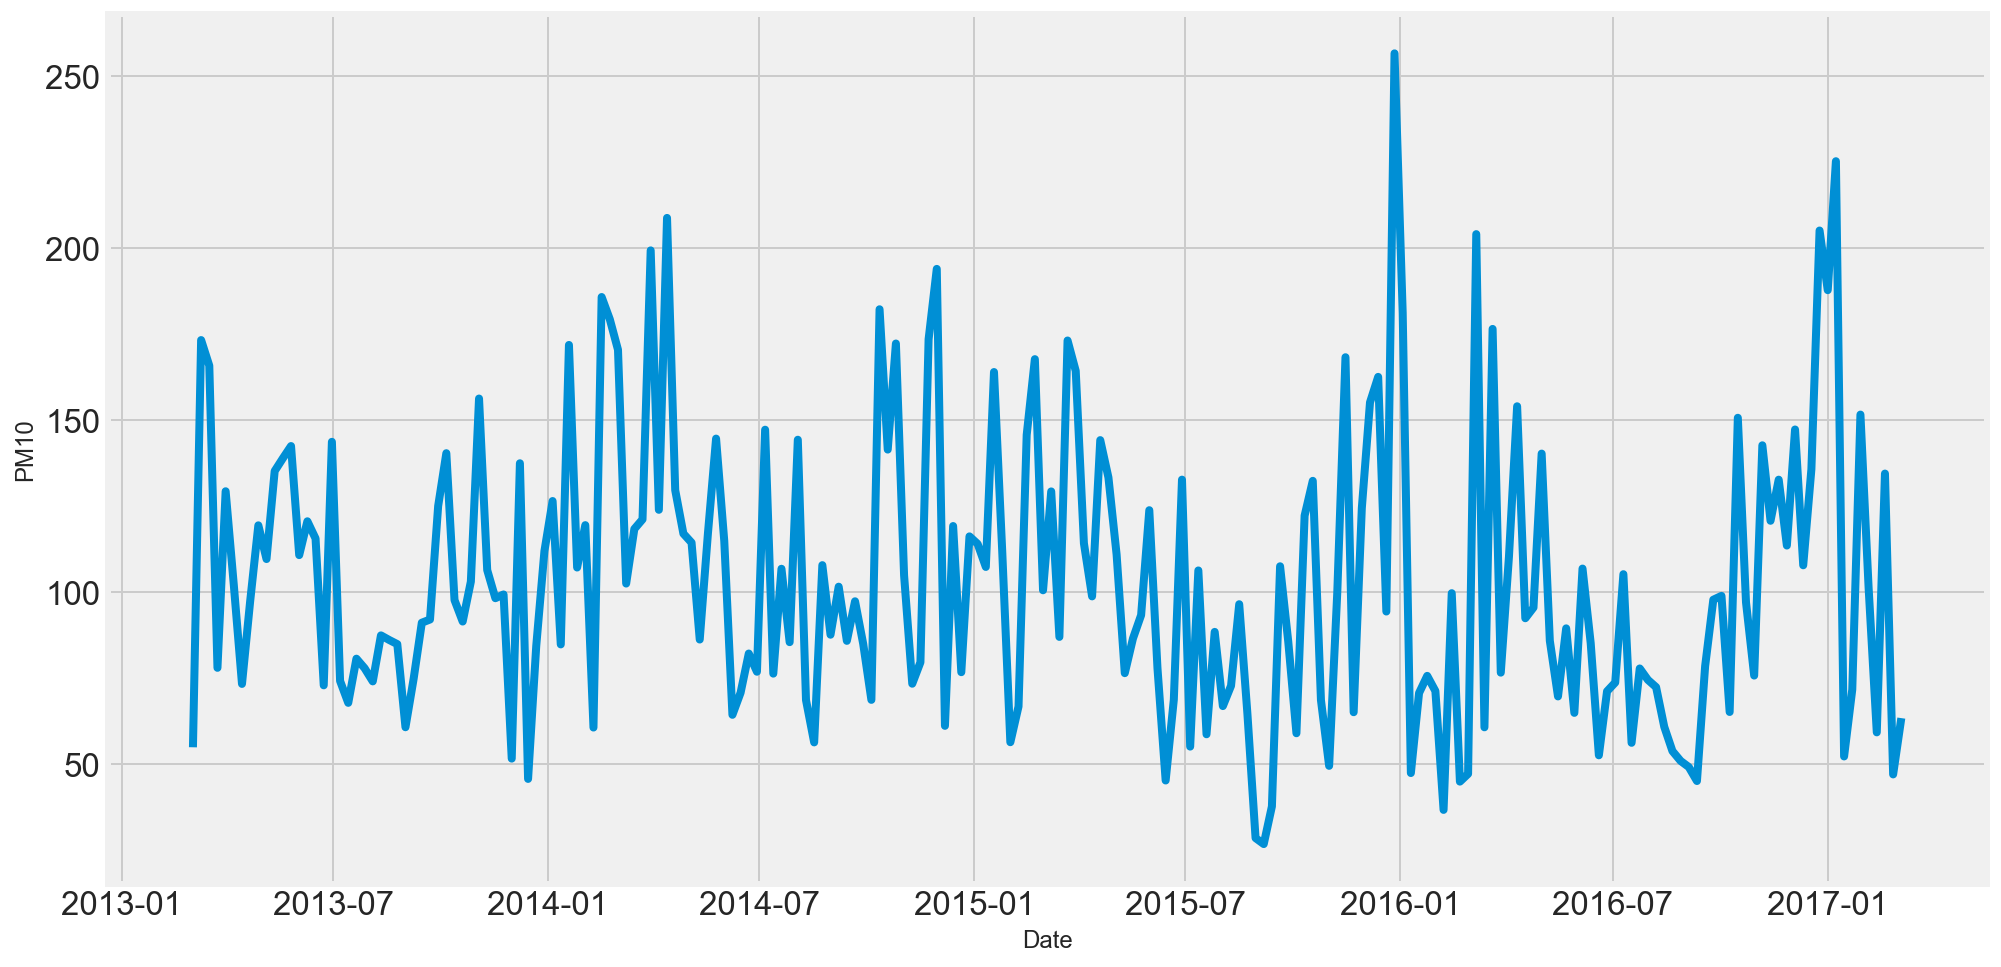

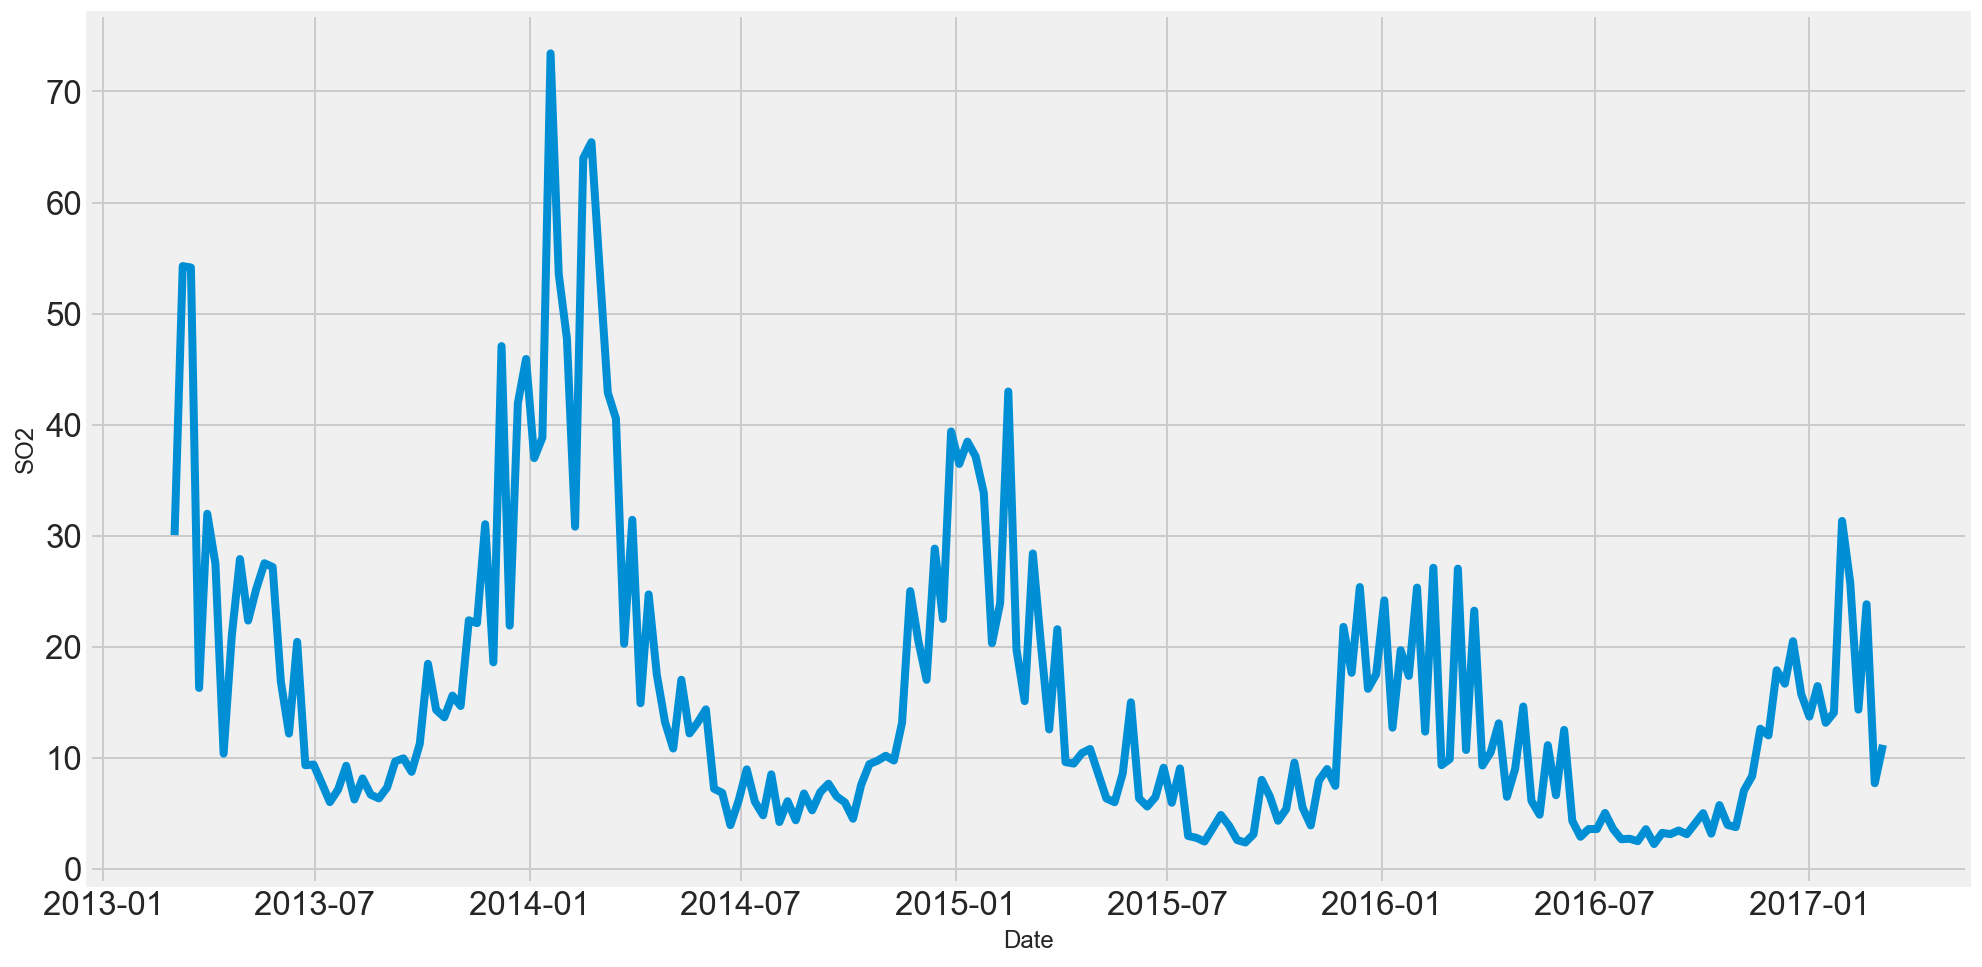

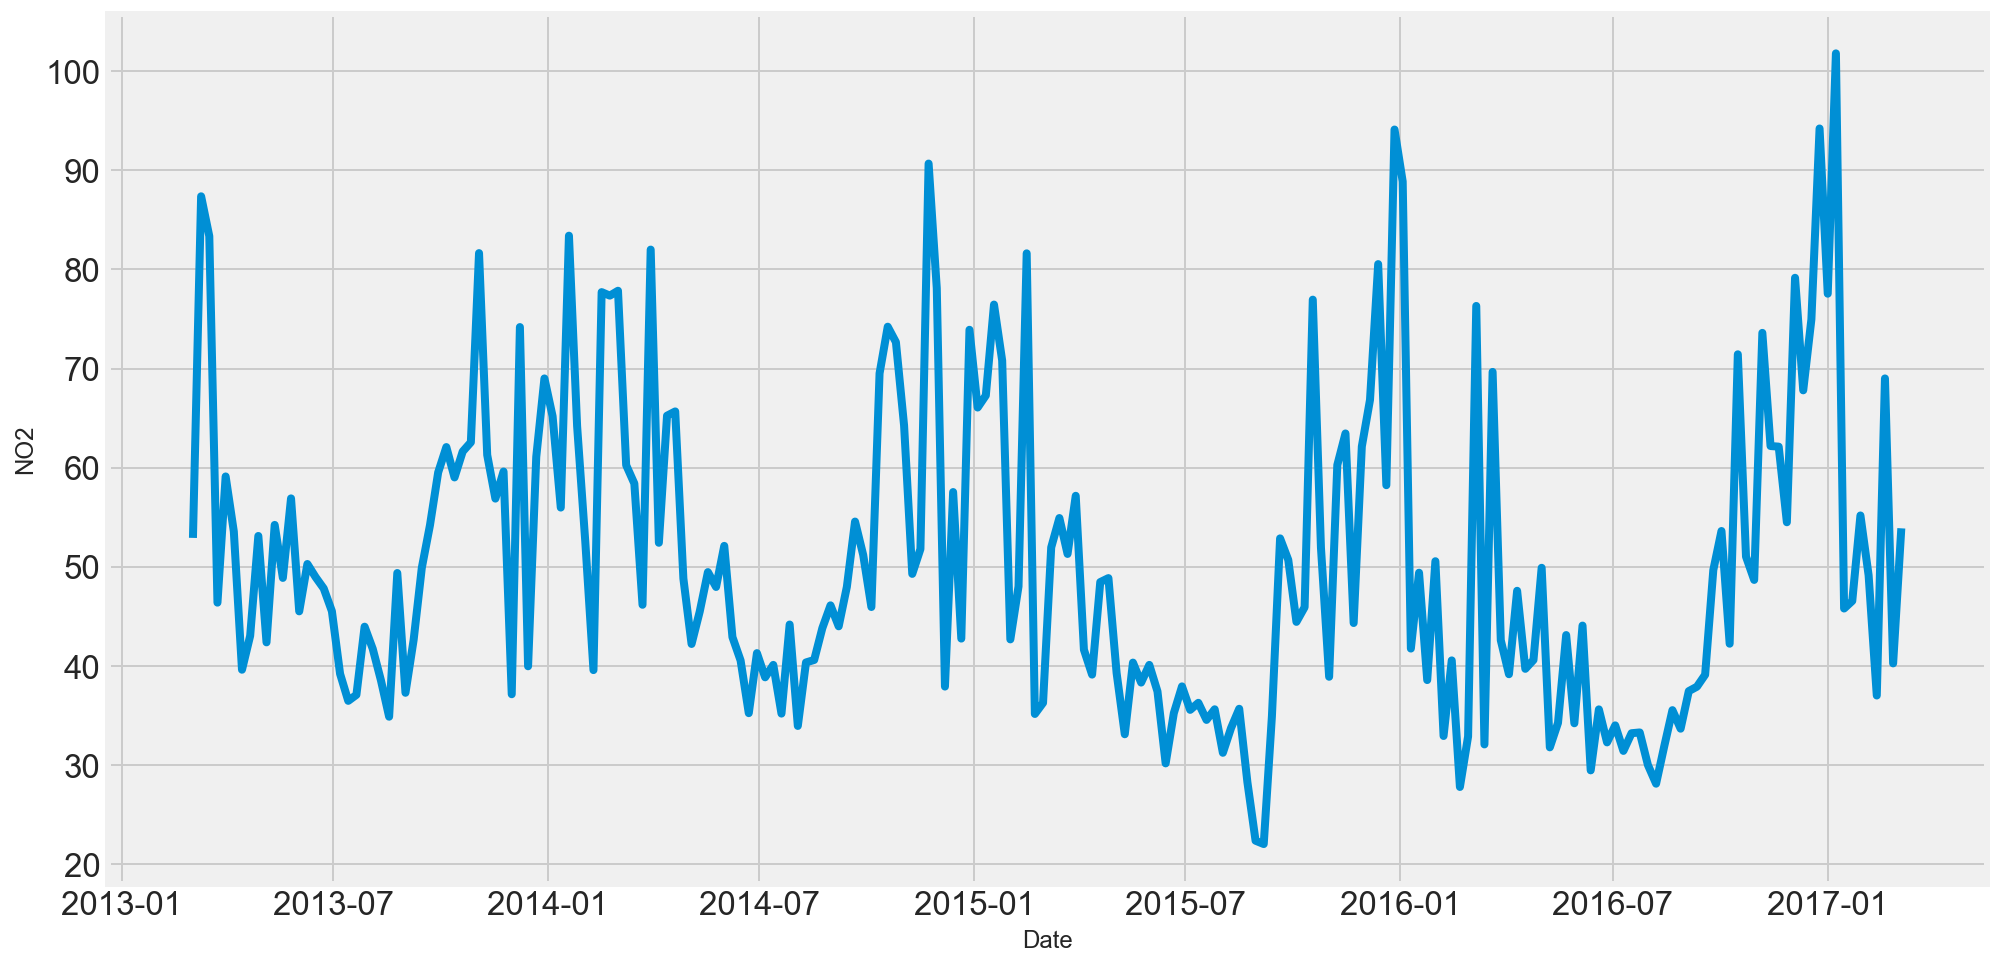

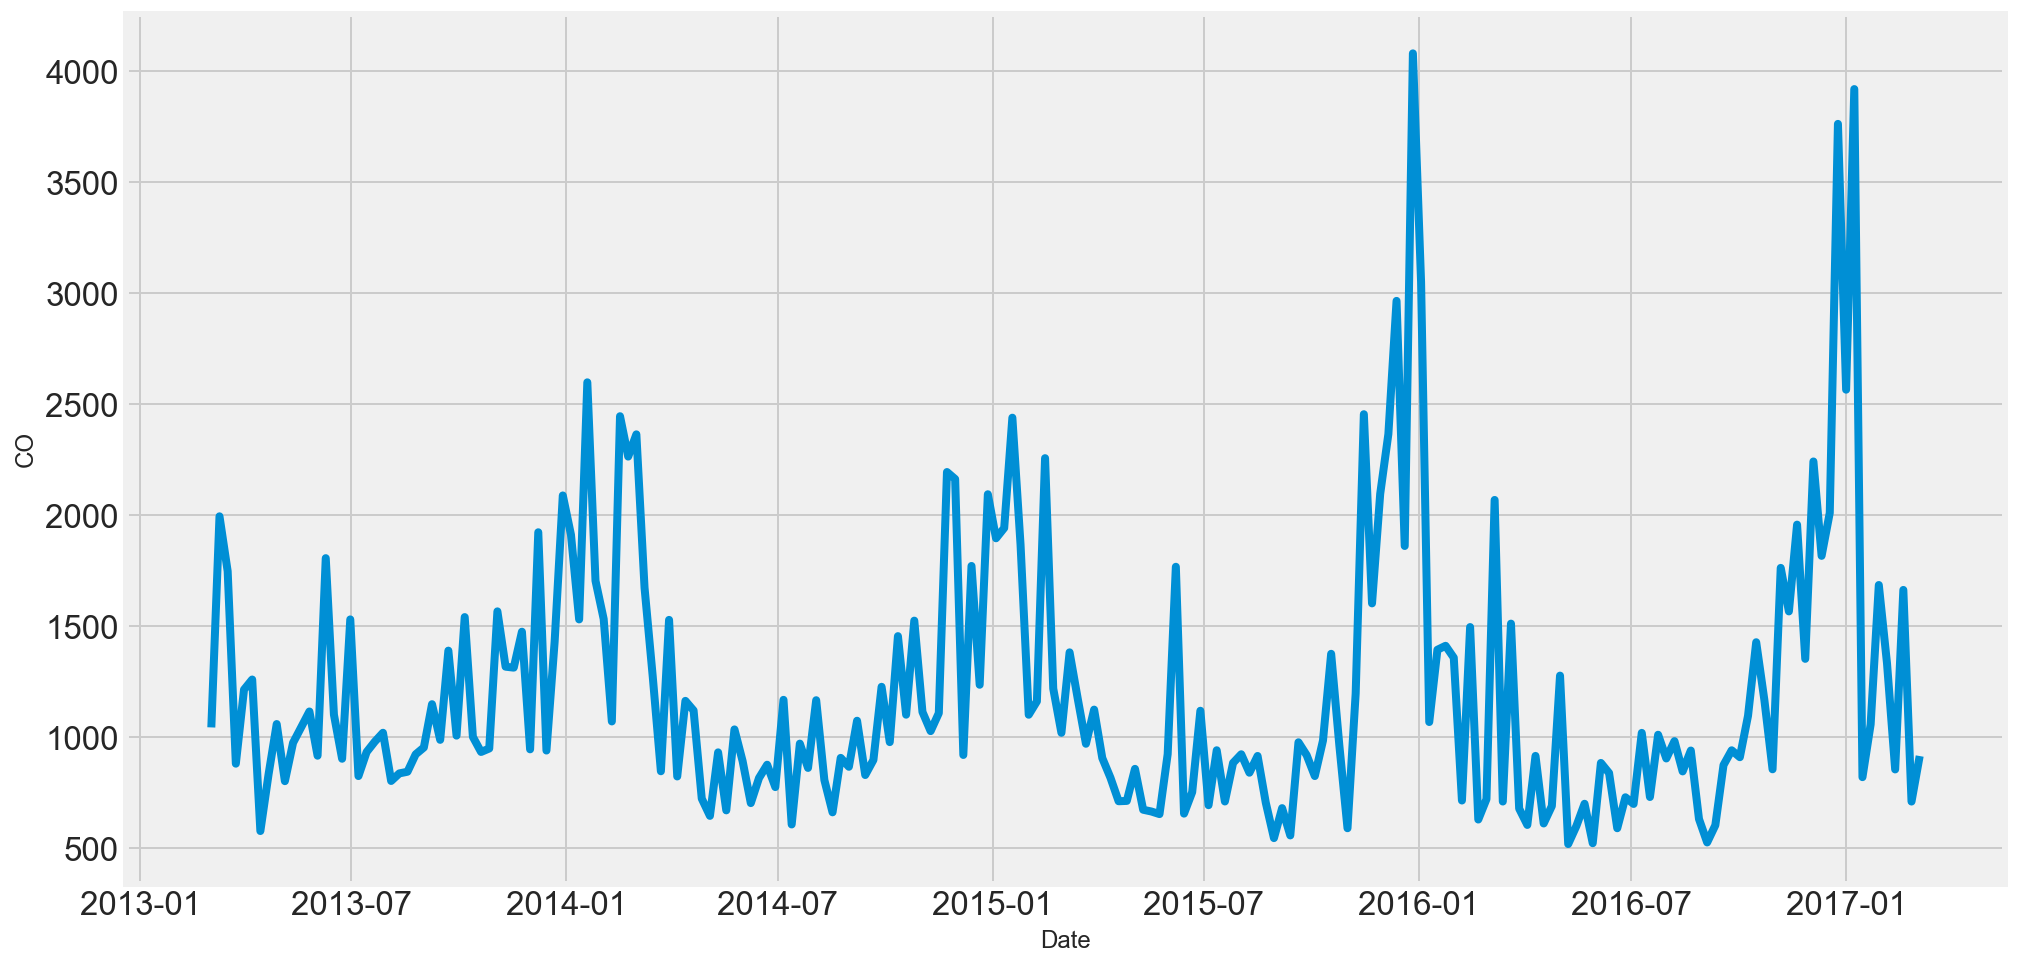

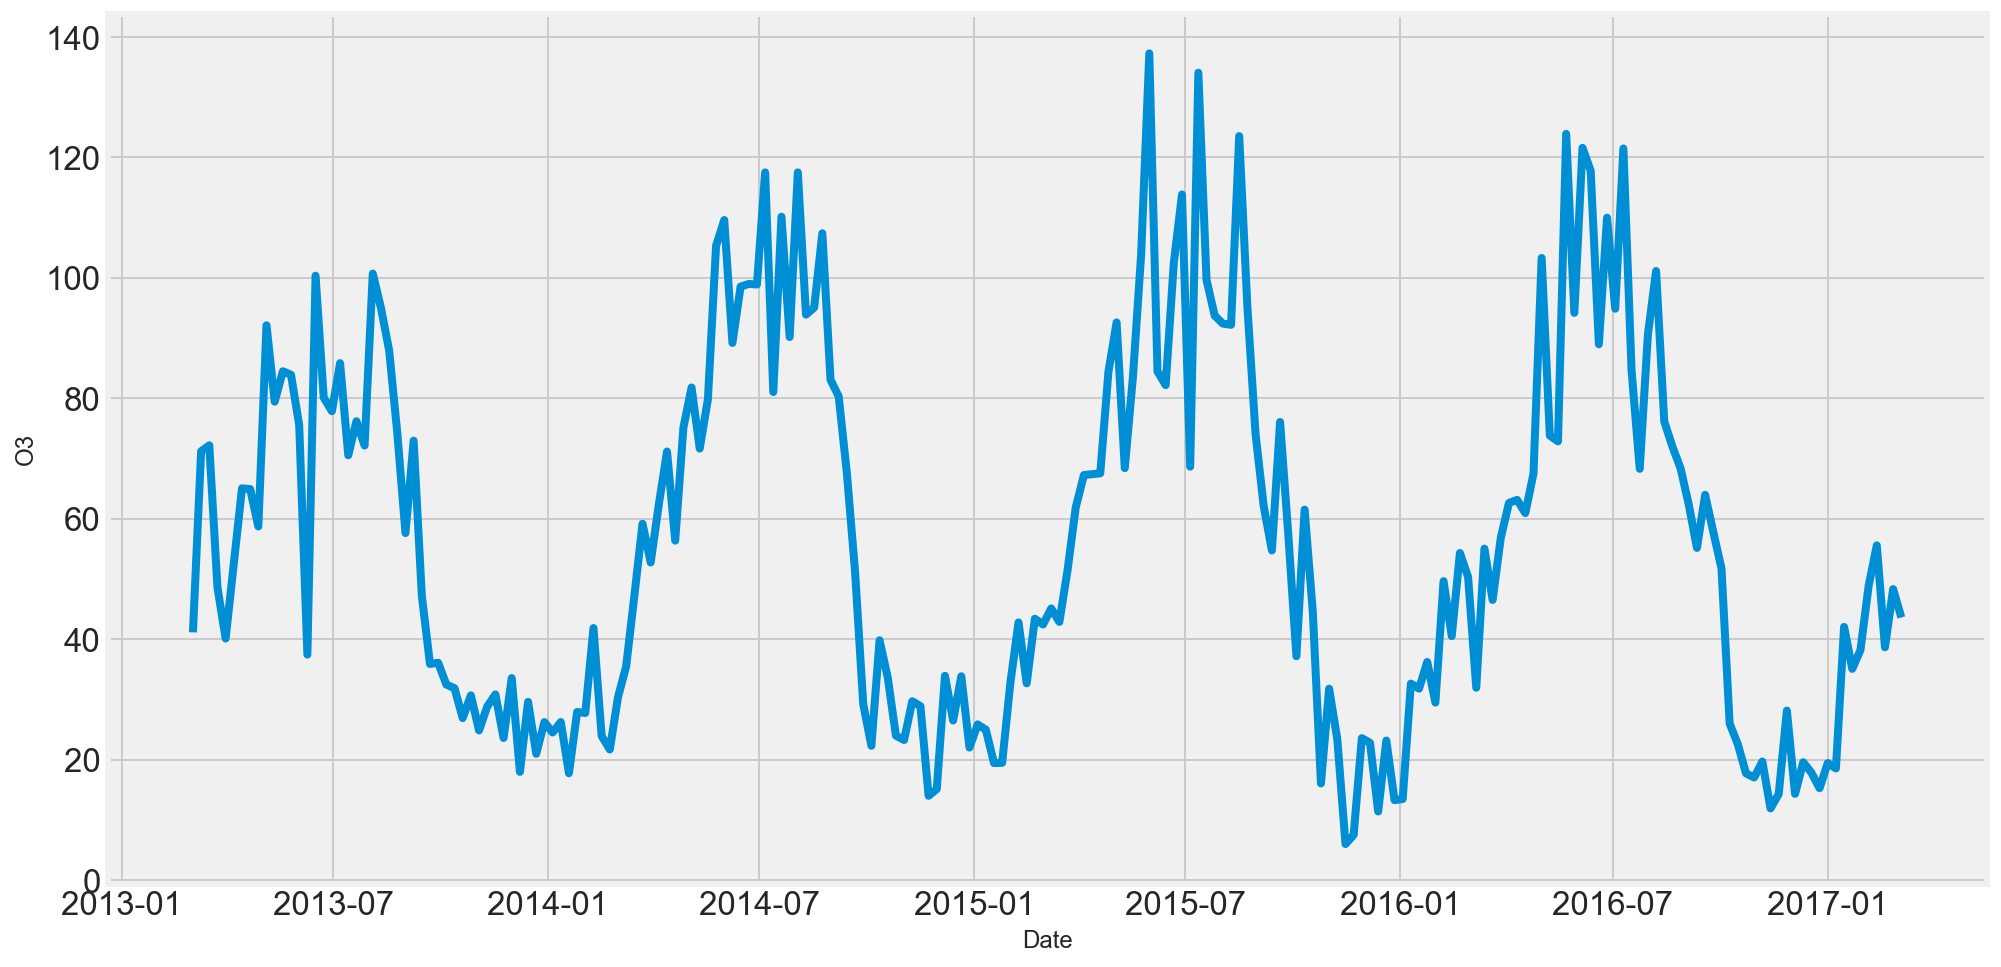

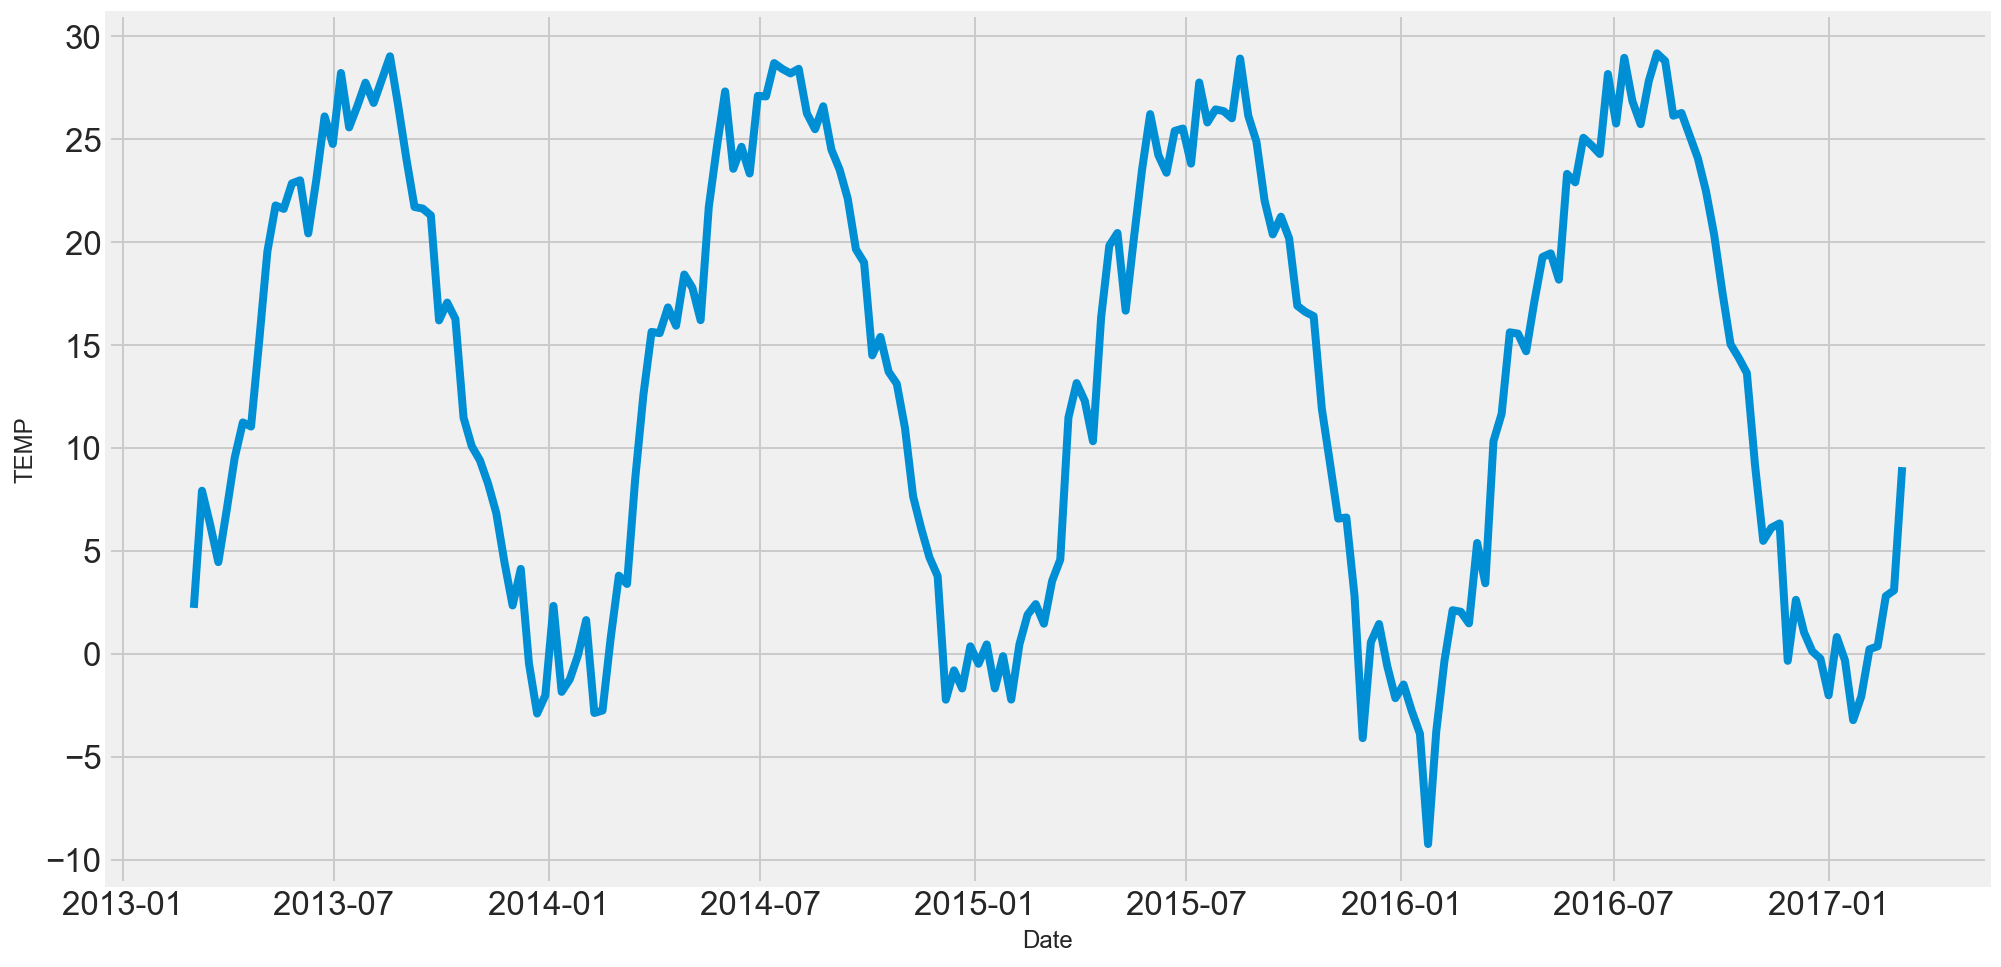

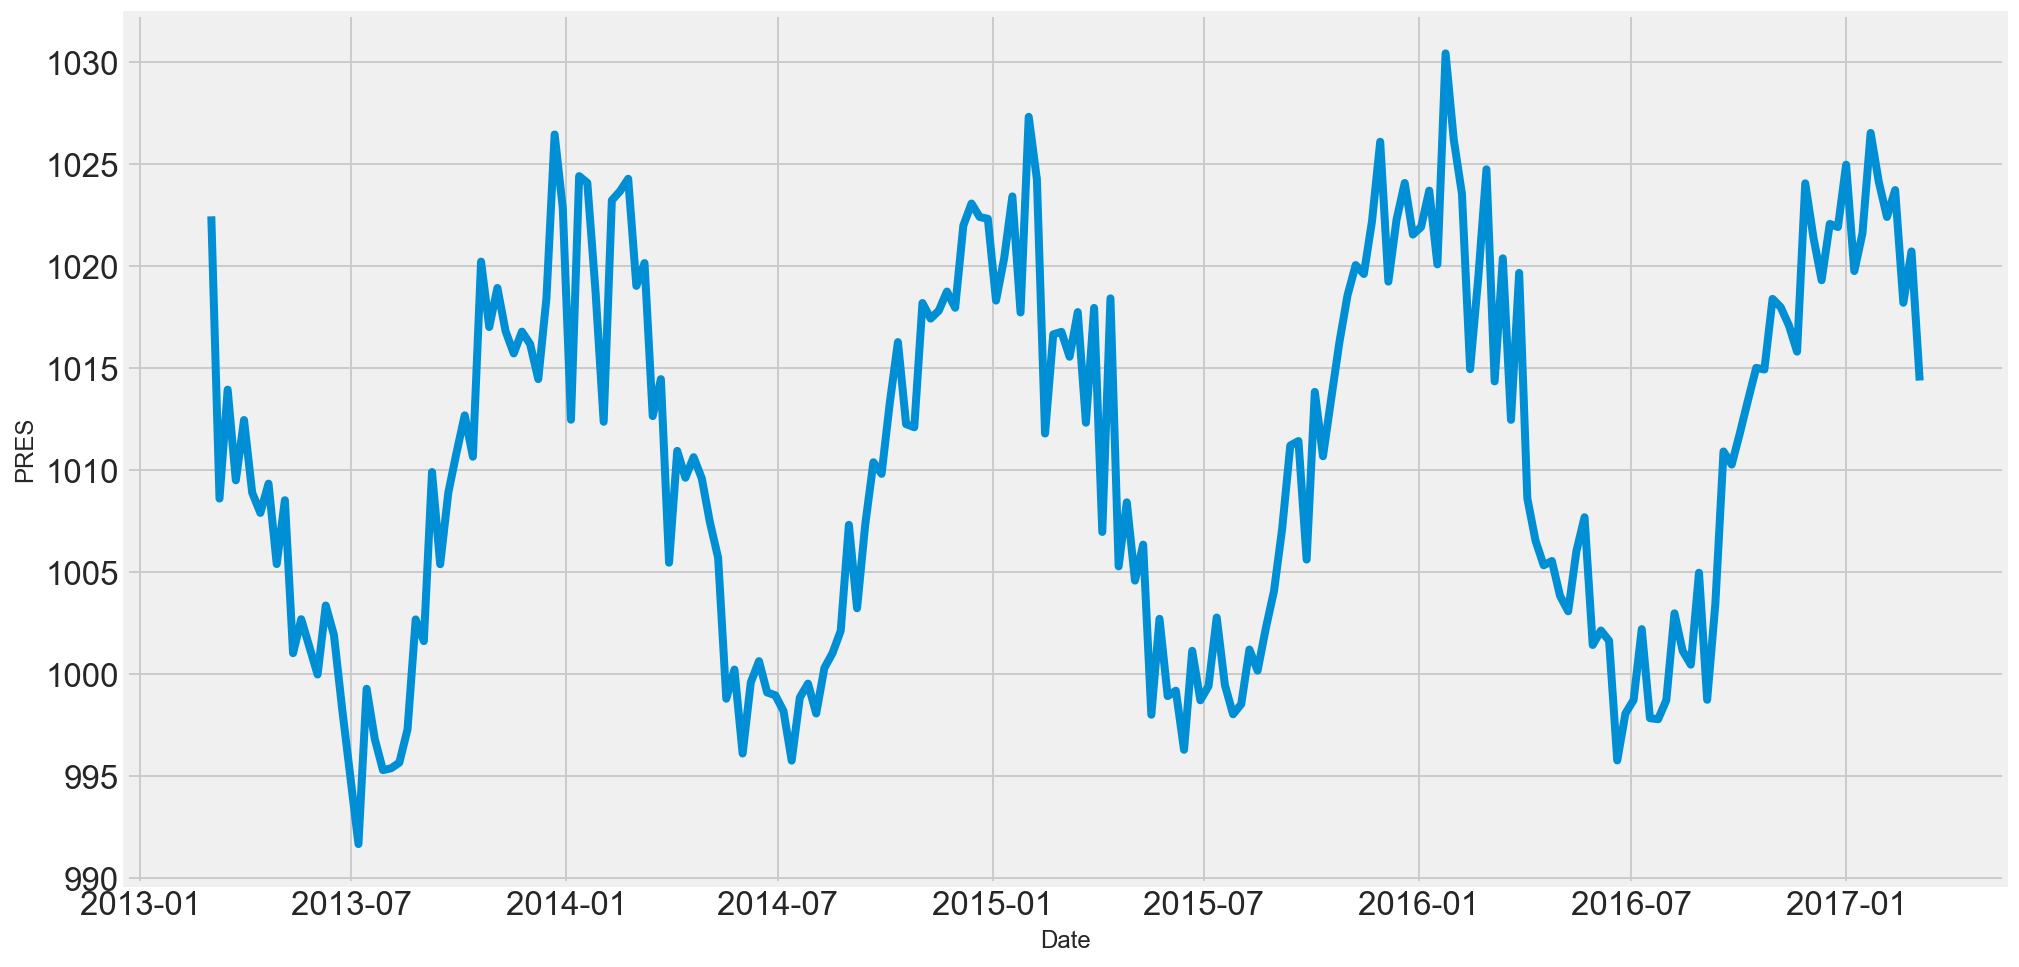

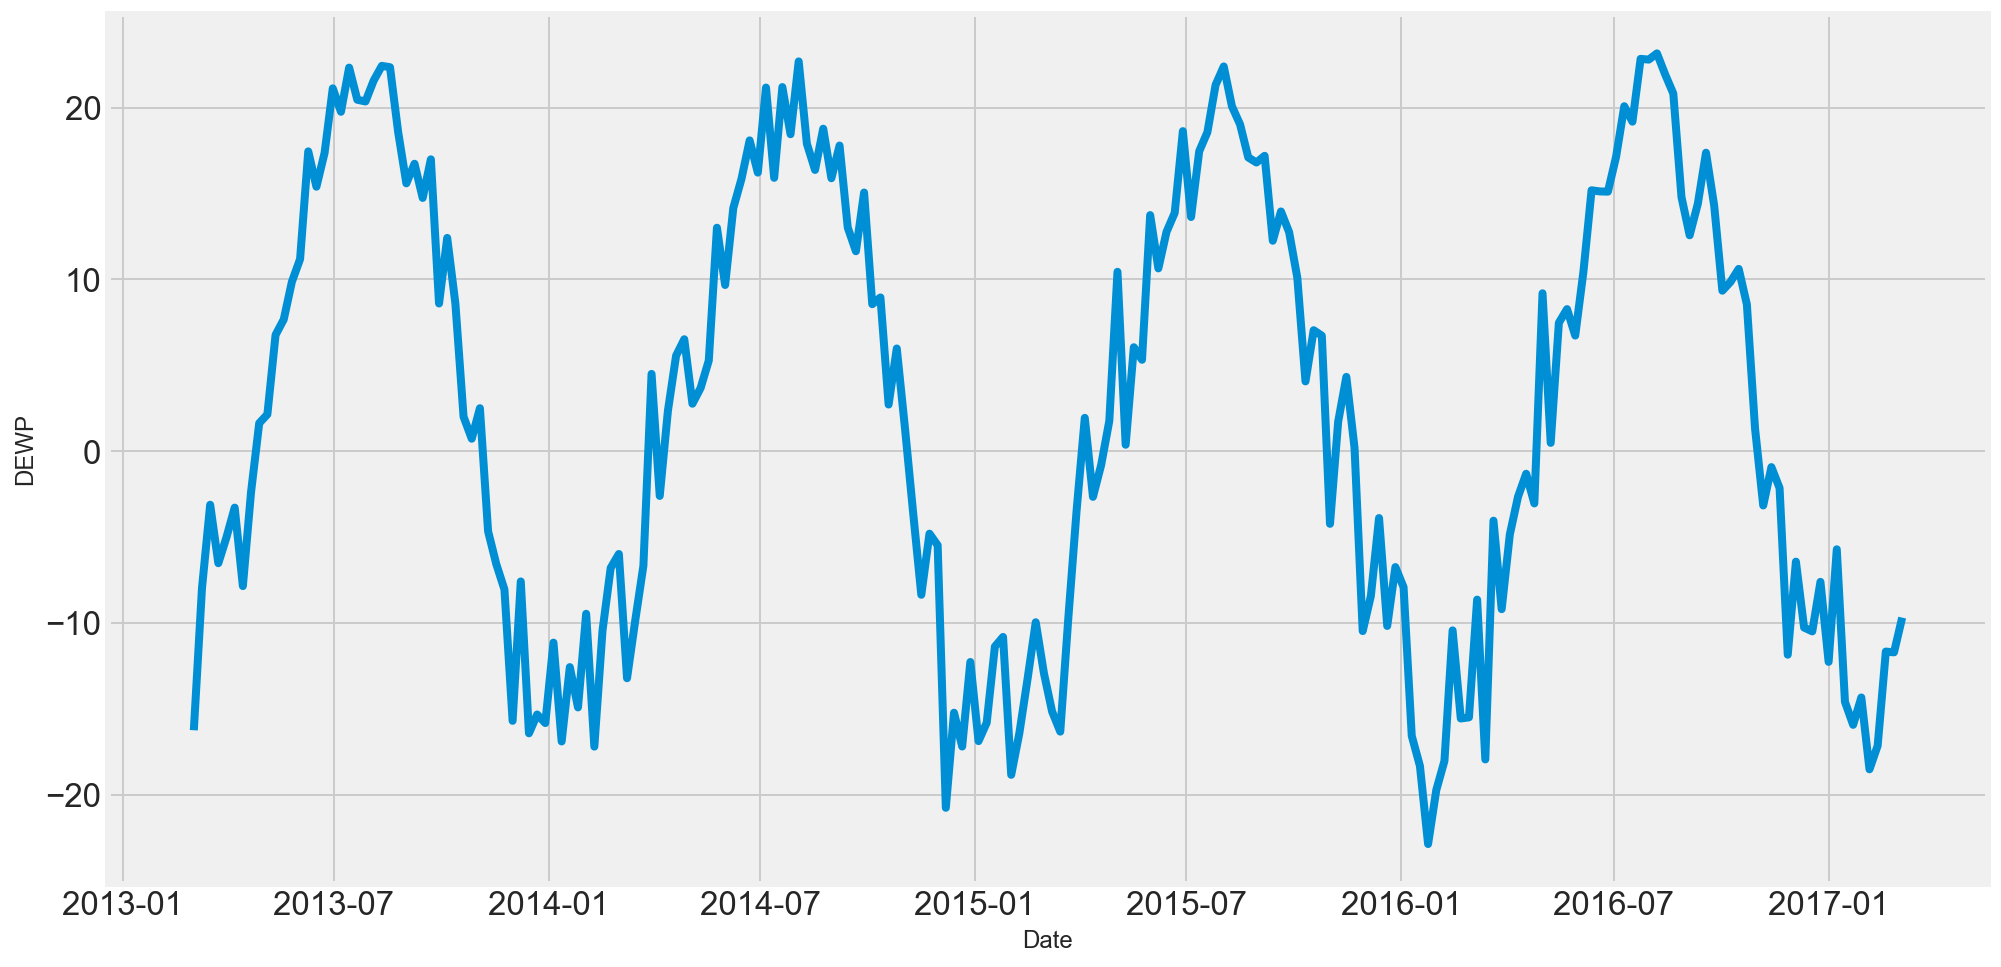

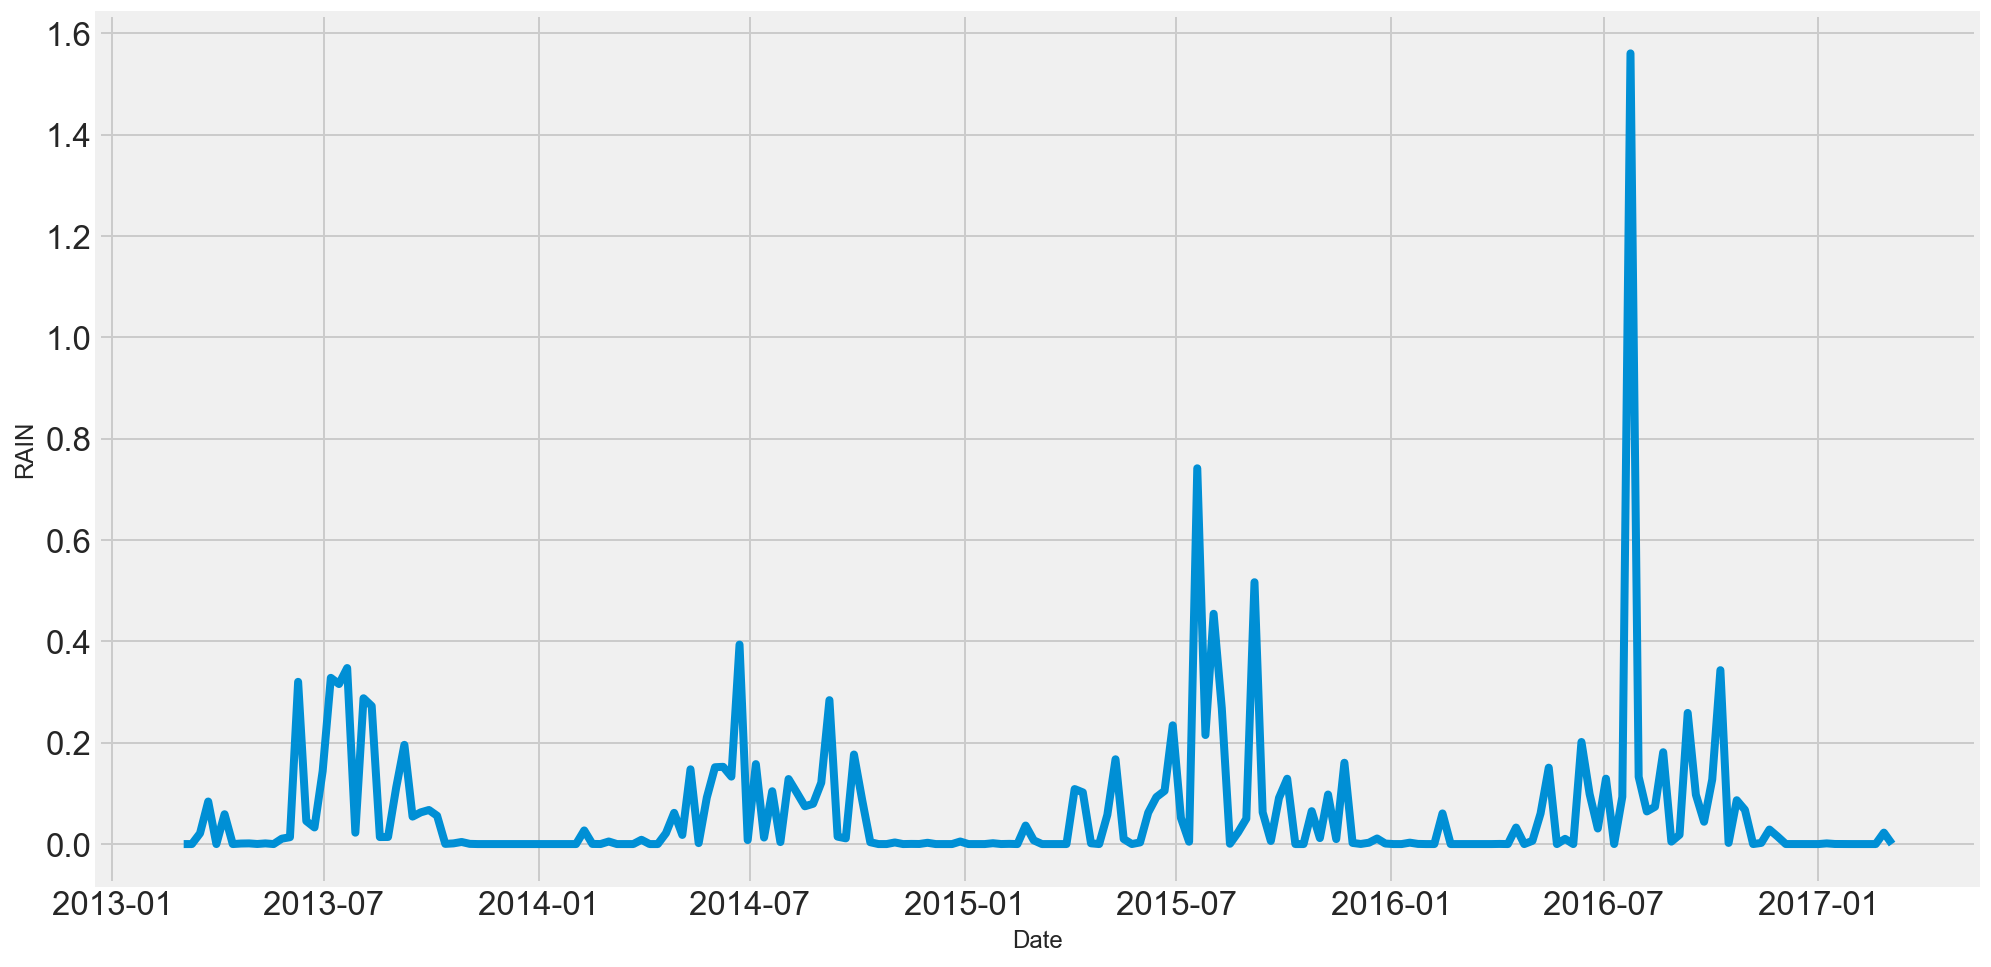

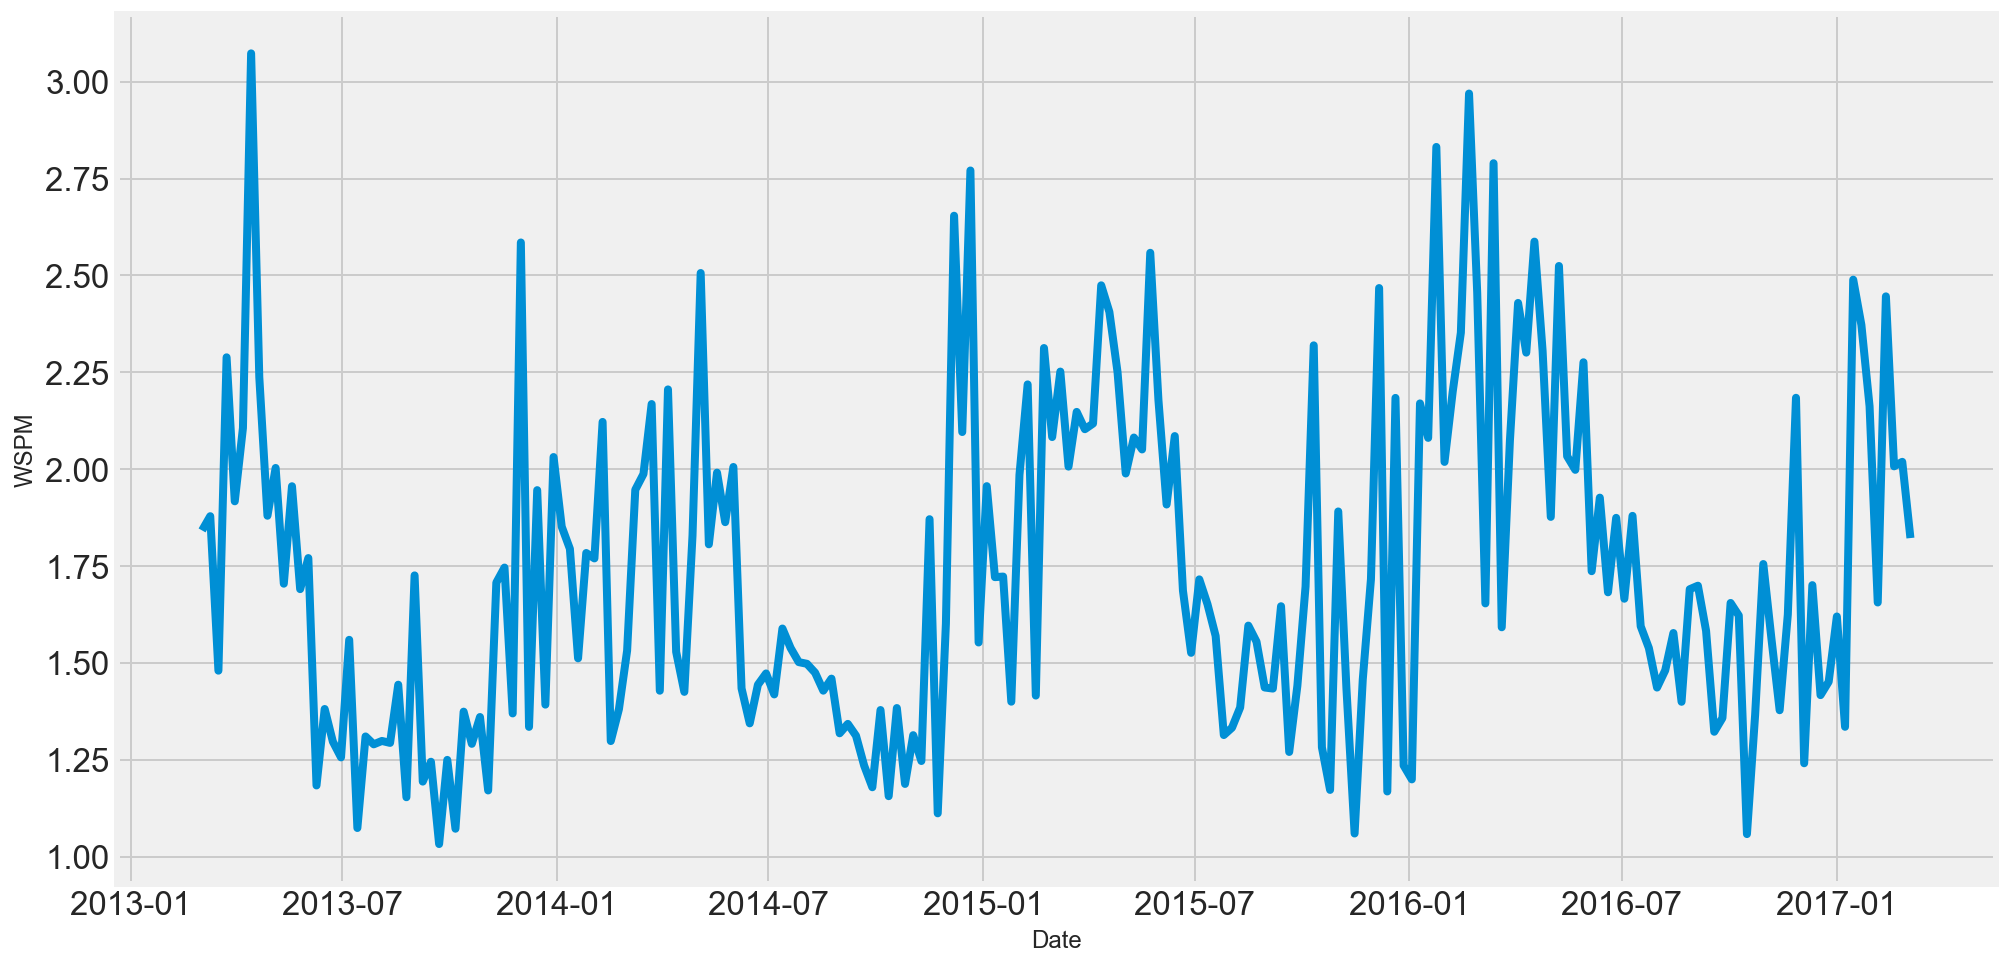

In [32]:
def plot_data(col):
    plt.figure(figsize=(15,8))
    sns.lineplot(y=col ,x='Date',data=df_weekly)
    
    
for col in df_weekly.columns:
    plot_data(col)

In [33]:
df_monthly = df_daily.resample('M').mean()
df_monthly.head()

PM2.5        PM10        SO2        NO2           CO  \
Date                                                                    
2013-03-31  104.625672  128.717686  38.285982  67.494017  1420.110215   
2013-04-30   62.086227   95.828819  20.614506  46.457355   902.883218   
2013-05-31   80.890009  129.808356  24.939006  50.576037   983.023746   
2013-06-30  101.236053  115.835012  13.625159  48.249550  1332.907755   
2013-07-31   67.378678   76.557345   7.410949  39.955142   932.193486   

                   O3       TEMP         PRES       DEWP      RAIN      WSPM  
Date                                                                          
2013-03-31  56.387590   5.992249  1012.224373  -6.682090  0.023768  1.886414  
2013-04-30  61.348644  12.380058  1007.811817  -3.203681  0.014294  2.333310  
2013-05-31  83.671420  21.676691  1002.652912   8.131384  0.005791  1.811694  
2013-06-30  74.453136  23.583426   999.639838  17.433322  0.126528  1.287350  
2013-07-31  78.636699  27.108838   995.501639  20.902231  0.275582  1.317039

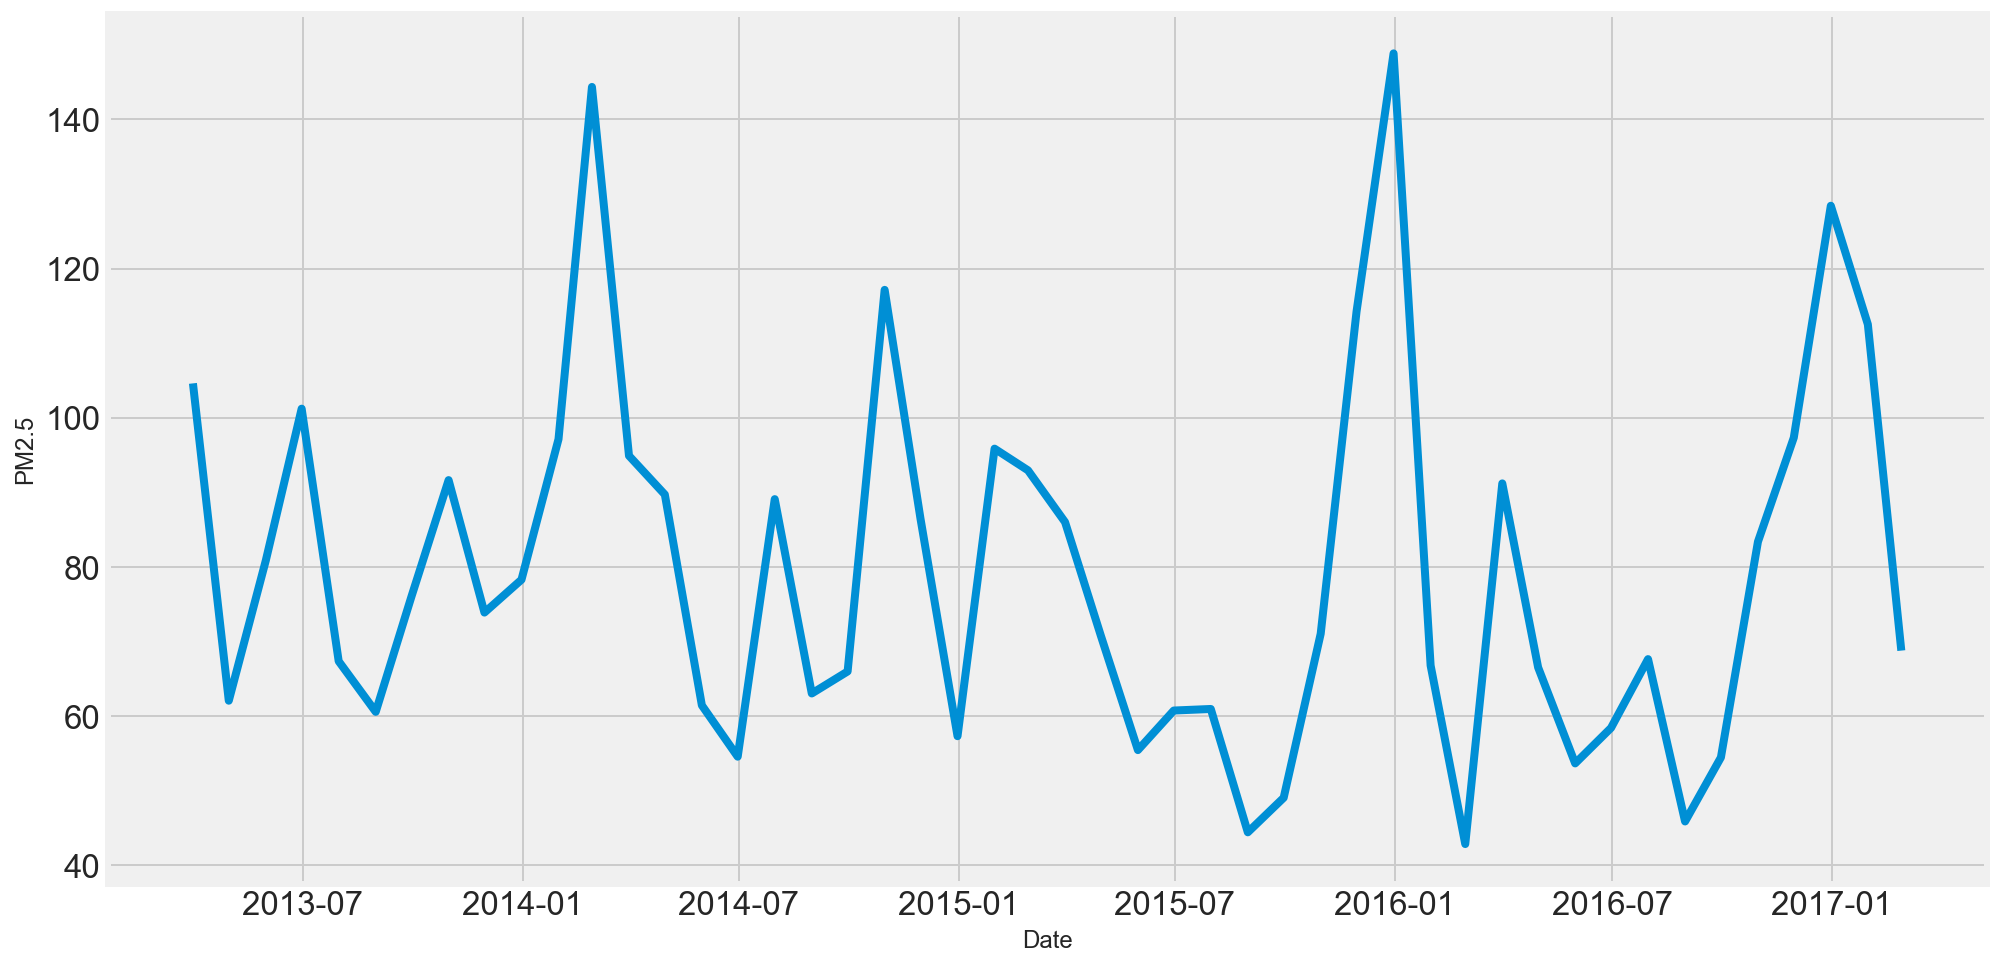

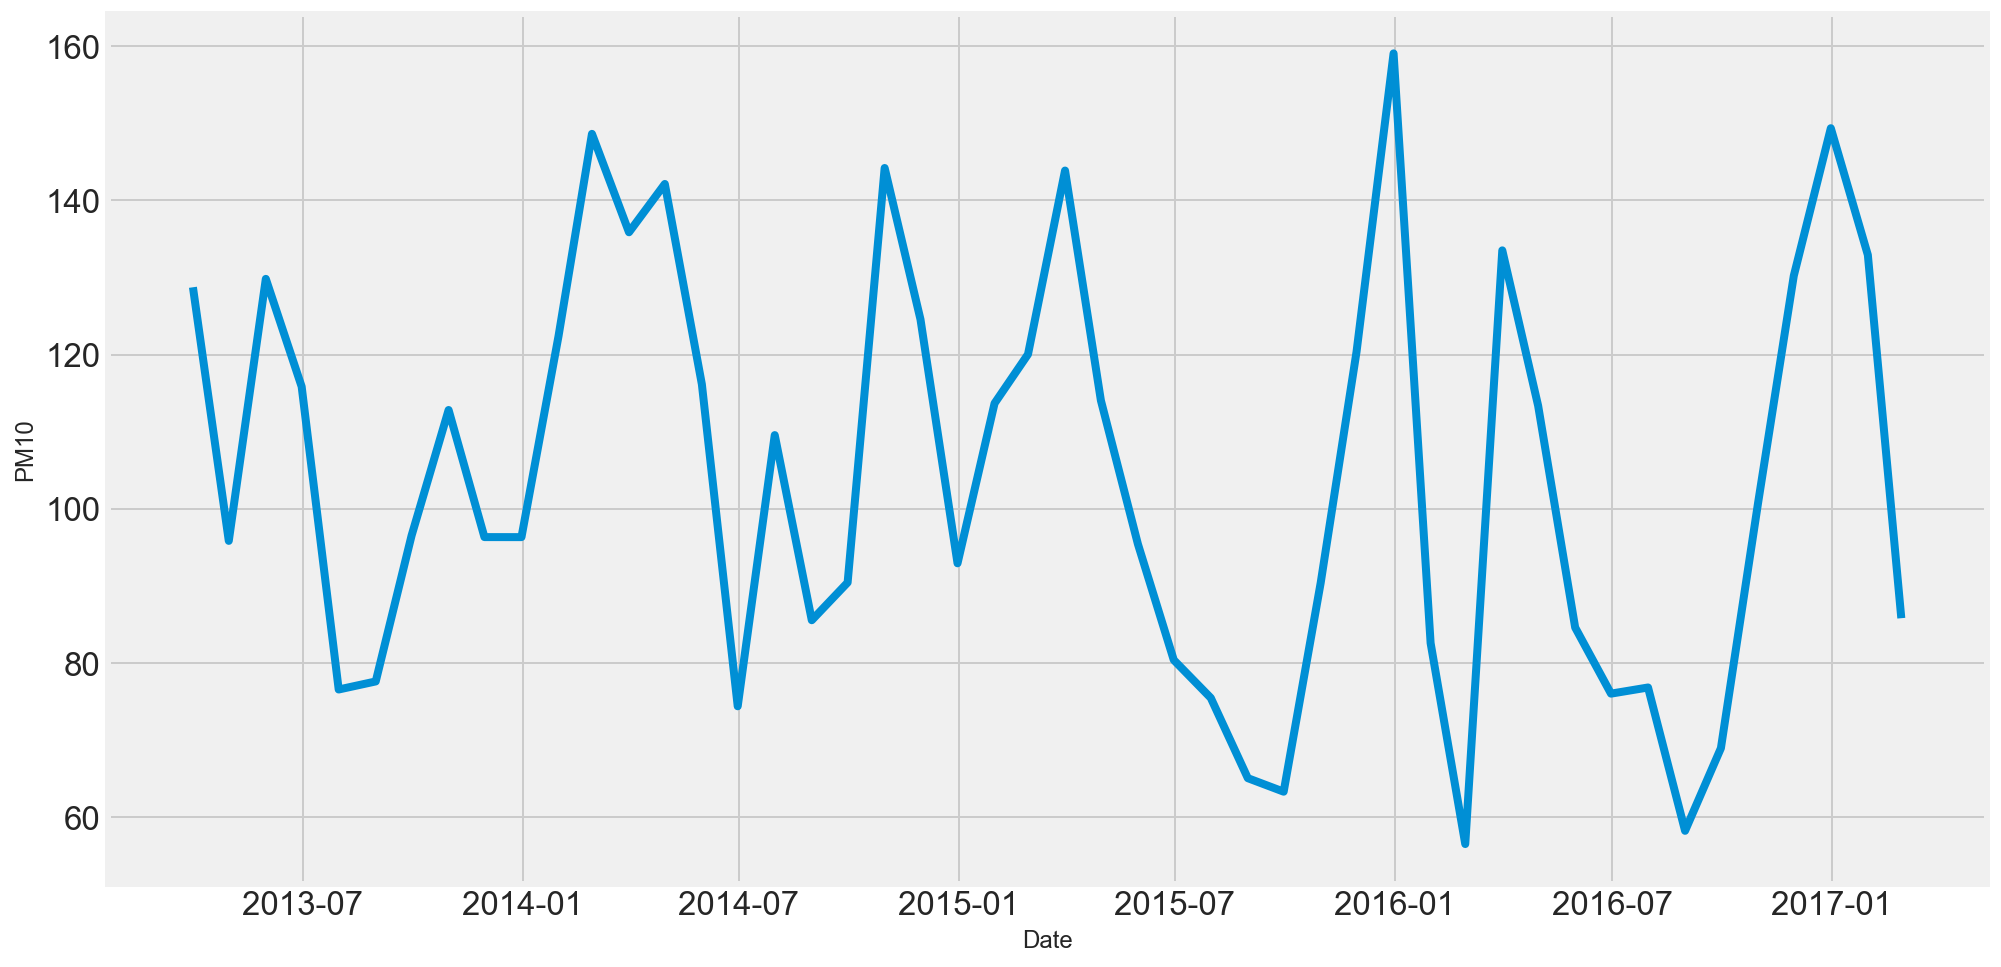

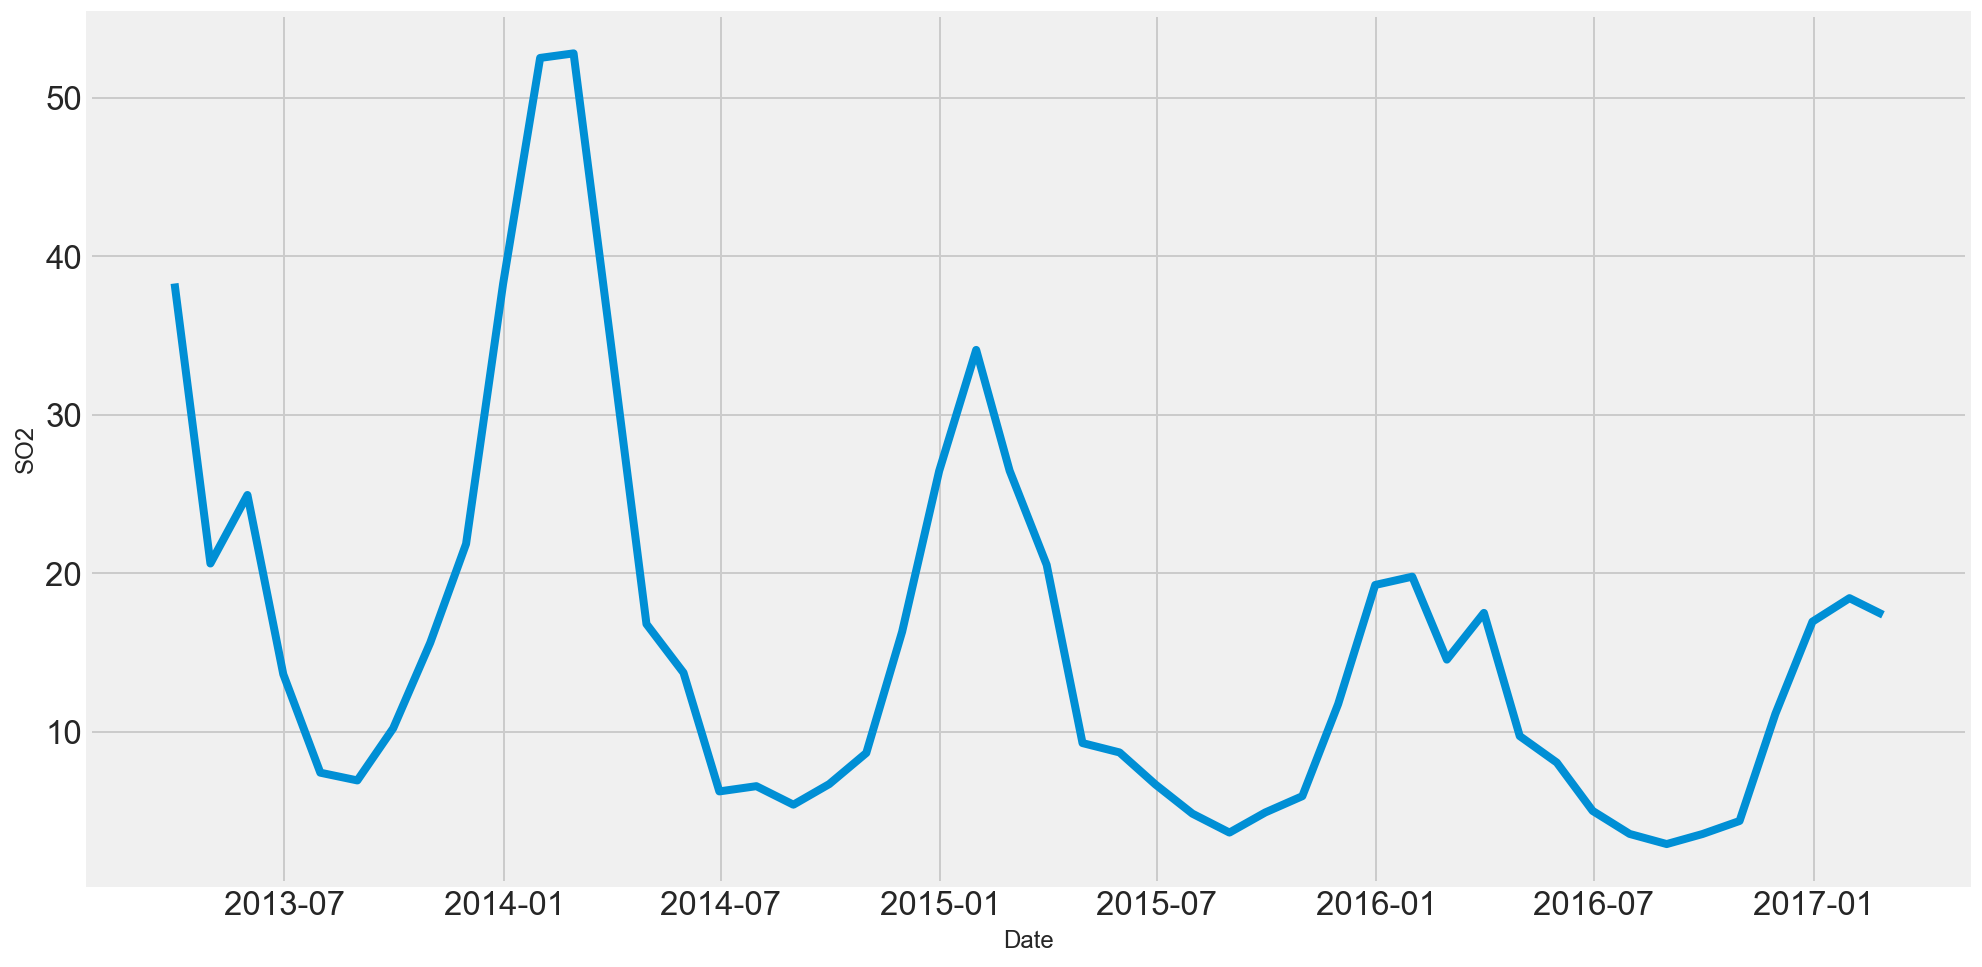

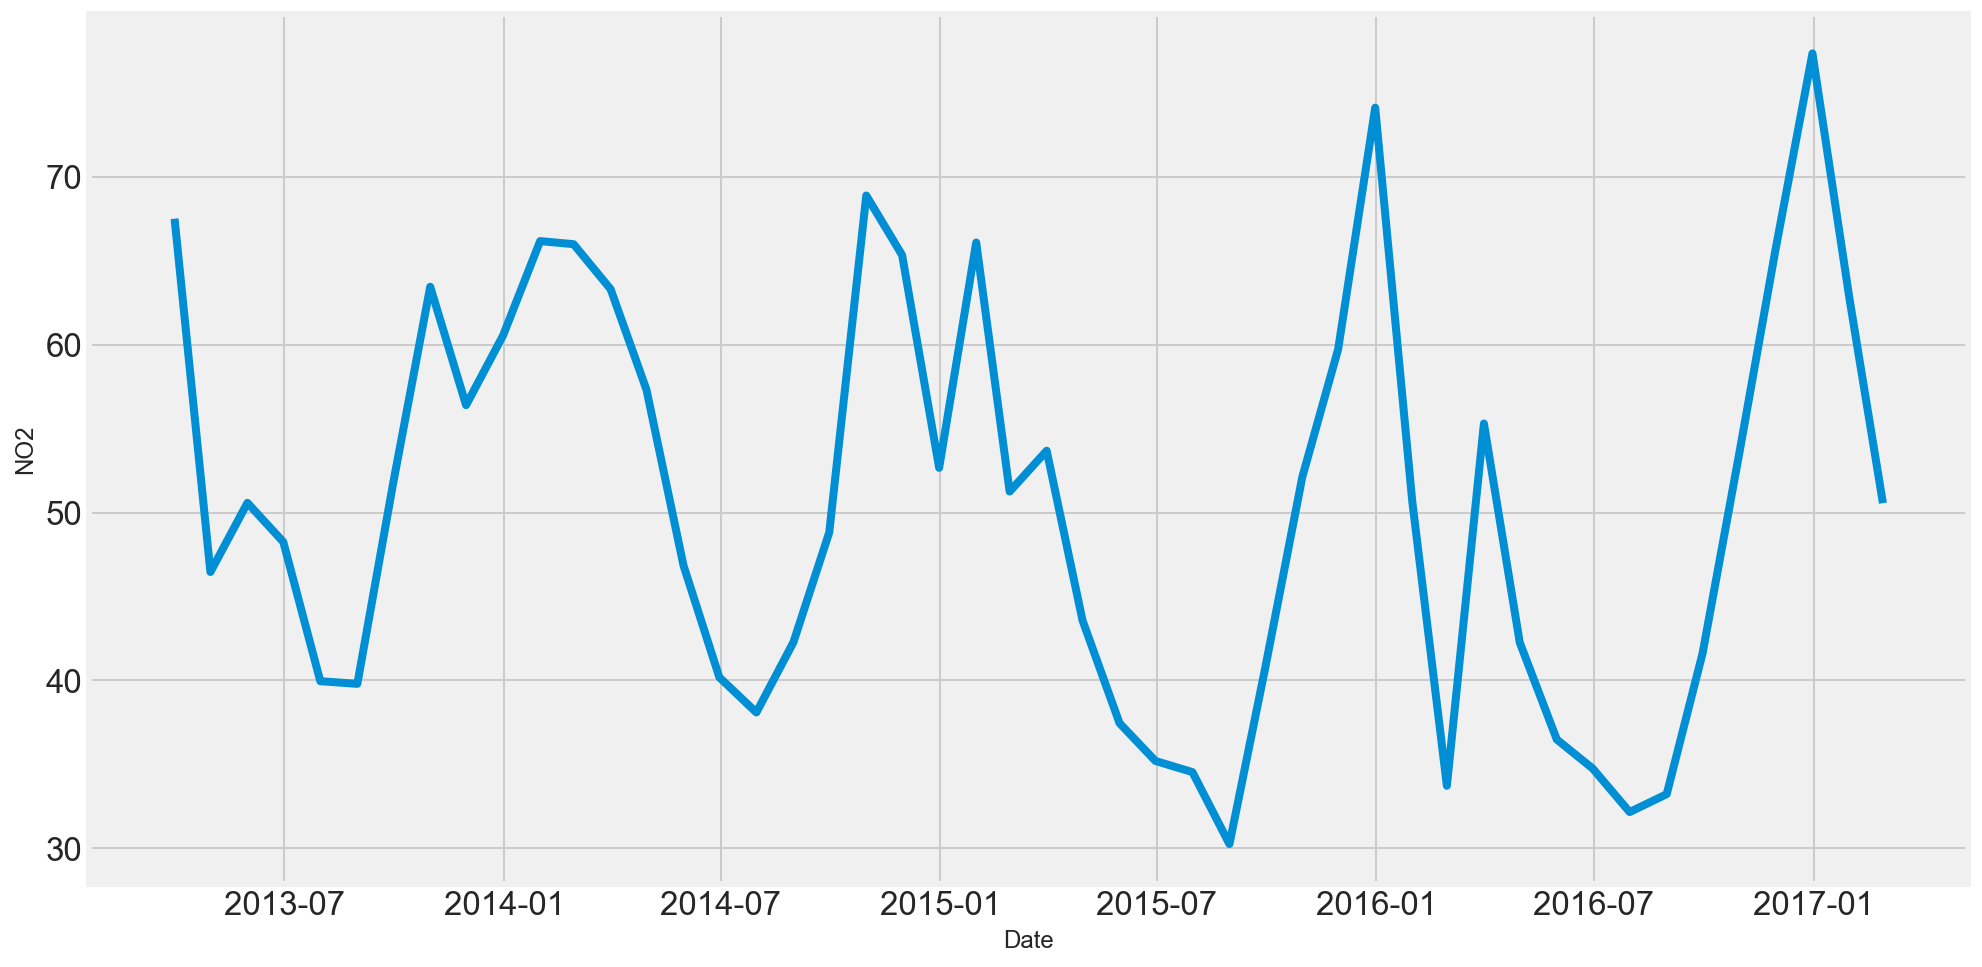

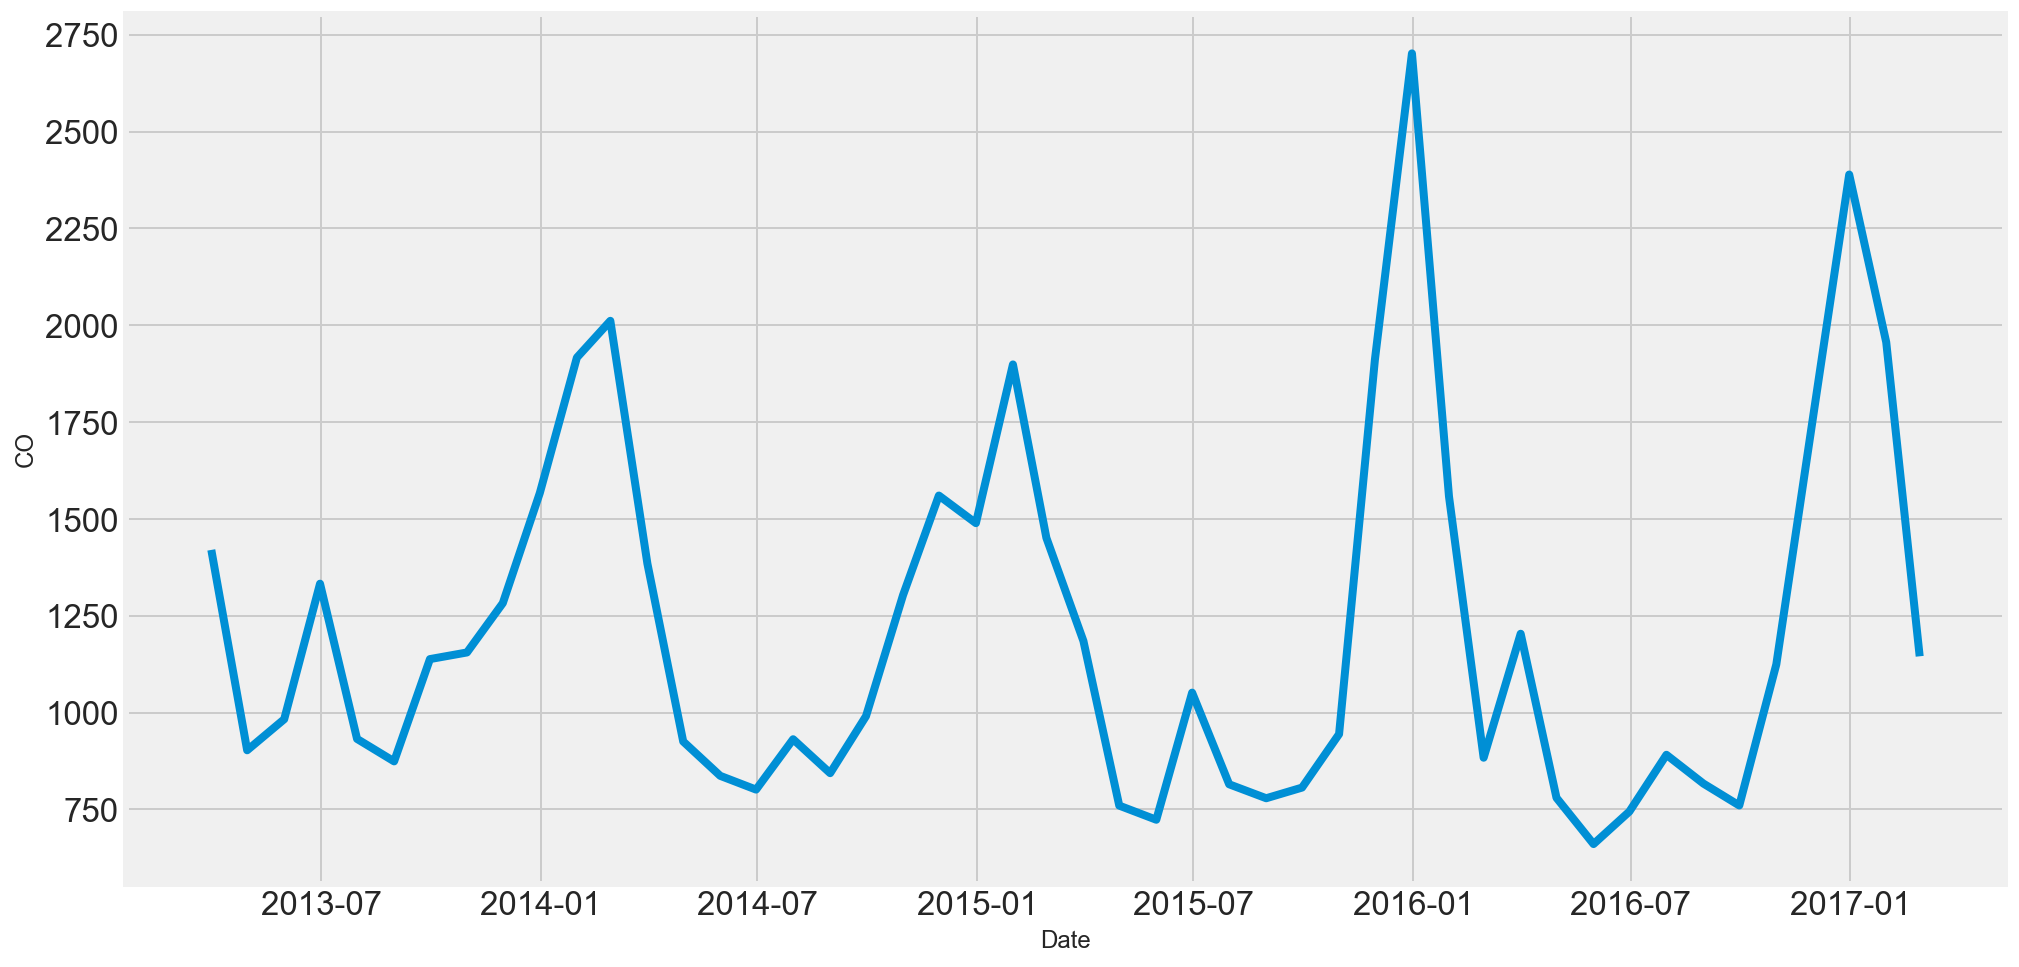

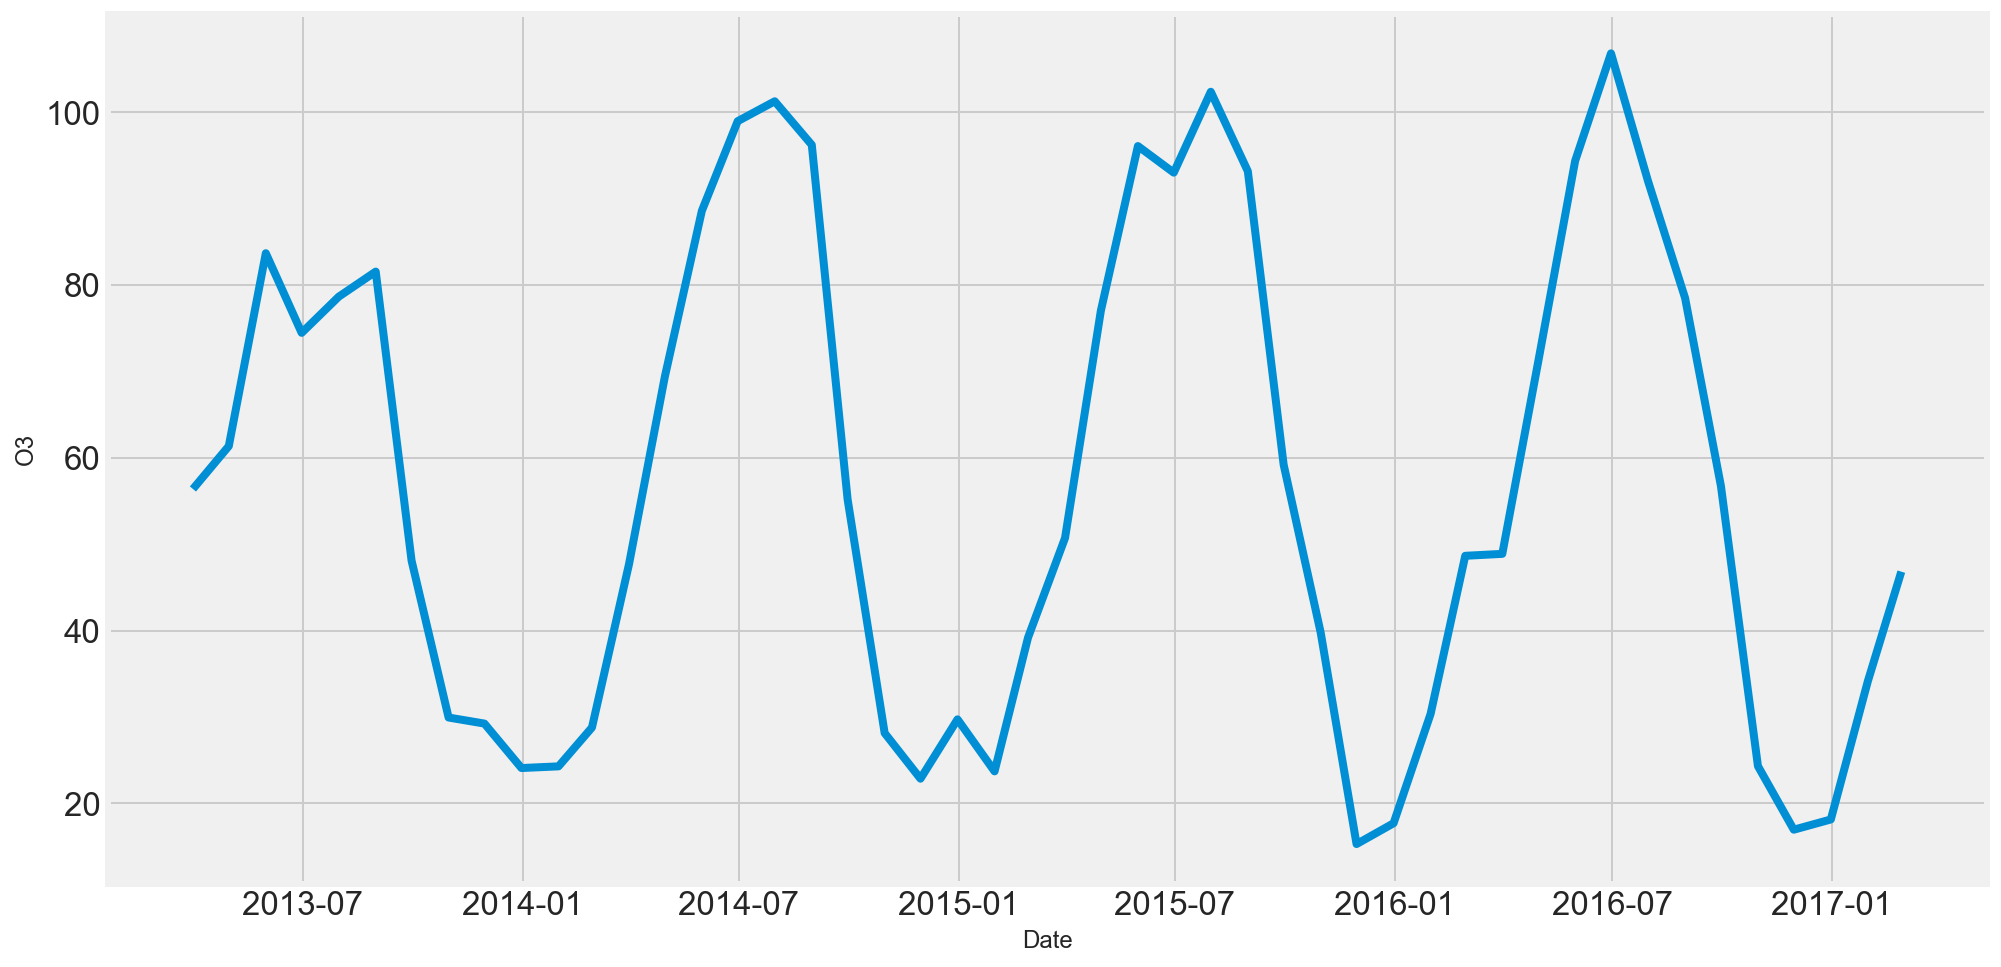

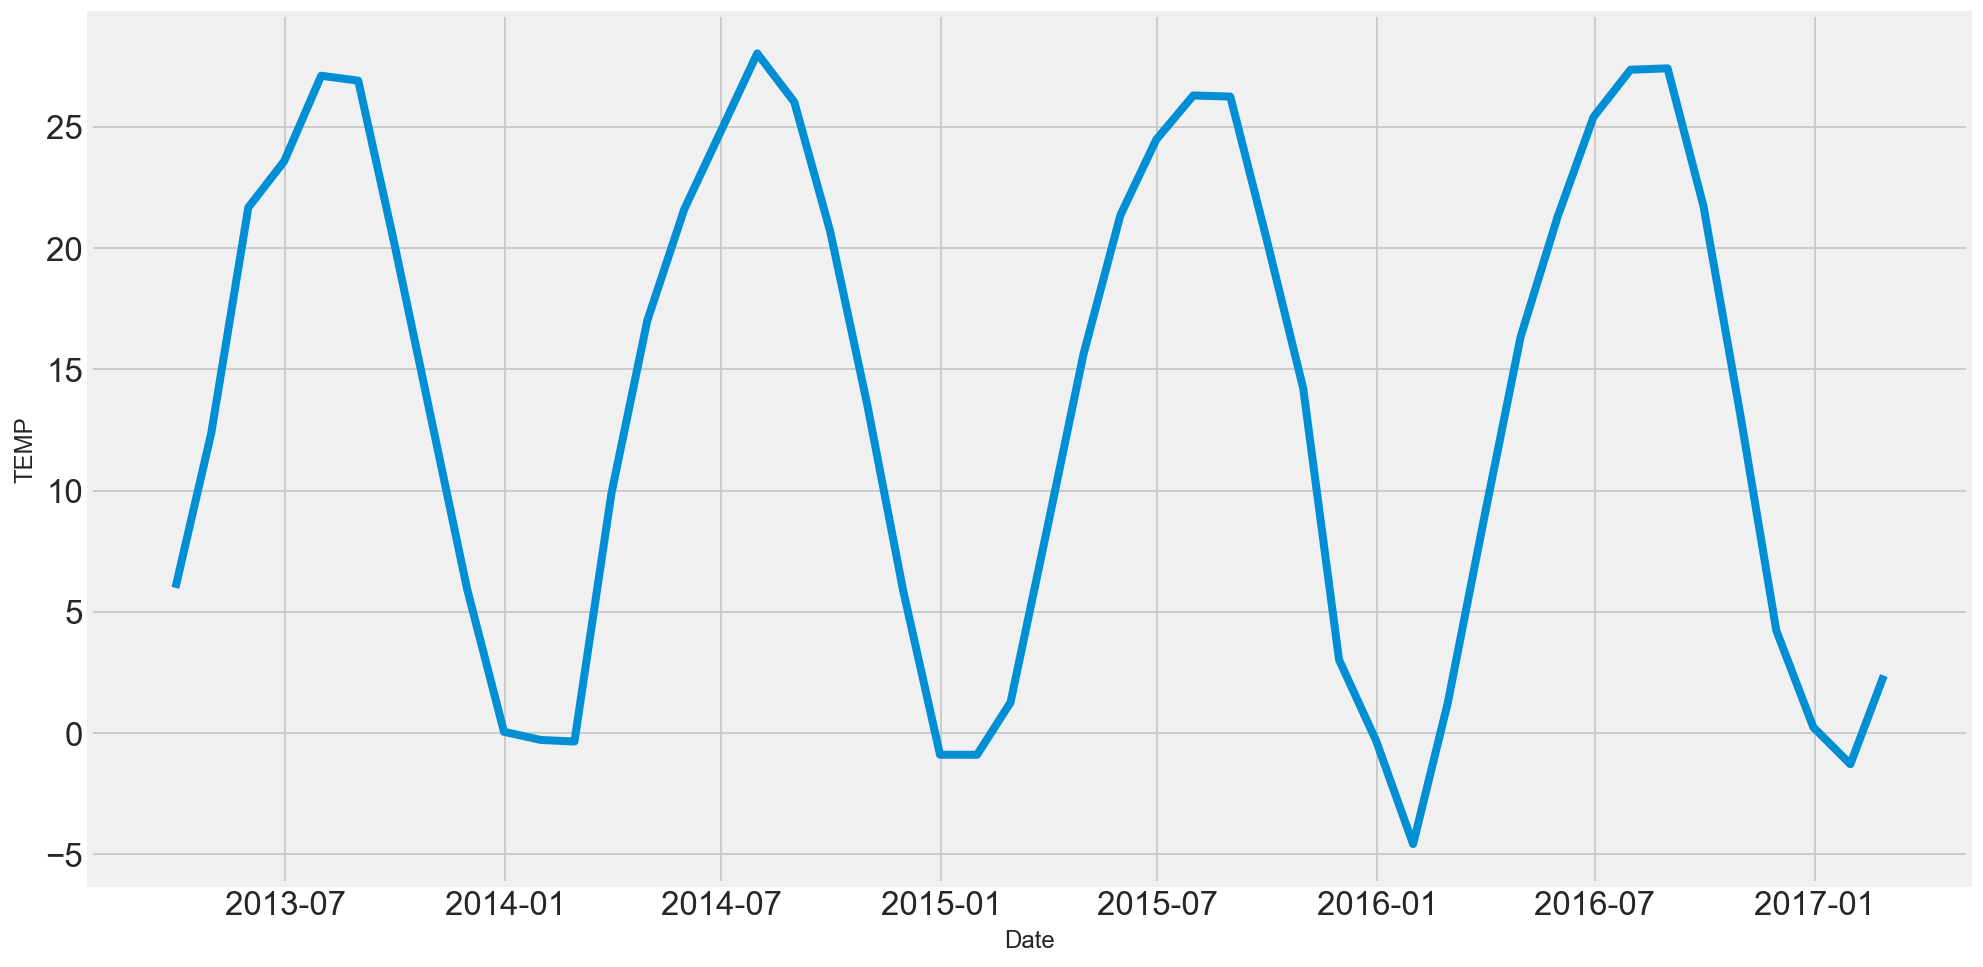

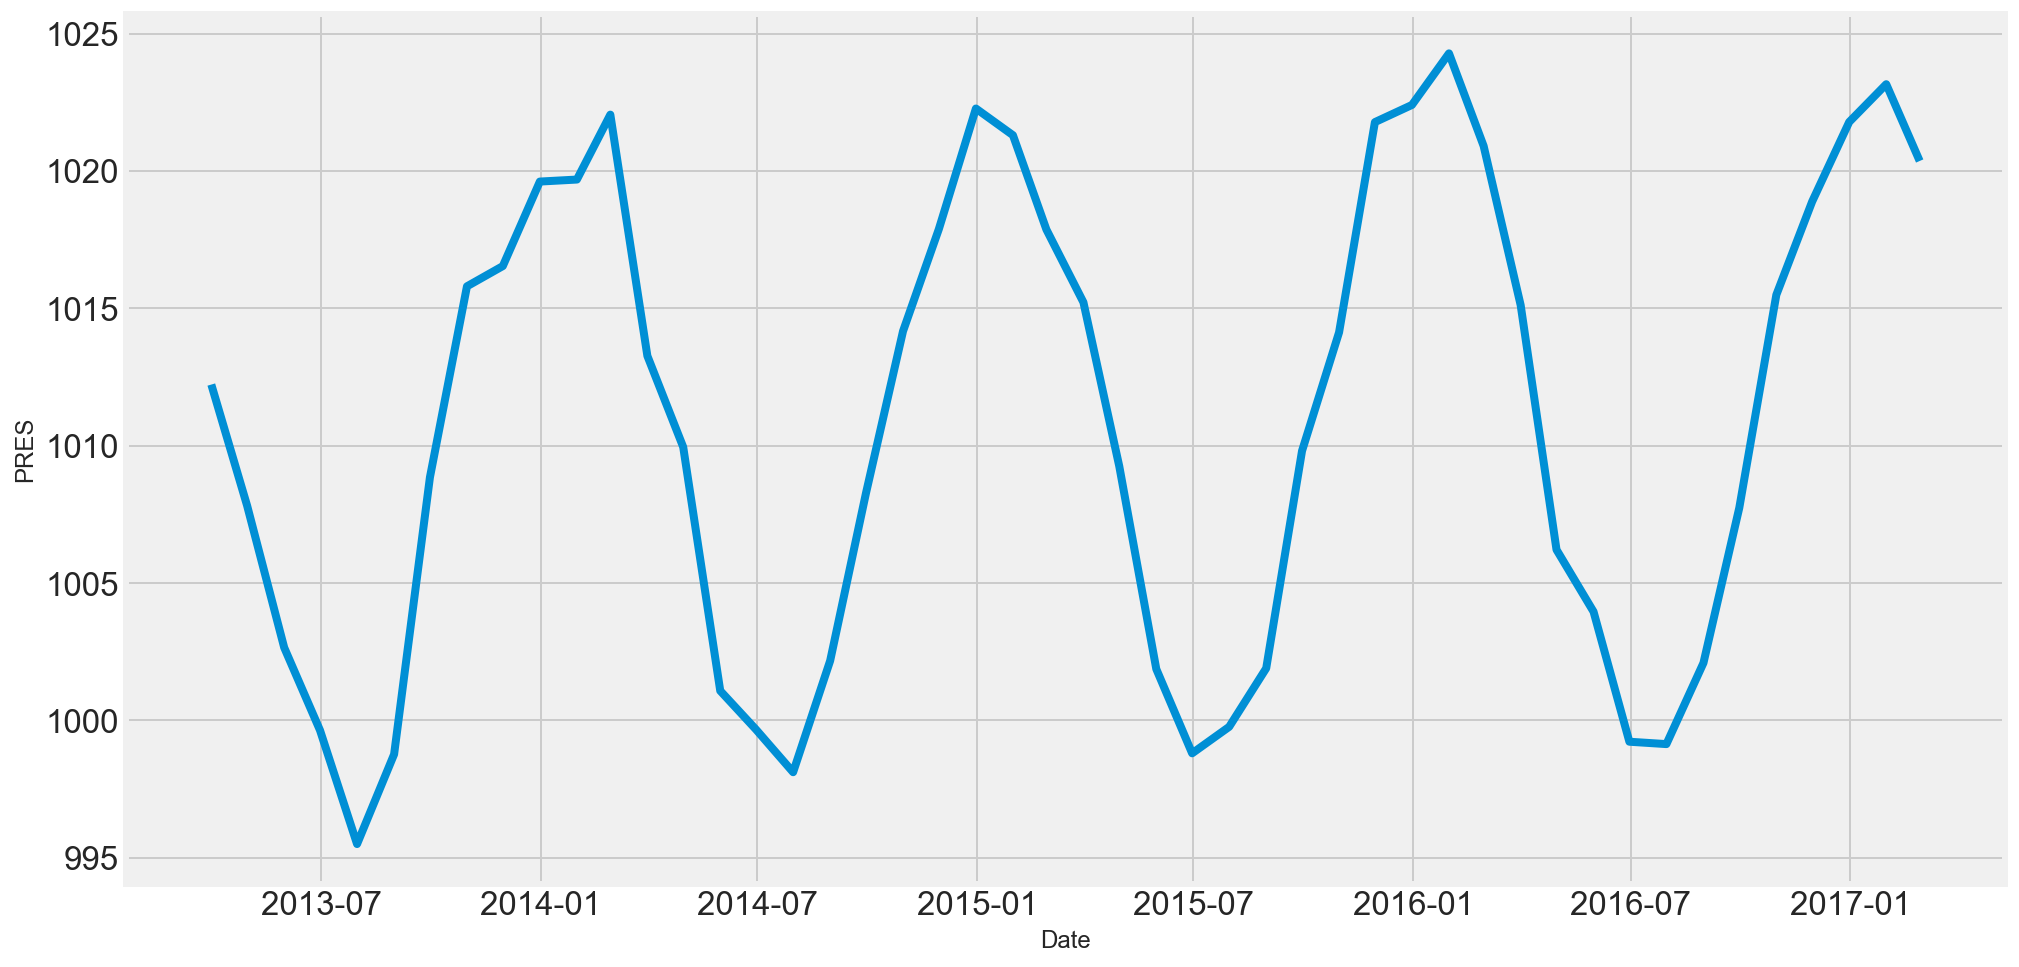

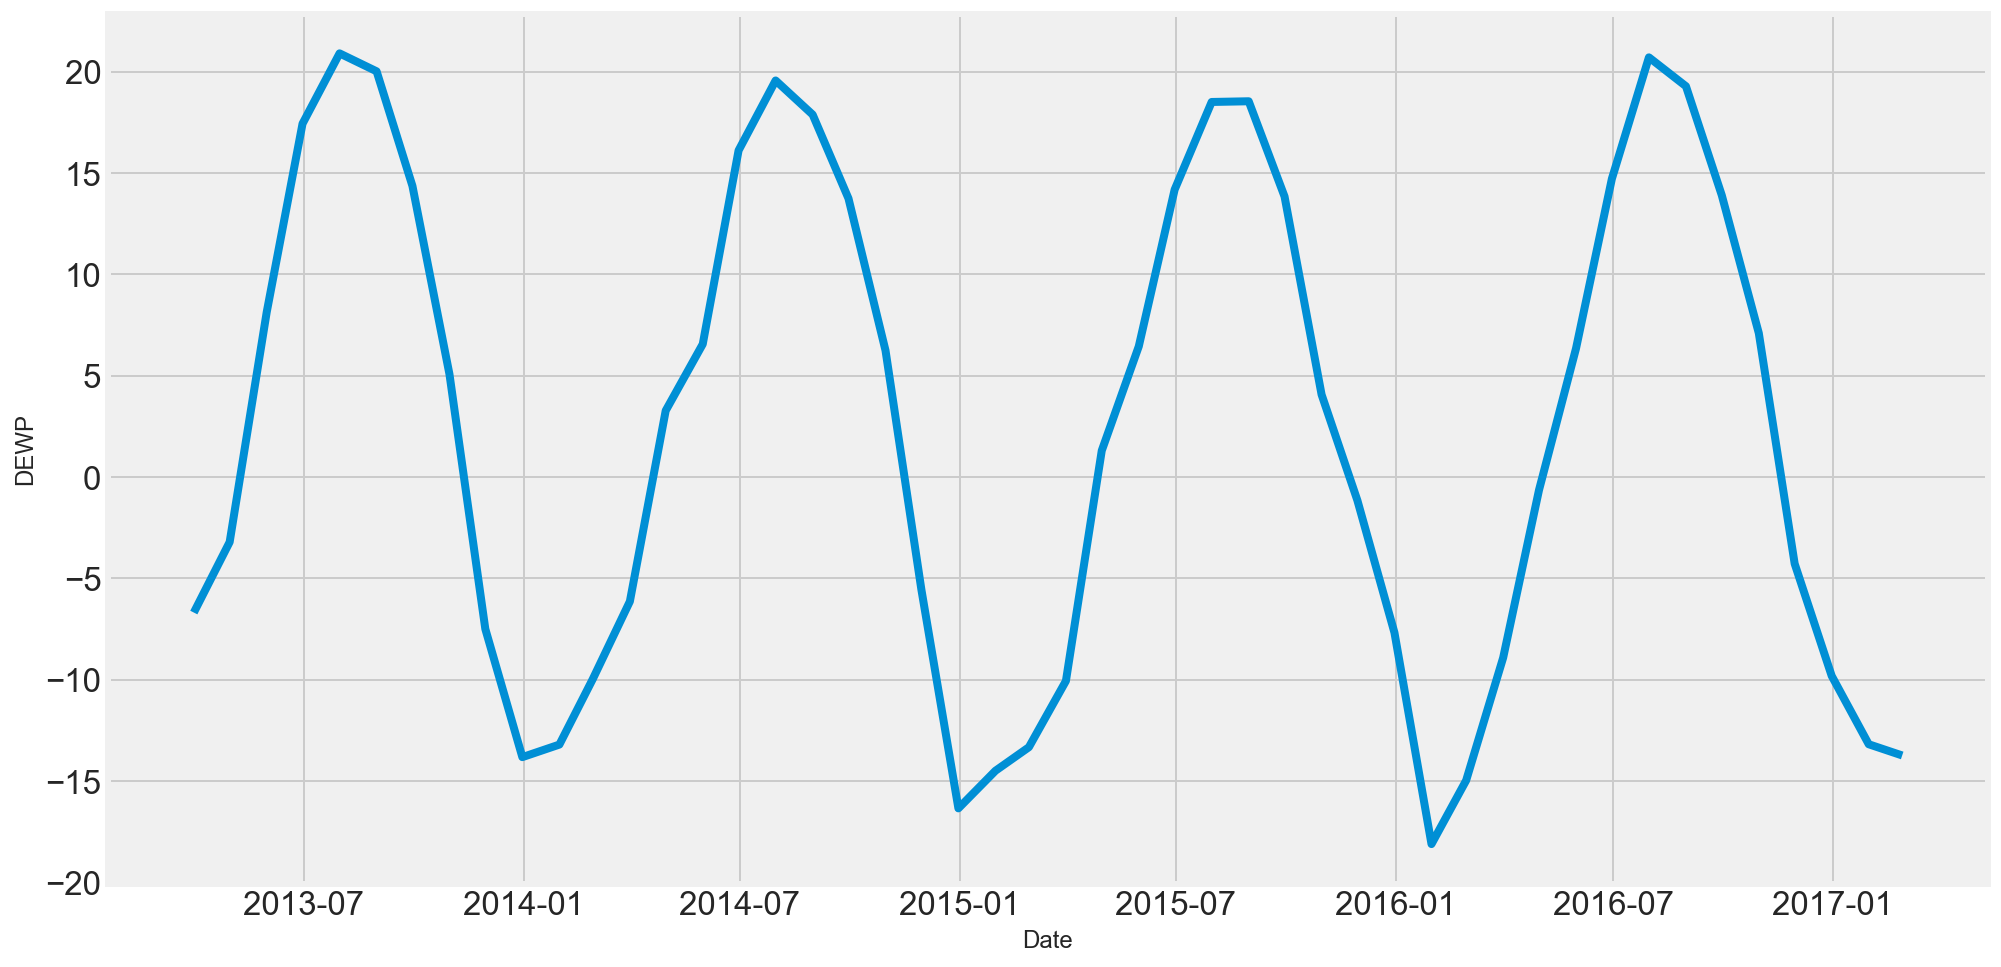

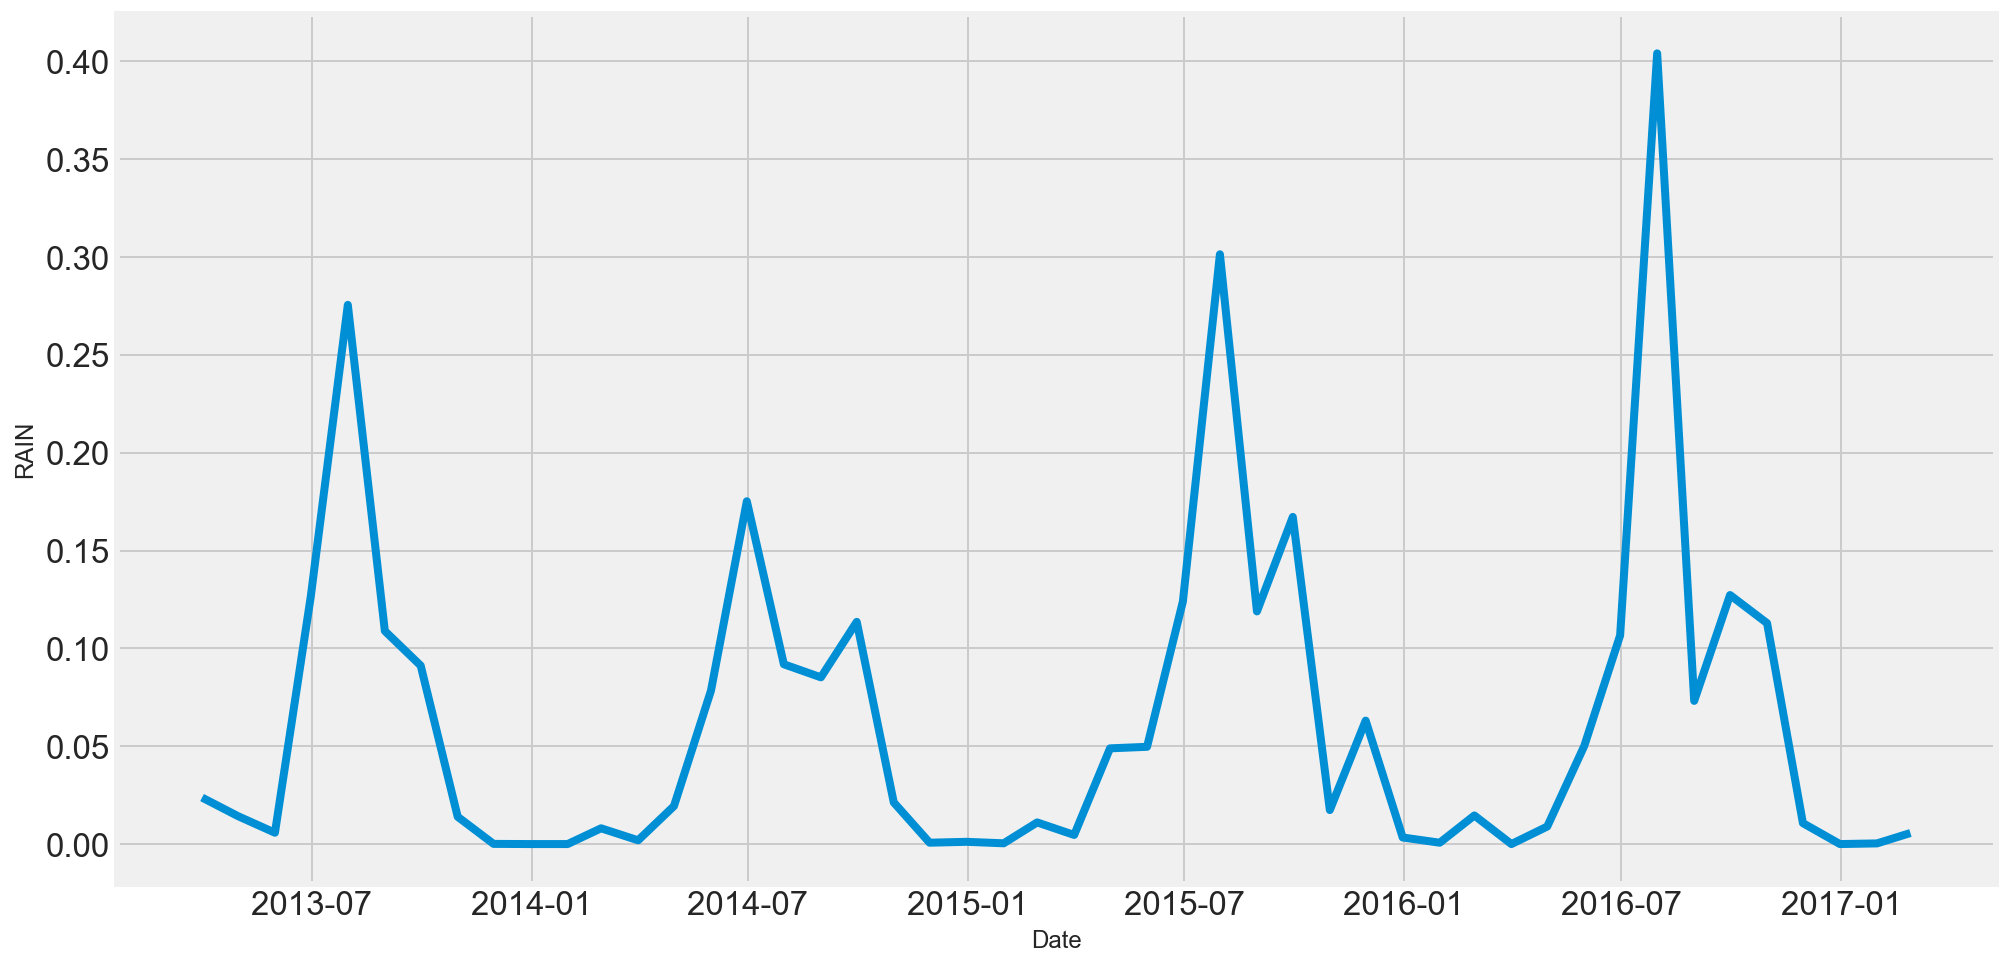

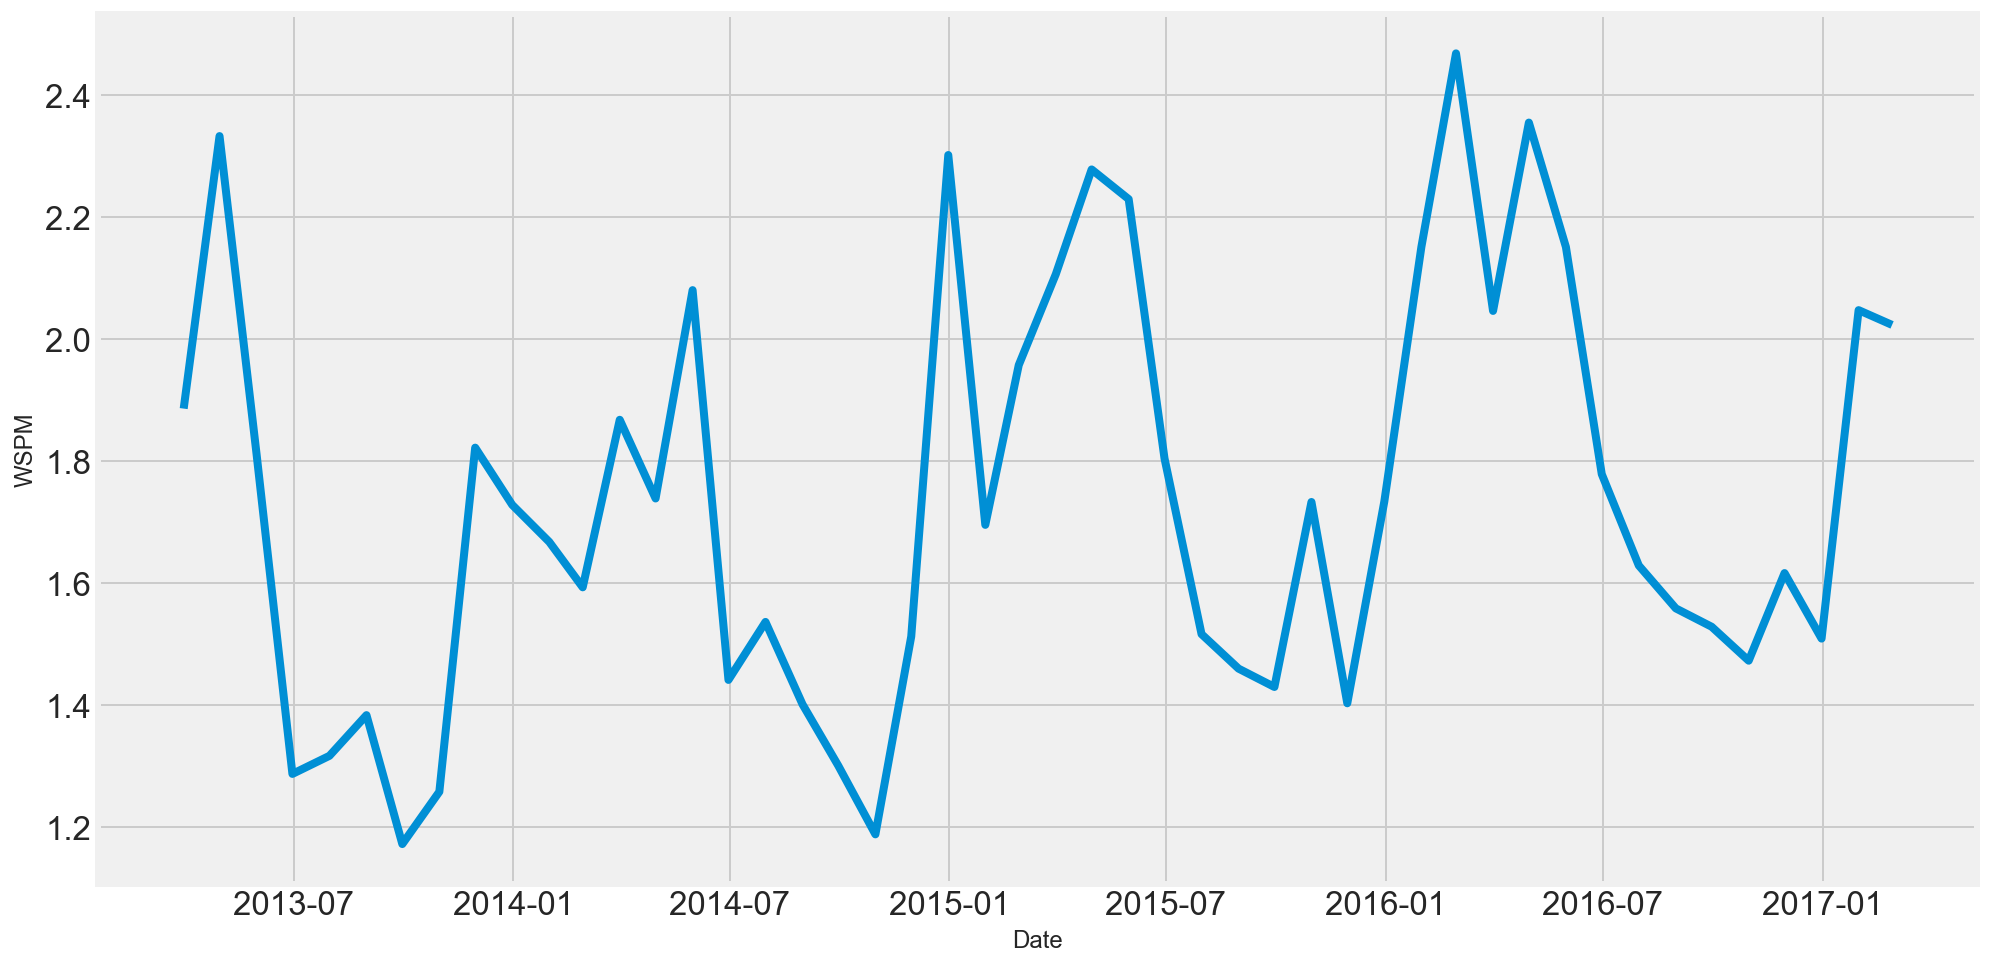

In [34]:
def plot_data(col):
    plt.figure(figsize=(15,8))
    sns.lineplot(y=col ,x='Date',data=df_monthly)
    
    
for col in df_monthly.columns:
    plot_data(col)

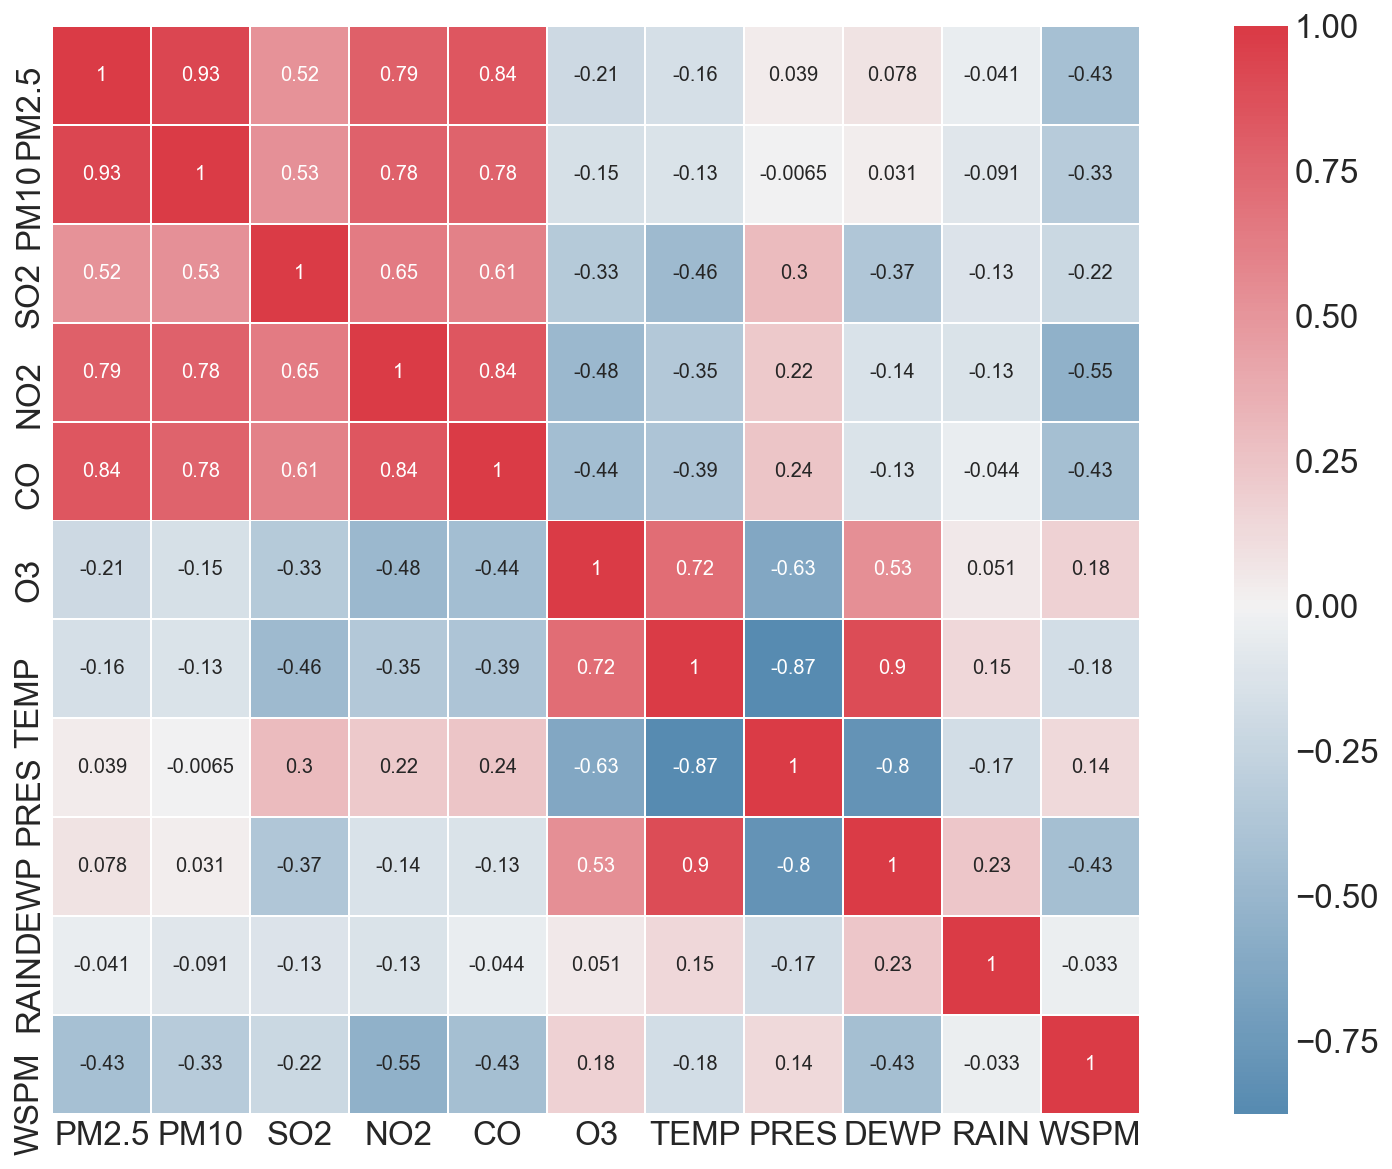

In [35]:
pollutant_corr = df_daily.corr()  # Pearson correlation
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
sns.heatmap(pollutant_corr, cmap=cmap, annot=True, vmax=1, center=0,
            square=True, linewidth=.5);

In [36]:
df_daily.corr()['PM2.5'].sort_values(ascending = False)

PM2.5    1.000000
PM10     0.929920
CO       0.844116
NO2      0.790620
SO2      0.520958
DEWP     0.077827
PRES     0.038845
RAIN    -0.041176
TEMP    -0.158985
O3      -0.206512
WSPM    -0.427097
Name: PM2.5, dtype: float64

Correlation heatmap shows 

In [37]:
pm25_top5 = df.groupby(by='station').agg({'PM2.5': 'mean'}).sort_values(by='PM2.5', ascending=False).head(5).reset_index()
pm25_top5_st_codes = pm25_top5['station'].tolist()
print('PM2.5 Top 5 station codes: {}'.format(pm25_top5_st_codes))
pm25_top5

PM2.5 Top 5 station codes: ['Dongsi', 'Wanshouxigong', 'Nongzhanguan', 'Gucheng', 'Wanliu']


station      PM2.5
0         Dongsi  85.483425
1  Wanshouxigong  84.393097
2   Nongzhanguan  84.271680
3        Gucheng  83.225905
4         Wanliu  83.055977

In [38]:
pm10_top5 = df.groupby(by='station').agg({'PM10': 'mean'}).sort_values(by='PM10', ascending=False).head(5).reset_index()
pm10_top5_st_codes = pm10_top5['station'].tolist()
print('PM10 Top 5 station codes: {}'.format(pm10_top5_st_codes))
pm10_top5

PM10 Top 5 station codes: ['Gucheng', 'Wanshouxigong', 'Wanliu', 'Dongsi', 'Aotizhongxin']


station        PM10
0        Gucheng  118.398825
1  Wanshouxigong  111.796461
2         Wanliu  110.236467
3         Dongsi  109.834056
4   Aotizhongxin  109.476180